In [1]:
import numpy as np
from numpy import sqrt, abs
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import statsmodels.api as sm
from scipy.stats import ttest_ind, chi2_contingency
from statsmodels.stats.weightstats import ztest

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_data_eda = pd.read_csv('churn_prediction.csv')
churn_data_eda

customer_id  vintage  age  gender  dependents     occupation    city  \
0                1     3135   66    Male         0.0  self_employed   187.0   
1                2      310   35    Male         0.0  self_employed     NaN   
2                4     2356   31    Male         0.0       salaried   146.0   
3                5      478   90     NaN         NaN  self_employed  1020.0   
4                6     2531   42    Male         2.0  self_employed  1494.0   
...            ...      ...  ...     ...         ...            ...     ...   
28377        30297     1845   10  Female         0.0        student  1020.0   
28378        30298     4919   34  Female         0.0  self_employed  1046.0   
28379        30299      297   47    Male         0.0       salaried  1096.0   
28380        30300     2585   50    Male         3.0  self_employed  1219.0   
28381        30301     2349   18    Male         0.0        student  1232.0   

       customer_nw_category  branch_code  days_since_last_transaction  ...  \
0                         2          755                        224.0  ...   
1                         2         3214                         60.0  ...   
2                         2           41                          NaN  ...   
3                         2          582                        147.0  ...   
4                         3          388                         58.0  ...   
...                     ...          ...                          ...  ...   
28377                     2         1207                         70.0  ...   
28378                     2          223                         14.0  ...   
28379                     2          588                          0.0  ...   
28380                     3          274                          NaN  ...   
28381                     2          474                         59.0  ...   

       previous_month_end_balance  average_monthly_balance_prevQ  \
0                         1458.71                        1458.71   
1                         8704.66                        7799.26   
2                         5815.29                        4910.17   
3                         2291.91                        2084.54   
4                         1401.72                        1643.31   
...                           ...                            ...   
28377                     1076.43                        2282.19   
28378                     4069.21                        3668.83   
28379                    61017.55                       53444.81   
28380                     1625.55                        1683.20   
28381                     2821.34                        3213.44   

       average_monthly_balance_prevQ2  current_month_credit  \
0                             1449.07                  0.20   
1                            12419.41                  0.56   
2                             2815.94                  0.61   
3                             1006.54                  0.47   
4                             1871.12                  0.33   
...                               ...                   ...   
28377                         2787.70                  0.30   
28378                         3865.55                  1.71   
28379                        21925.81               4666.84   
28380                         1857.42                  0.20   
28381                         4447.45                  0.11   

       previous_month_credit  current_month_debit  previous_month_debit  \
0                       0.20                 0.20                  0.20   
1                       0.56              5486.27                100.56   
2                       0.61              6046.73                259.23   
3                       0.47                 0.47               2143.33   
4                     714.61               588.62               1538.06   
...                      ...                  ...                   ...   
28377                 

### Variable Identification and Type casting:

### Integer Data Type:

In [3]:
# Integer data types: Checking and converting variables if required:
print(churn_data_eda.dtypes[churn_data_eda.dtypes == 'int64'])

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object


Summary:

*    **Branch code** is a unique code for a branch, so it should be converted to a **category data type**

*    **Customer nw category** represents the income status of the customer and has an order to it (low < medium < high). Hence, it is an ordinal category and needs to be converted to a **category data type**

*    **Churn** represents two categories churn and not churn so it needs to converted into a **category data type**

*    **Remaining Features** have the appropriate data type

In [4]:
# Based on the above statements we convert the data types of the columns accordingly:
churn_data_eda['branch_code'] = churn_data_eda['branch_code'].astype('category')
churn_data_eda['customer_nw_category'] = churn_data_eda['customer_nw_category'].astype('category')
churn_data_eda['churn'] = churn_data_eda['churn'].astype('category')
print(churn_data_eda.dtypes[churn_data_eda.dtypes == 'int64'])

customer_id    int64
vintage        int64
age            int64
dtype: object


### Object Data Type:

In [5]:
# Object data types: Checking and converting variables if required:
print(churn_data_eda.dtypes[churn_data_eda.dtypes == 'object'])

gender        object
occupation    object
dtype: object


*    **Gender and Occupation** are Nominal categories so, they need to be converted into category data type

In [6]:
# Converting the data types according to the above mentioned statements:
churn_data_eda['gender'] = churn_data_eda['gender'].astype('category')
churn_data_eda['occupation'] = churn_data_eda['occupation'].astype('category')
print(churn_data_eda.dtypes[churn_data_eda.dtypes == 'object'])

Series([], dtype: object)


### Float Data Type:

In [7]:
# Float data types: Checking and converting variables if required:
print(churn_data_eda.dtypes[churn_data_eda.dtypes == 'float64'])

dependents                        float64
city                              float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object


*    **dependents** should be integer value as there are no partial dependents that exist in the data. Hence, they need to be converted to the integer data type

*    **City** should be of the type category as the code is unique for each city. So, it needs to be converted to category data type

*    **Rest all** variables are best represented as float type as they are

*    ****

In [8]:
# Filling missing values and converting the data types according to the above points:
# churn_data_eda['dependents'] = churn_data_eda['dependents'].fillna(value= churn_data_eda['dependents'].mode()[0]).astype('int64')
churn_data_eda['city'] = churn_data_eda['city'].astype('category')
print(churn_data_eda.dtypes[churn_data_eda.dtypes == 'float64'])

dependents                        float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object


In [9]:
# Final check of data types of all the features to make sure everything is accurate:
churn_data_eda.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                         float64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
days_since_last_transaction        float64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
dtype: object

### Exploring Continious Variables:

#### Mean:

In [10]:
# Mean age of the customers:
avg_age = round(churn_data_eda['age'].mean(),2)
print('Average age of all the customers:', avg_age)

# Mean age of people who are churning:
avg_churning_age = round(churn_data_eda.loc[churn_data_eda['churn'] == 1, 'age'].mean(),2)
print('Average age of churning customers:',avg_churning_age)

# Mean age of people who are not churning:
avg_churning_age = round(churn_data_eda.loc[churn_data_eda['churn'] == 0, 'age'].mean(),2)
print('Average age of non-churning customers:',avg_churning_age)

Average age of all the customers: 48.21
Average age of churning customers: 47.46
Average age of non-churning customers: 48.38


In [11]:
# Mean of the current balance of all the customers:
avg_curr_balance = round(churn_data_eda['current_balance'].mean())
print('Avg current balance - all the customers : ${}'.format(avg_curr_balance))

# Mean of the current balance of the churning customers:
avg_curr_balance = round(churn_data_eda.loc[churn_data_eda['churn'] == 1,'current_balance'].mean())
print('Avg current balance - churning customers : ${}'.format(avg_curr_balance))

# Mean of the current balance of the non-churning customers:
avg_curr_balance = round(churn_data_eda.loc[churn_data_eda['churn'] == 0,'current_balance'].mean())
print('Avg current balance - non-churning customers : ${}'.format(avg_curr_balance))

Avg current balance - all the customers : $7381
Avg current balance - churning customers : $5221
Avg current balance - non-churning customers : $7872


#### Median:

In [12]:
# Median age of all the customers:
median_age = churn_data_eda['age'].median()
print('Median Age of all the customers is: {}'.format(median_age))

Median Age of all the customers is: 46.0


* This means **46** is the **50th percentile** of the age of customers

In [13]:
# Standard deviation and Variance of the current balance of customers:
curr_balance_std = round(churn_data_eda['current_balance'].std(),2)
curr_balance_var = round(churn_data_eda['current_balance'].var(),2)

print('Standard deviation of current_balance of all customers: {}'.format(curr_balance_std))
print('Variance of current_balance of all customers: {}'.format(curr_balance_var))

Standard deviation of current_balance of all customers: 42598.71
Variance of current_balance of all customers: 1814650257.52


* High values of Standard deviation and Variance indicates that the data has lot of outliers

In [14]:
# Describe function:
churn_data_eda.describe(include=[int, float])

customer_id       vintage           age    dependents  \
count  28382.000000  28382.000000  28382.000000  25919.000000   
mean   15143.508667   2364.336446     48.208336      0.347236   
std     8746.454456   1610.124506     17.807163      0.997661   
min        1.000000    180.000000      1.000000      0.000000   
25%     7557.250000   1121.000000     36.000000      0.000000   
50%    15150.500000   2018.000000     46.000000      0.000000   
75%    22706.750000   3176.000000     60.000000      0.000000   
max    30301.000000  12899.000000     90.000000     52.000000   

       days_since_last_transaction  current_balance  \
count                 25159.000000     2.838200e+04   
mean                     69.997814     7.380552e+03   
std                      86.341098     4.259871e+04   
min                       0.000000    -5.503960e+03   
25%                      11.000000     1.784470e+03   
50%                      30.000000     3.281255e+03   
75%                      95.000000     6.635820e+03   
max                     365.000000     5.905904e+06   

       previous_month_end_balance  average_monthly_balance_prevQ  \
count                2.838200e+04                   2.838200e+04   
mean                 7.495771e+03                   7.496780e+03   
std                  4.252935e+04                   4.172622e+04   
min                 -3.149570e+03                   1.428690e+03   
25%                  1.906000e+03                   2.180945e+03   
50%                  3.379915e+03                   3.542865e+03   
75%                  6.656535e+03                   6.666887e+03   
max                  5.740439e+06                   5.700290e+06   

       average_monthly_balance_prevQ2  current_month_credit  \
count                    2.838200e+04          2.838200e+04   
mean                     7.124209e+03          3.433252e+03   
std                      4.457581e+04          7.707145e+04   
min                     -1.650610e+04          1.000000e-02   
25%                      1.832507e+03          3.100000e-01   
50%                      3.359600e+03          6.100000e-01   
75%                      6.517960e+03          7.072725e+02   
max                      5.010170e+06          1.226985e+07   

       previous_month_credit  current_month_debit  previous_month_debit  \
count           2.838200e+04         2.838200e+04          2.838200e+04   
mean            3.261694e+03         3.658745e+03          3.339761e+03   
std             2.968889e+04         5.198542e+04          2.430111e+04   
min             1.000000e-02         1.000000e-02          1.000000e-02   
25%             3.300000e-01         4.100000e-01          4.100000e-01   
50%             6.300000e-01         9.193000e+01          1.099600e+02   
75%             7.492350e+02         1.360435e+03          1.357553e+03   
max             2.361808e+06         7.637857e+06          1.414168e+06   

       current_month_balance  previous_month_balance  
count           2.838200e+04            2.838200e+04  
mean            7.451133e+03            7.495177e+03  
std             4.203394e+04            4.243198e+04  
min            -3.374180e+03           -5.171920e+03  
25%             1.996765e+03            2.074407e+03  
50%             3.447995e+03            3.465235e+03  
75%             6.667958e+03            6.654693e+03  
max             5.778185e+06            5.720144e+06

#### Univariate analysis of Numeric variables:

* Numerical variables are split into to following groups to perform analysis easily:
* Customer details = ['customer_id', 'age', 'vintage']
* Current month = ['current_balance', 'current_month_credit', 'current_month_debit', 'current_month_balance']
* Previous month = ['previous_month_end_balance', 'previous_month_credit', 'previous_month_debit', 'previous_month_balance']
* Previous quarters = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
* transaction = ['days_since_last_transaction']

In [15]:
# List of all the numeric columns in the data set:
num_cols = list(churn_data_eda.select_dtypes(include = ['int64','Int64','float64']).columns)

# Creating Customer details related group:
customer_details = ['customer_id', 'age', 'vintage', 'dependents']
print(customer_details)

# Creating Current month related group:
current_month = []
for col in num_cols:
    if 'current' in col:
        current_month.append(col)
print(current_month)

# Creating Previous month related group:
previous_month = []
for col in num_cols:
    if 'previous' in col:
        previous_month.append(col)
print(previous_month)

# Creating Previous quarters related group:
previous_quarters = []
for col in num_cols:
    if 'Q' in col:
        previous_quarters.append(col)
print(previous_quarters)

# Creating transaction related group:
transaction = ['days_since_last_transaction']
print(transaction)

['customer_id', 'age', 'vintage', 'dependents']
['current_balance', 'current_month_credit', 'current_month_debit', 'current_month_balance']
['previous_month_end_balance', 'previous_month_credit', 'previous_month_debit', 'previous_month_balance']
['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
['days_since_last_transaction']


In [16]:
# Function to perform univariate analysis of the numeric coloumns by checking normality, skewness and kurtosis:
def univariate_analysis_numeric(df, col_name):
    
    # Taking only the column data:
    df_col =df[col_name]
    
    # Checking for Skewness and Kurtosis:
    df_col_skewness = round(df_col.skew(),2)
    df_col_kurtosis = round(df_col.kurtosis(),2)
    print('{} Skewness: {}'.format(col_name,df_col_skewness))
    print('{} Kurtosis: {}'.format(col_name,df_col_kurtosis))

    # Mean, Median and Standard Deviation:
    df_col_mean = round(df_col.mean(),2)
    df_col_median = round(df_col.median(),2)
    df_col_var = round(df_col.var(),2)
    df_col_std = round(df_col.std(),2)
    df_col_min_max = round(df_col.min(),2), round(df_col.max(),2)
    # This is one standard deviation on either sides of the mean value:
    one_std_range = round(df_col_mean - df_col_std,2), round(df_col_mean + df_col_std,2) 
    print('{} mean: {}, median: {}'.format(col_name, df_col_mean, df_col_median))
    print('{} standard deviation: {}, one_std_range: {}'.format(col_name, df_col_std, one_std_range))
    print('{} variance: {}'.format(col_name, df_col_var))
    print('{} Min and Max: {}'.format(col_name, df_col_min_max))
    
    # Sub-plots:
    fig, axes = plt.subplots(1,3,figsize=(20,5), dpi=100)
    
    # Normality check (visual) - KDE Plot:
    sns.kdeplot(ax=axes[0], x=df_col, shade=True)
    sns.scatterplot(ax=axes[0], x=[df_col_mean], y=[0], color='red', label='Mean')
    sns.scatterplot(ax=axes[0], x=[df_col_median], y=[0], color='green', label='Median')
    sns.lineplot(ax=axes[0], x=list(one_std_range), y=[0,0], color='black', label='std_range')
    axes[0].set_title('{} - KDE'.format(col_name))
    axes[0].set_xlabel('{}'.format(col_name))
    axes[0].set_ylabel('Density')
    
    # Normality check - QQ Plot:
    sm.qqplot(df_col, line='s', ax=axes[1])
    axes[1].set_title('{} - QQ Plot'.format(col_name))
    
    # Box plot to check for outliers in the data:
    sns.boxplot(ax=axes[2], x=df_col, orient='v')
    axes[2].set_title('{} - Box plot'.format(col_name))
    axes[2].set_xlabel('{}'.format(col_name))
    
    plt.show()

#### Customer Details Group:

customer_id Skewness: 0.0
customer_id Kurtosis: -1.2
customer_id mean: 15143.51, median: 15150.5
customer_id standard deviation: 8746.45, one_std_range: (6397.06, 23889.96)
customer_id variance: 76500465.54
customer_id Min and Max: (1, 30301)


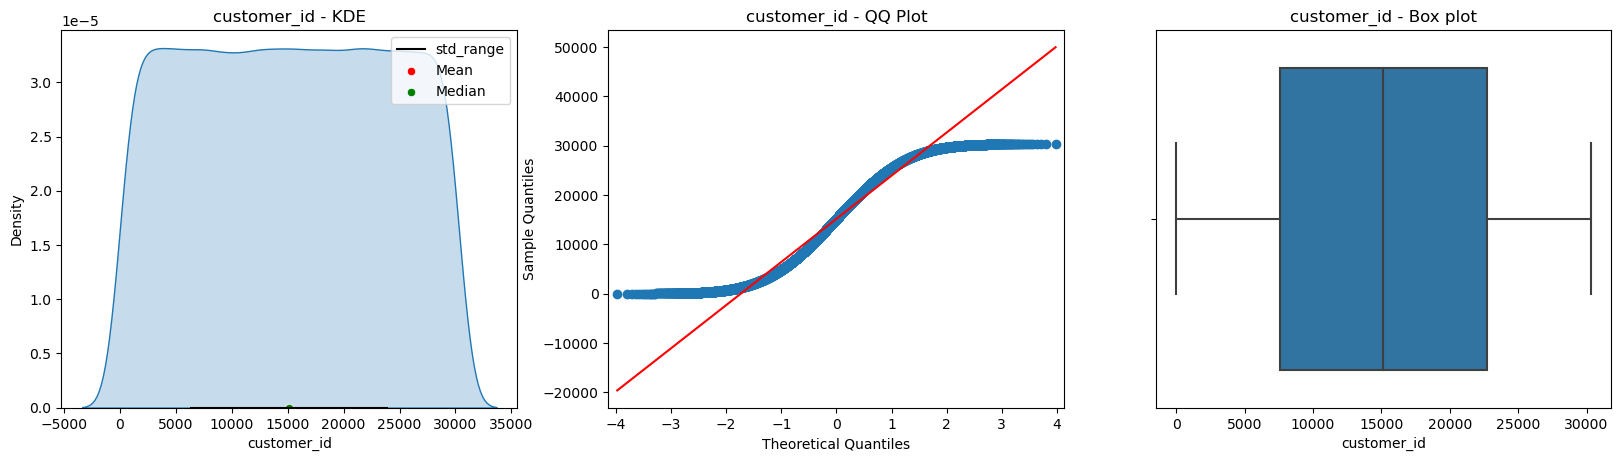

age Skewness: 0.33
age Kurtosis: -0.17
age mean: 48.21, median: 46.0
age standard deviation: 17.81, one_std_range: (30.4, 66.02)
age variance: 317.1
age Min and Max: (1, 90)


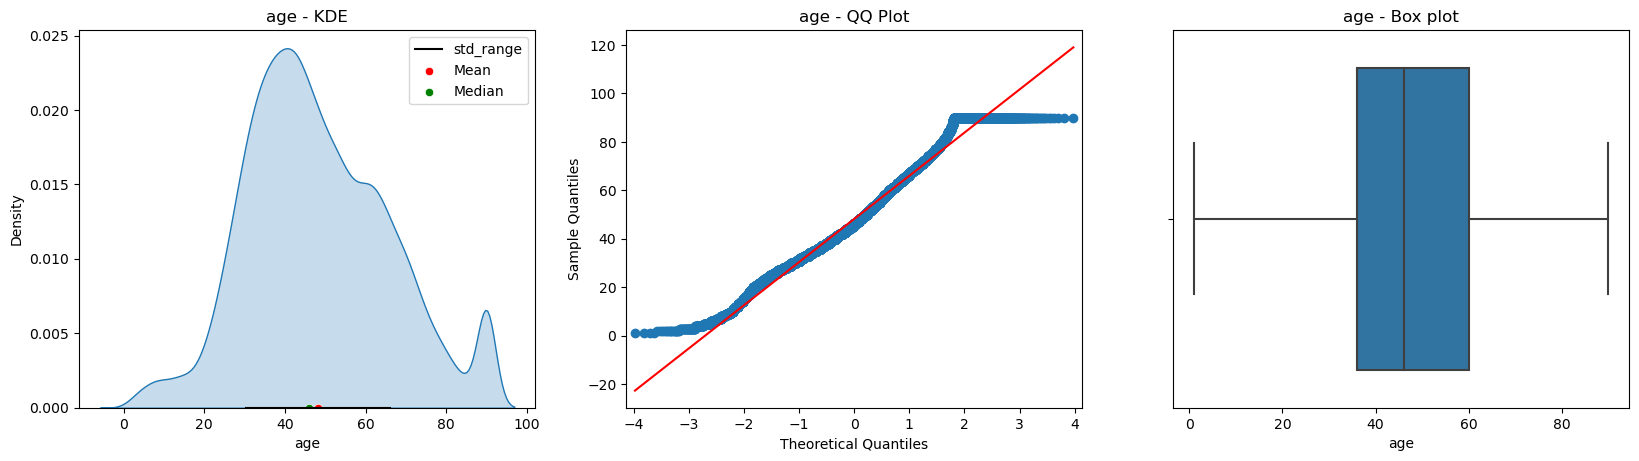

vintage Skewness: 0.88
vintage Kurtosis: 0.14
vintage mean: 2364.34, median: 2018.0
vintage standard deviation: 1610.12, one_std_range: (754.22, 3974.46)
vintage variance: 2592500.92
vintage Min and Max: (180, 12899)


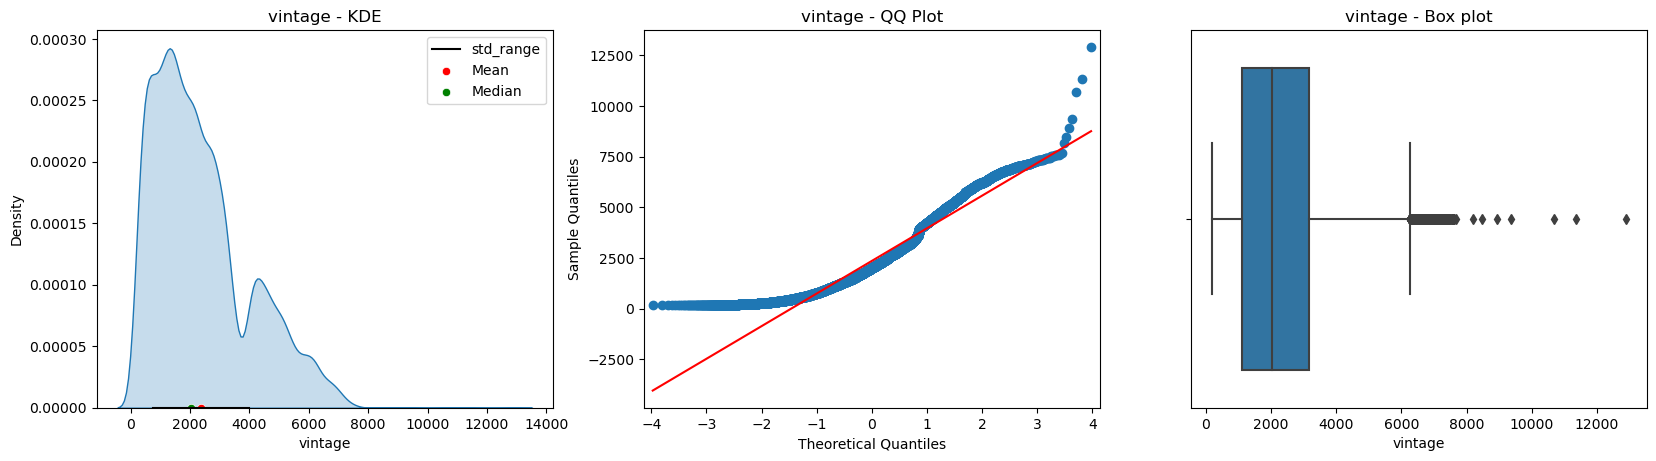

dependents Skewness: 15.19
dependents Kurtosis: 632.4
dependents mean: 0.35, median: 0.0
dependents standard deviation: 1.0, one_std_range: (-0.65, 1.35)
dependents variance: 1.0
dependents Min and Max: (0.0, 52.0)


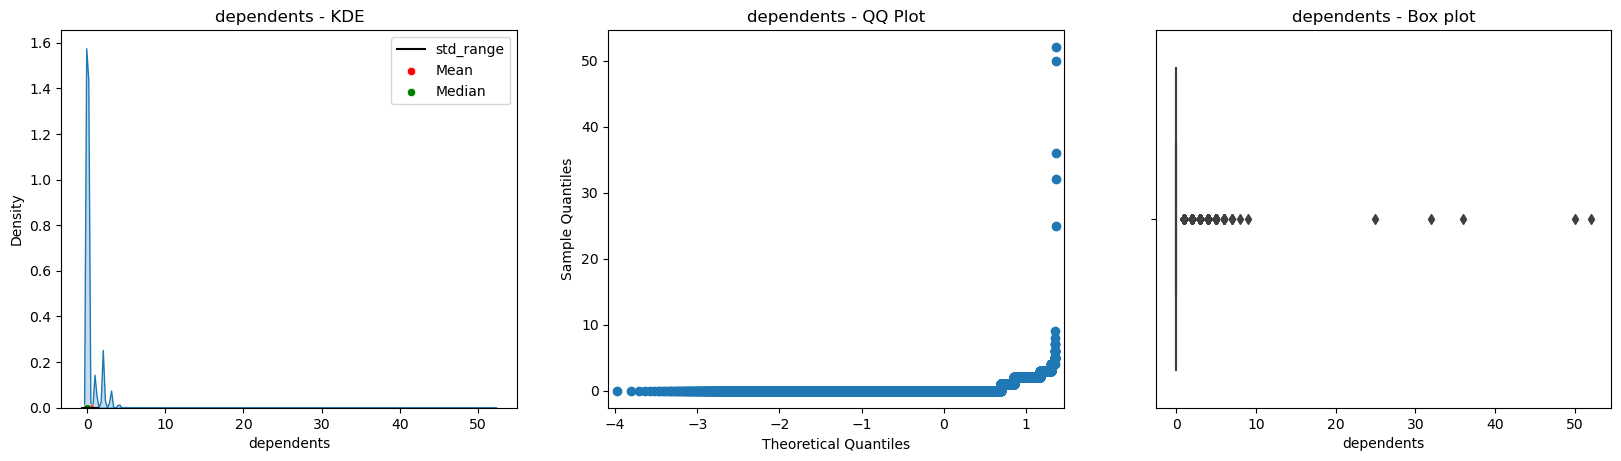

In [17]:
# Univariate analysis for customer details group:
for i in customer_details:
    univariate_analysis_numeric(churn_data_eda, i)

* **Customer Id**:
  * This variable is unique for every customer and hence it has uniform distribution
  * This variable does not contribute any information to the prediction model
  * It can be eliminated from both analysis and prediction phases safely

* **Age**:
  * **Skewness** (0.45) is within -0.5 to 0.5 indicating that the data is **symmetric and close to normal distribution** 
  * **Kurtosis** (-0.04) is less than 0 (**platykurtic**) which means data has thinner tail / shorter distribution (**less extreme values**). But, it is also closer to zero, which means the data has **some level of symmetry**
  * Mean is higher than the Median indicating presence of **some outliers**
  * From the Histogram above, it can be observed that most of the customers ages lie between 30 and 65

* **Vintage**:
  * **Skewness** (0.88) is more than 0.5 indicating that the data is **Right (positively) skewed**
  * **Kurtosis** (0.14) is more than 0 (**leptokurtic**) which means data has fat tail / longer distribution (**more extreme values**). Since, kurtosis is close to zero, there is **some level of symmetry**
  * Mean is higher than the Median indicating presence of **outliers**
  * From the Histogram above, it can be observed that most of the customers with the bank are 0 to 4000 days old
* **Things to investigate**:
  * High number of old age customers in the age variable

#### Current Month Group:

current_balance Skewness: 99.03
current_balance Kurtosis: 13092.36
current_balance mean: 7380.55, median: 3281.26
current_balance standard deviation: 42598.71, one_std_range: (-35218.16, 49979.26)
current_balance variance: 1814650257.52
current_balance Min and Max: (-5503.96, 5905904.03)


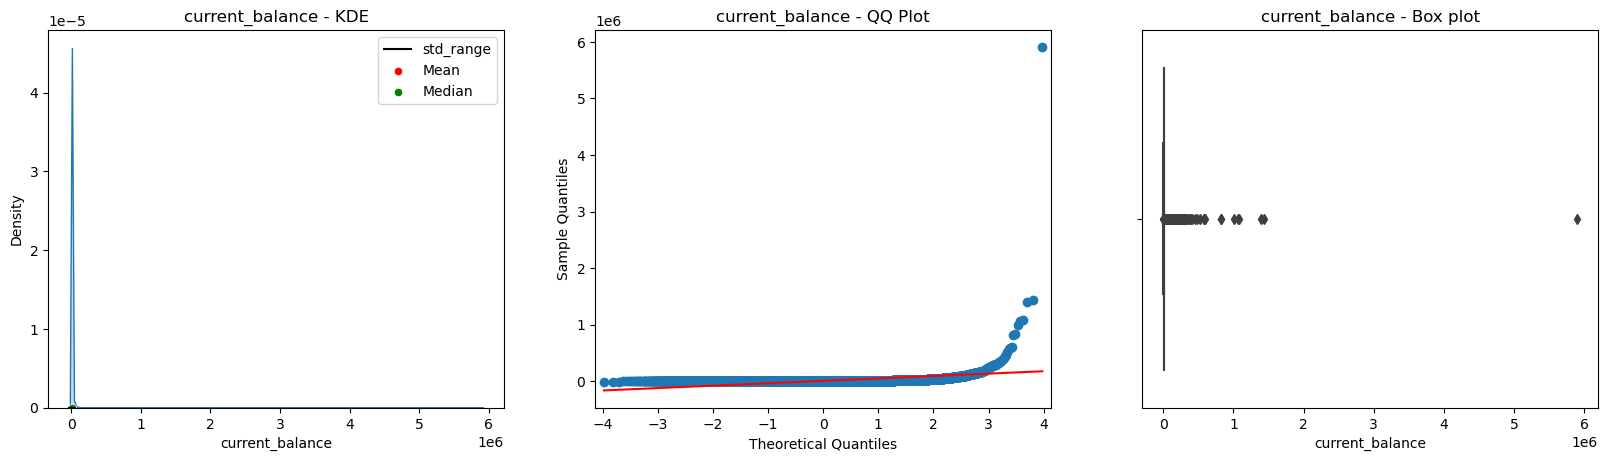

current_month_credit Skewness: 143.32
current_month_credit Kurtosis: 22631.41
current_month_credit mean: 3433.25, median: 0.61
current_month_credit standard deviation: 77071.45, one_std_range: (-73638.2, 80504.7)
current_month_credit variance: 5940008776.34
current_month_credit Min and Max: (0.01, 12269845.39)


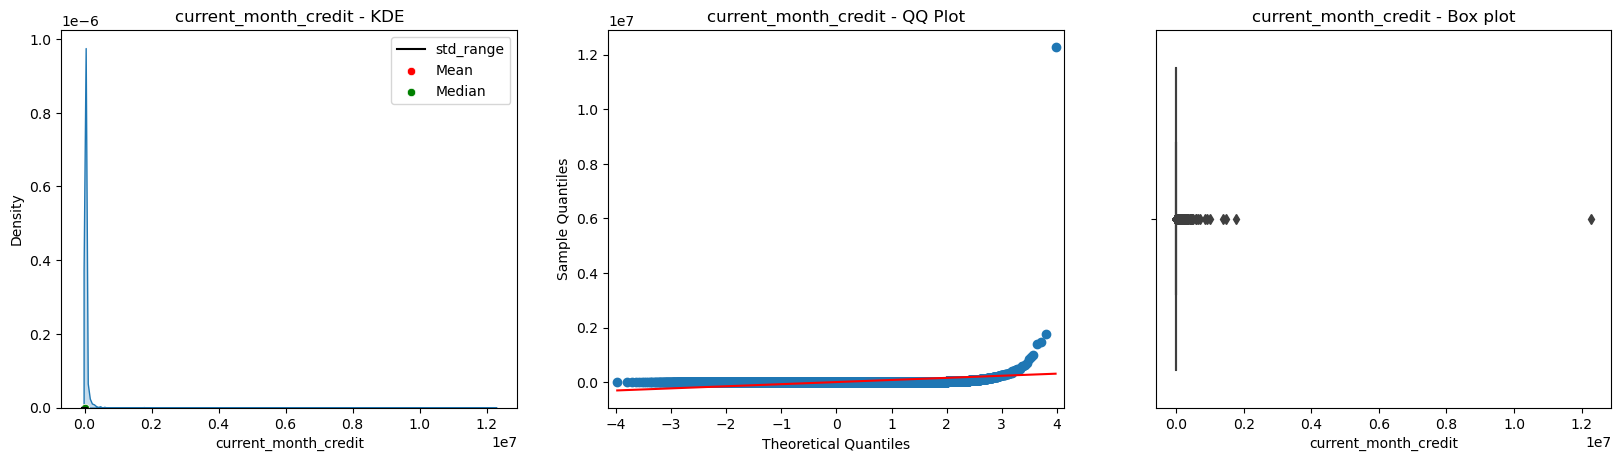

current_month_debit Skewness: 115.62
current_month_debit Kurtosis: 16484.94
current_month_debit mean: 3658.74, median: 91.93
current_month_debit standard deviation: 51985.42, one_std_range: (-48326.68, 55644.16)
current_month_debit variance: 2702484273.58
current_month_debit Min and Max: (0.01, 7637857.36)


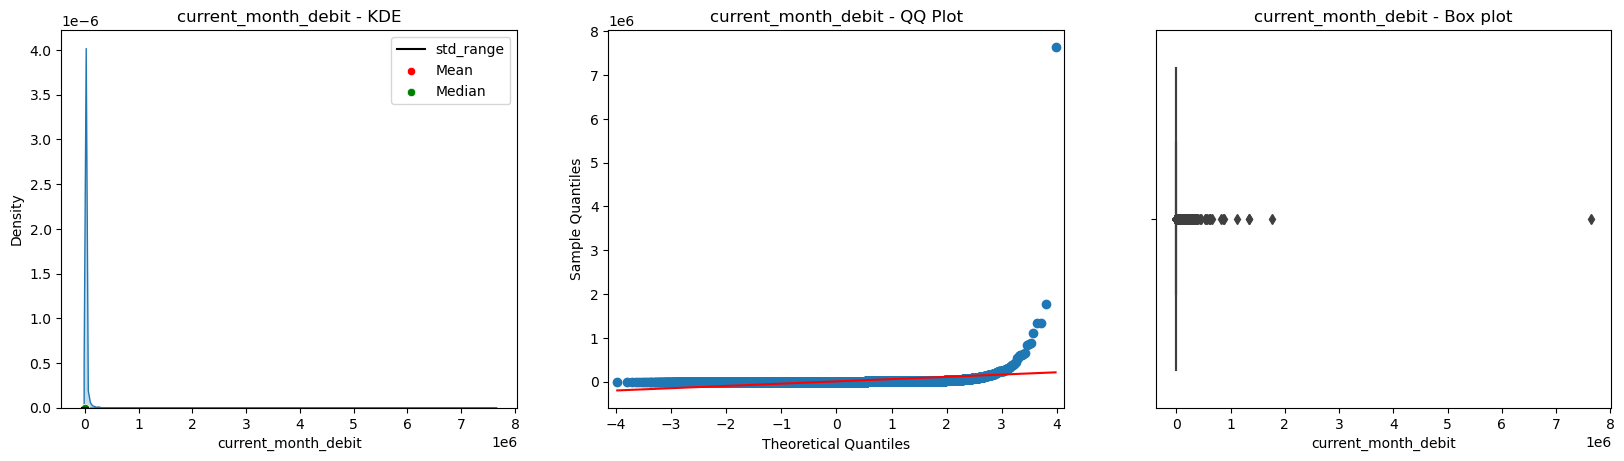

current_month_balance Skewness: 97.31
current_month_balance Kurtosis: 12681.16
current_month_balance mean: 7451.13, median: 3448.0
current_month_balance standard deviation: 42033.94, one_std_range: (-34582.81, 49485.07)
current_month_balance variance: 1766851989.45
current_month_balance Min and Max: (-3374.18, 5778184.77)


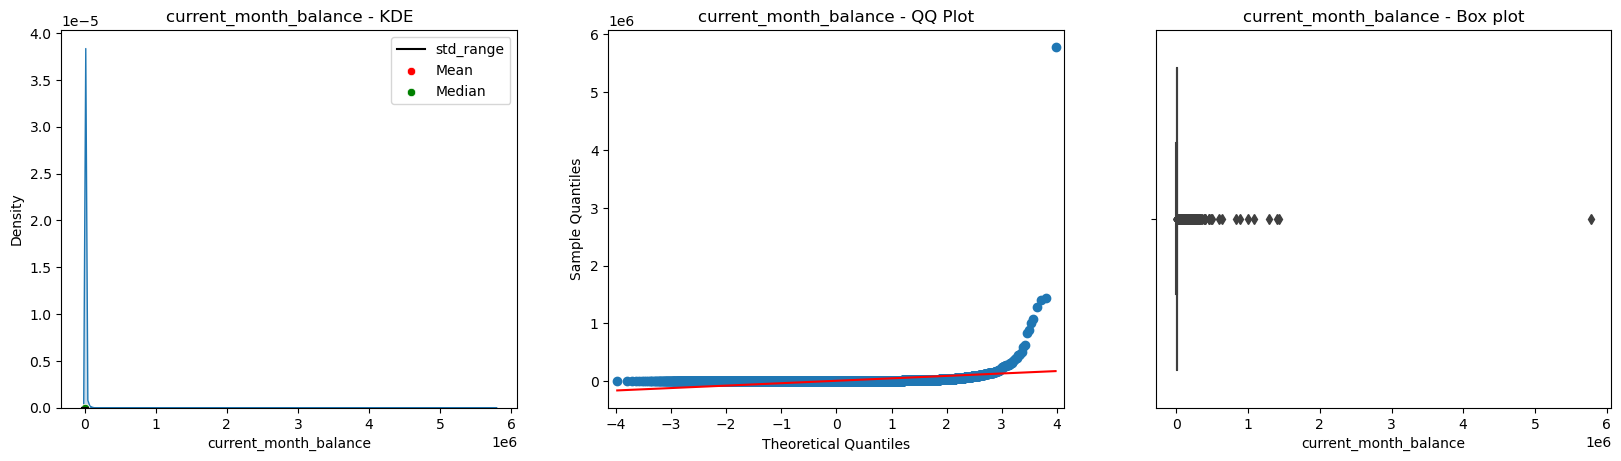

In [18]:
# Univariate analysis for current month group before handling outliers:
for i in current_month:
    univariate_analysis_numeric(churn_data_eda, i)

* **Current Month Group** (before outliers): 
  * All the variables under the current month group have very high skewness and kurtosis values indicating the presence of a lot of Outliers/Extreme values
  * Outliers need to be handled for proper analysis of these variables

### Outlier handling:

In [19]:
# Function to handle outliers:
def outlier_handling(df_original, col_name, method = 'IQR', replace = True):
    
    df = df_original.copy()
    
    # Handling outliers using IQR method:
    if method == 'IQR':        
        # 1st Quartile and 3rd Quartile: 
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        # Interquartile range and whisker width:
        IQR = Q3-Q1
        whisker_width = 1.5
        # Lower and Upper whiskers:
        lower_whisker = Q1 - (whisker_width * IQR)
        upper_whisker = Q3 + (whisker_width * IQR)
        
        if replace == True:
            # Replacing outliers with respective whiskers:
            print('Replacing outliers using IQR')
            df.loc[df[col_name] > upper_whisker, col_name] = upper_whisker
            df.loc[df[col_name] < lower_whisker, col_name] = lower_whisker
        else:
            # Dropping outliers: (Not recommended as the entire row values of all columns are dropped along with the outliers leading to data loss)
            print('Dropping outliers using IQR')
            df = df.loc[df[col_name] <= upper_whisker]
            df = df.loc[df[col_name] >= lower_whisker]
    
    ## Handling outliers using Standard deviation method:
    elif method == 'STD':
        # Higher end standard deviation value (Mean + 3 * standard deviation):
        high_std_val = df[col_name].mean() + 3 * df[col_name].std()
        # Lower end standard deviation value (Mean - 3 * standard deviation):
        low_std_val = df[col_name].mean() - 3 * df[col_name].std()
        
        if replace == True:
            # Replacing outliers with higher and lower end standard deviation values of the column:
            print('Replacing outliers using Standard deviation')
            df.loc[df[col_name] > high_std_val, col_name] = high_std_val
            df.loc[df[col_name] > low_std_val, col_name] = low_std_val
        else:
            # Dropping outliers: (Not recommended as the entire row values of all columns are dropped along with the outliers leading to data loss)
            print('Dropping outliers using Standard deviation')
            df = df.loc[df[col_name] <= high_std_val] 
            df = df.loc[df[col_name] >= low_std_val] 
            
    return df

In [20]:
# Handling outliers for all the columns in the current month group:
for col in current_month:
    # Function call to handle outliers and update the data frame accordingly:
    churn_data_eda_no_outliers = outlier_handling(churn_data_eda, col, method = 'IQR', replace = True)    

Replacing outliers using IQR
Replacing outliers using IQR
Replacing outliers using IQR
Replacing outliers using IQR


current_balance Skewness: 99.03
current_balance Kurtosis: 13092.36
current_balance mean: 7380.55, median: 3281.26
current_balance standard deviation: 42598.71, one_std_range: (-35218.16, 49979.26)
current_balance variance: 1814650257.52
current_balance Min and Max: (-5503.96, 5905904.03)


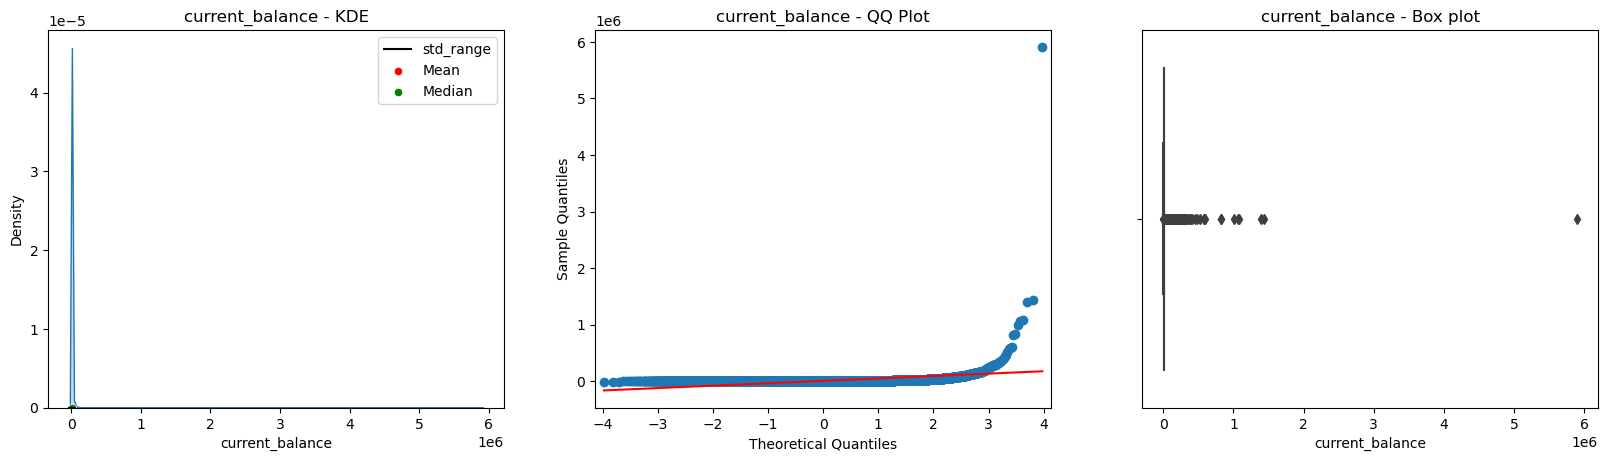

current_month_credit Skewness: 143.32
current_month_credit Kurtosis: 22631.41
current_month_credit mean: 3433.25, median: 0.61
current_month_credit standard deviation: 77071.45, one_std_range: (-73638.2, 80504.7)
current_month_credit variance: 5940008776.34
current_month_credit Min and Max: (0.01, 12269845.39)


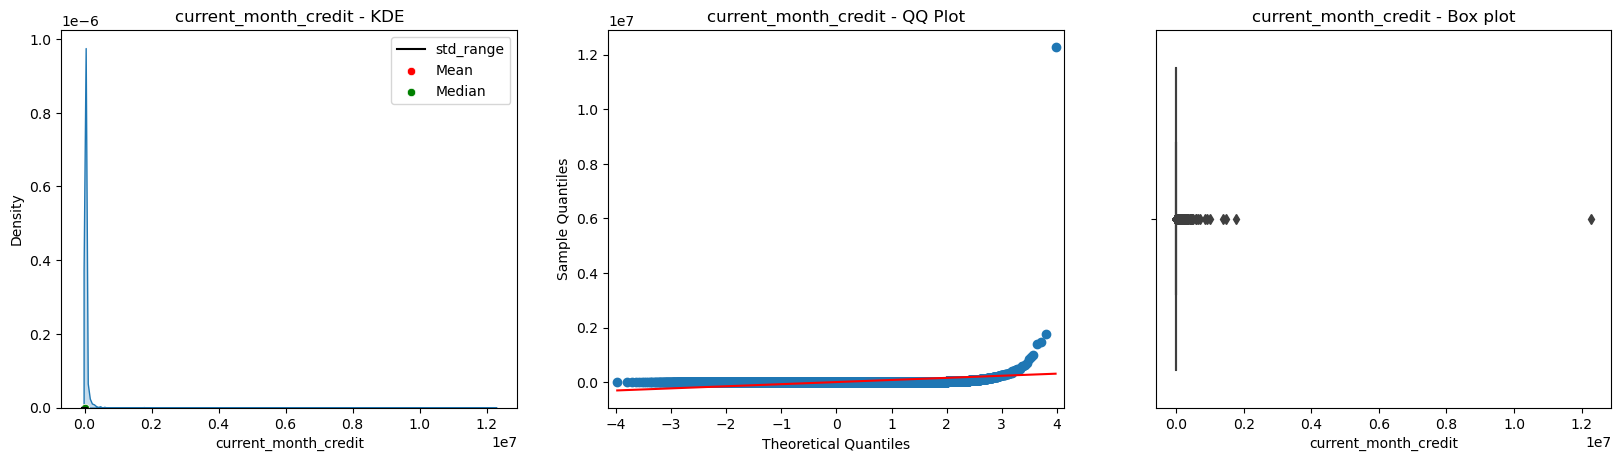

current_month_debit Skewness: 115.62
current_month_debit Kurtosis: 16484.94
current_month_debit mean: 3658.74, median: 91.93
current_month_debit standard deviation: 51985.42, one_std_range: (-48326.68, 55644.16)
current_month_debit variance: 2702484273.58
current_month_debit Min and Max: (0.01, 7637857.36)


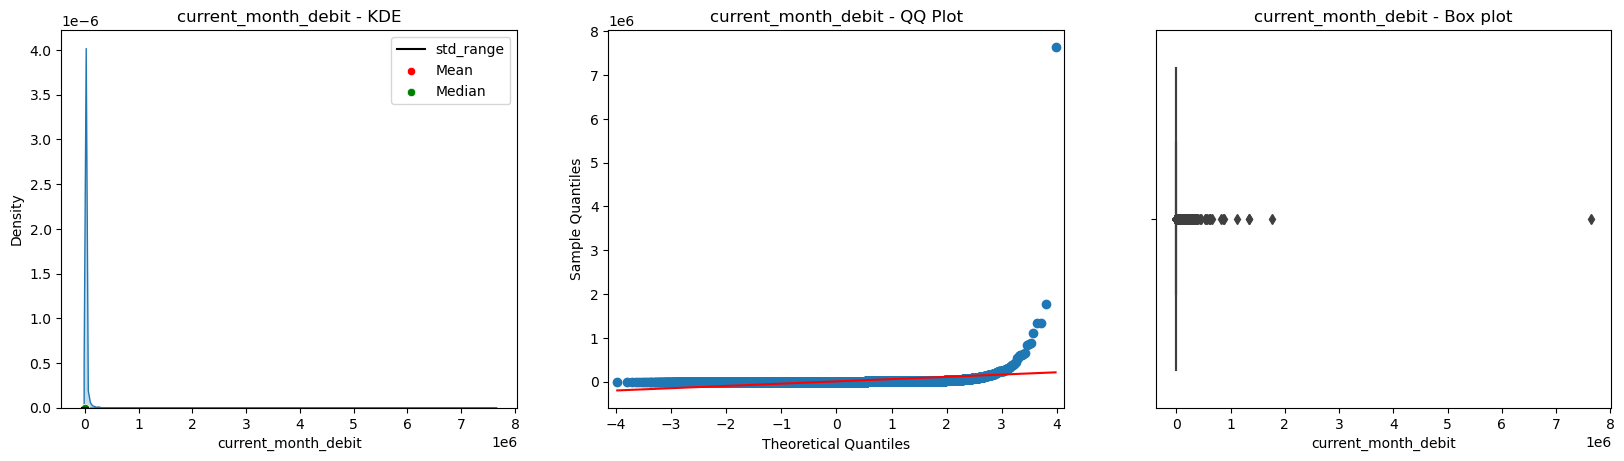

current_month_balance Skewness: 1.11
current_month_balance Kurtosis: 0.05
current_month_balance mean: 4942.35, median: 3448.0
current_month_balance standard deviation: 3951.13, one_std_range: (991.22, 8893.48)
current_month_balance variance: 15611408.77
current_month_balance Min and Max: (-3374.18, 13674.75)


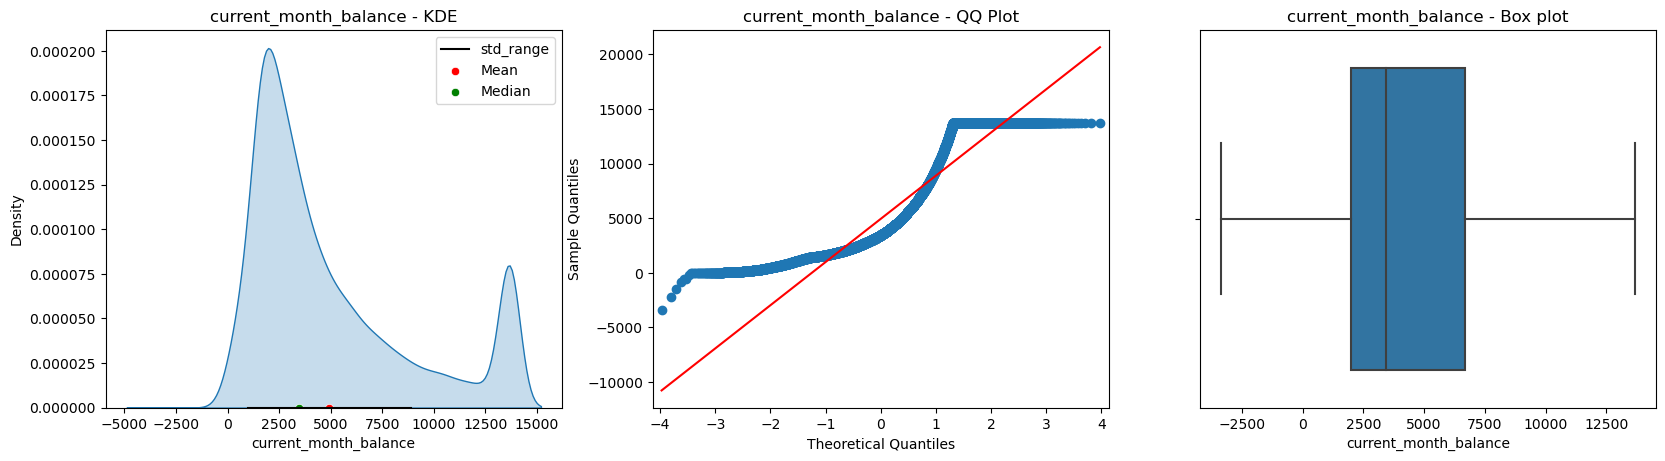

In [21]:
# Univariate analysis for current month group after outlier handling:
for i in current_month:
    univariate_analysis_numeric(churn_data_eda_no_outliers, i)

* **Current Month Group** (After outliers):
  * After handling the outliers the plots look much better but, still have some extreme values
  * **Skewness** (1.1,1.22,1.26,1.11) are more than 0.5 indicating that the data is **Right (postively) skewed**
  * **Kurtosis** (0.04,-0.25,-0.05,0.05) is close to 0 **platykurtic**(<0) and some are **leptokurtic**(>0) which means data has both thinner tail/shorter distribution (**less extreme values**) and fatter tail / longer distribution (**more extreme values**). But, all the distributions are also very closer to zero, which means the data has **some good level of symmetry**
  * For all the distributions Mean is higher than the Median indicating presence of **some outliers**
* **Things to investigate**:
    * Are there any common traits / relations between consumers who are performing higher transactions like credits and debits?
    * Are those customers performing higher transactions every month?

#### Previous Month Group:

previous_month_end_balance Skewness: 92.95
previous_month_end_balance Kurtosis: 11810.2
previous_month_end_balance mean: 7495.77, median: 3379.92
previous_month_end_balance standard deviation: 42529.35, one_std_range: (-35033.58, 50025.12)
previous_month_end_balance variance: 1808745205.24
previous_month_end_balance Min and Max: (-3149.57, 5740438.63)


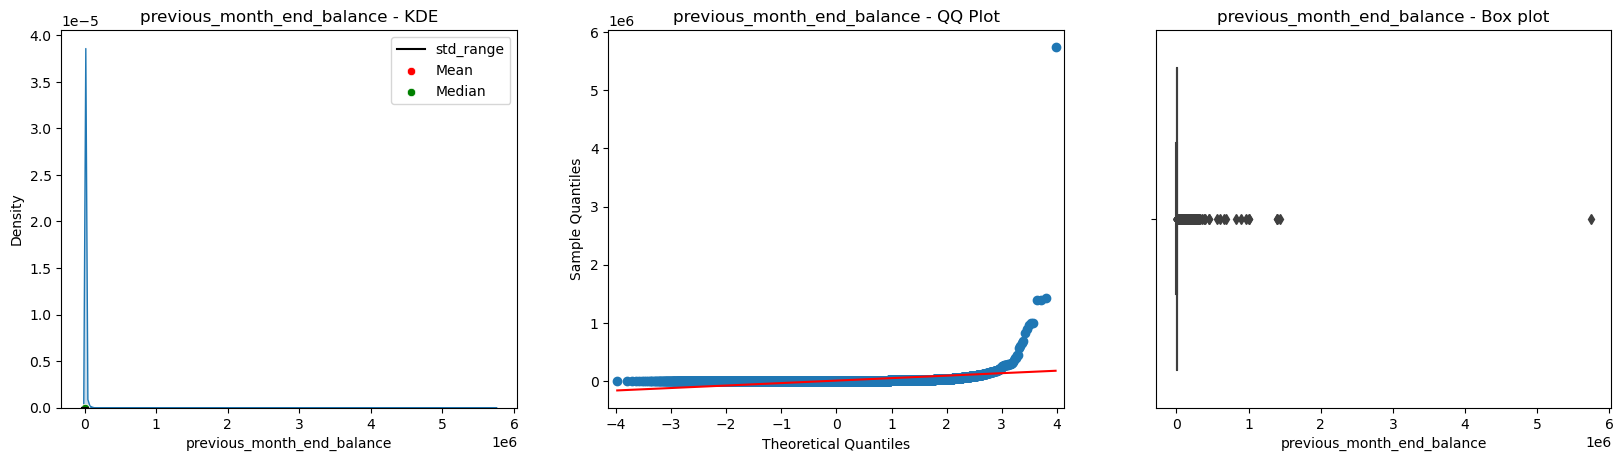

previous_month_credit Skewness: 42.56
previous_month_credit Kurtosis: 2600.39
previous_month_credit mean: 3261.69, median: 0.63
previous_month_credit standard deviation: 29688.89, one_std_range: (-26427.2, 32950.58)
previous_month_credit variance: 881430149.62
previous_month_credit Min and Max: (0.01, 2361808.29)


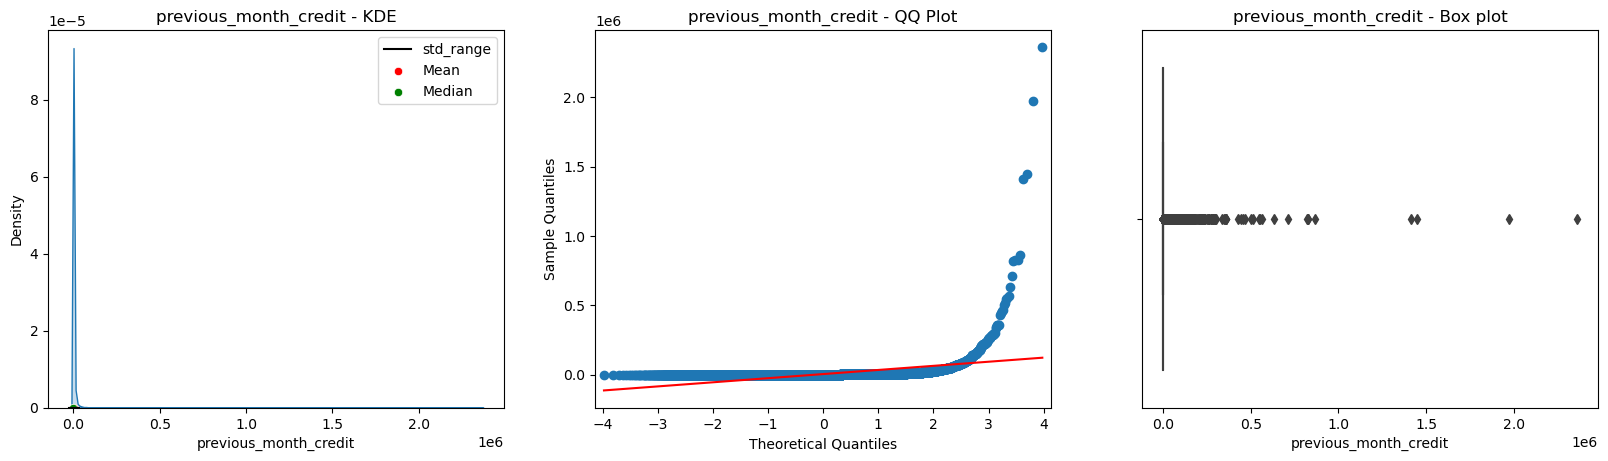

previous_month_debit Skewness: 30.64
previous_month_debit Kurtosis: 1302.67
previous_month_debit mean: 3339.76, median: 109.96
previous_month_debit standard deviation: 24301.11, one_std_range: (-20961.35, 27640.87)
previous_month_debit variance: 590544029.03
previous_month_debit Min and Max: (0.01, 1414168.06)


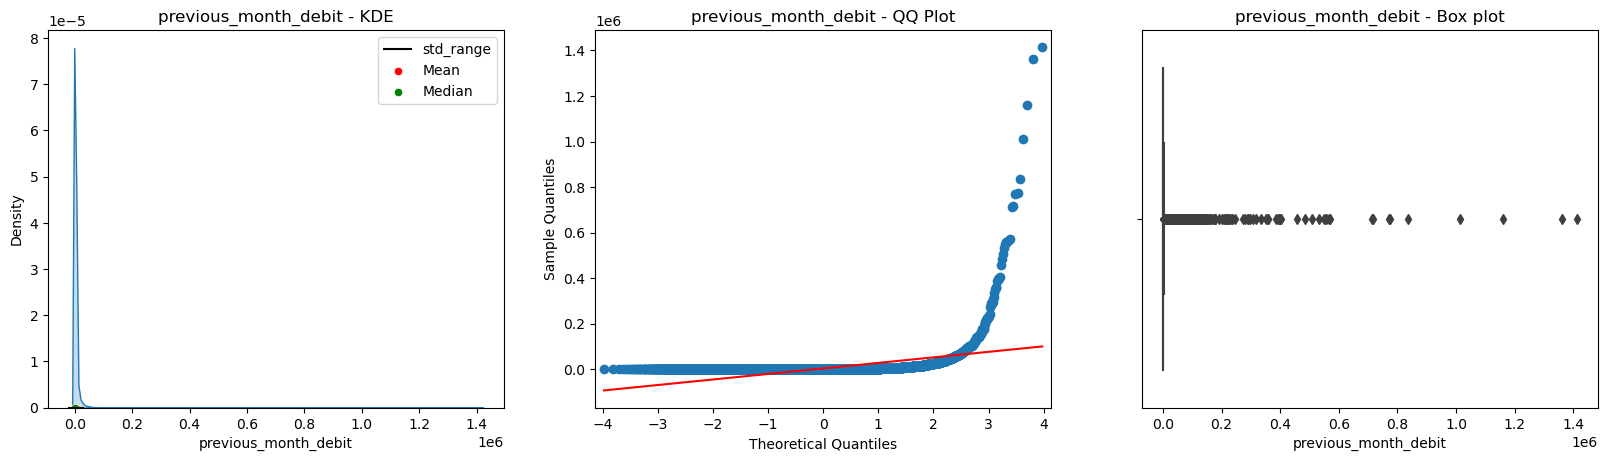

previous_month_balance Skewness: 93.4
previous_month_balance Kurtosis: 11791.99
previous_month_balance mean: 7495.18, median: 3465.23
previous_month_balance standard deviation: 42431.98, one_std_range: (-34936.8, 49927.16)
previous_month_balance variance: 1800472826.06
previous_month_balance Min and Max: (-5171.92, 5720144.5)


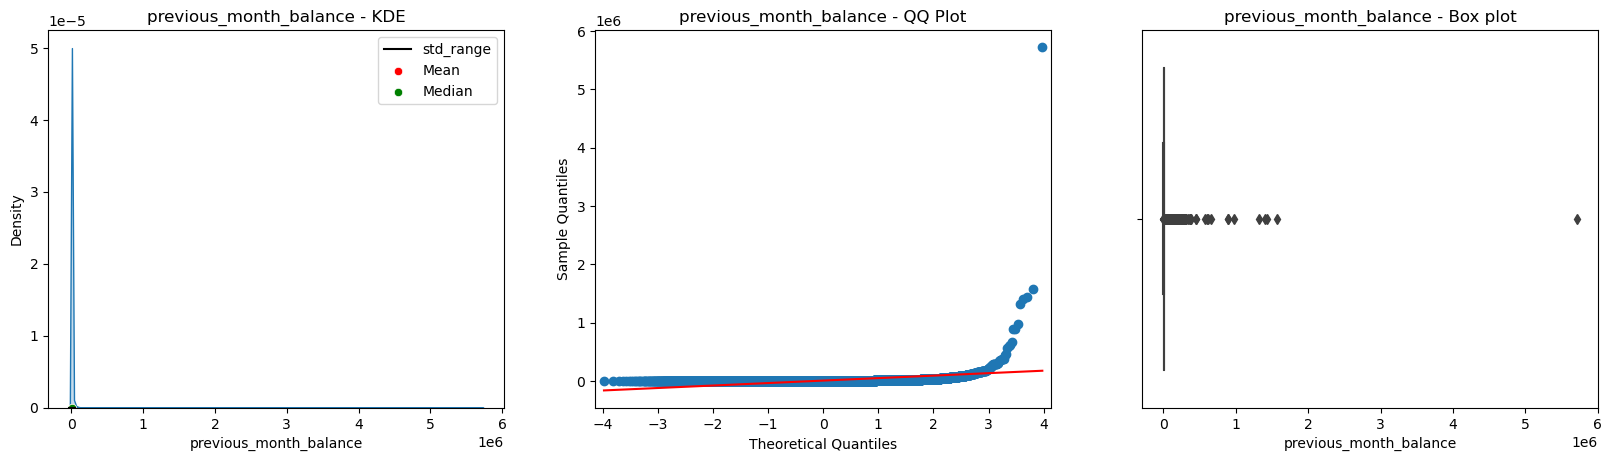

In [22]:
# Univariate analysis for previous month group before handling outliers:
for i in previous_month:
    univariate_analysis_numeric(churn_data_eda, i)

* **Previous month group** (before outliers):
  * All the variables under the previous month group have very high skewness and kurtosis values indicating the presence of a lot of Outliers/Extreme values
  * Outliers need to be handled for proper analysis of these variables

In [23]:
# Handling outliers for all the columns in the previous month group:
for col in previous_month:
    # Function call to handle outliers and update the data frame accordingly:
    churn_data_eda_no_outliers = outlier_handling(churn_data_eda, col, method = 'IQR', replace = True)   

Replacing outliers using IQR
Replacing outliers using IQR
Replacing outliers using IQR
Replacing outliers using IQR


previous_month_end_balance Skewness: 92.95
previous_month_end_balance Kurtosis: 11810.2
previous_month_end_balance mean: 7495.77, median: 3379.92
previous_month_end_balance standard deviation: 42529.35, one_std_range: (-35033.58, 50025.12)
previous_month_end_balance variance: 1808745205.24
previous_month_end_balance Min and Max: (-3149.57, 5740438.63)


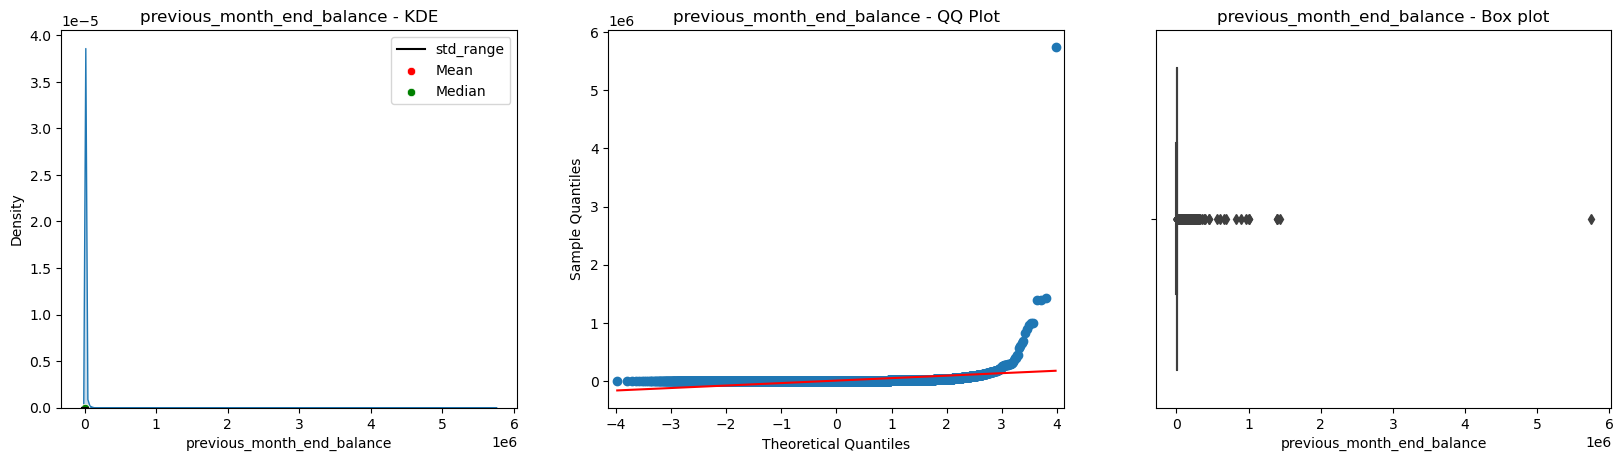

previous_month_credit Skewness: 42.56
previous_month_credit Kurtosis: 2600.39
previous_month_credit mean: 3261.69, median: 0.63
previous_month_credit standard deviation: 29688.89, one_std_range: (-26427.2, 32950.58)
previous_month_credit variance: 881430149.62
previous_month_credit Min and Max: (0.01, 2361808.29)


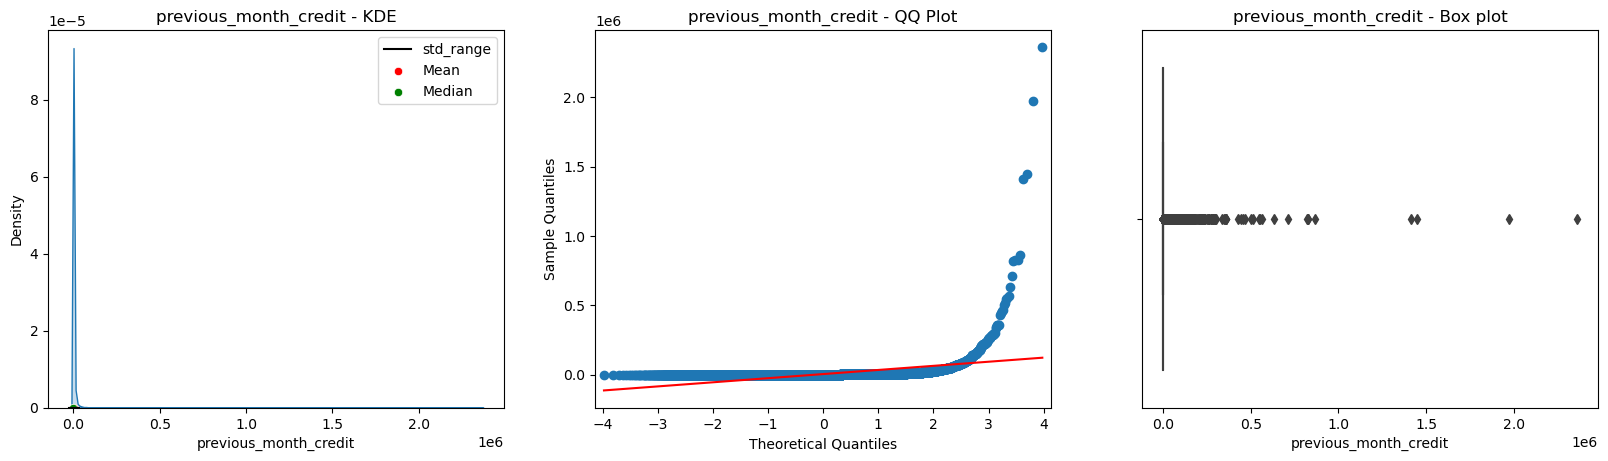

previous_month_debit Skewness: 30.64
previous_month_debit Kurtosis: 1302.67
previous_month_debit mean: 3339.76, median: 109.96
previous_month_debit standard deviation: 24301.11, one_std_range: (-20961.35, 27640.87)
previous_month_debit variance: 590544029.03
previous_month_debit Min and Max: (0.01, 1414168.06)


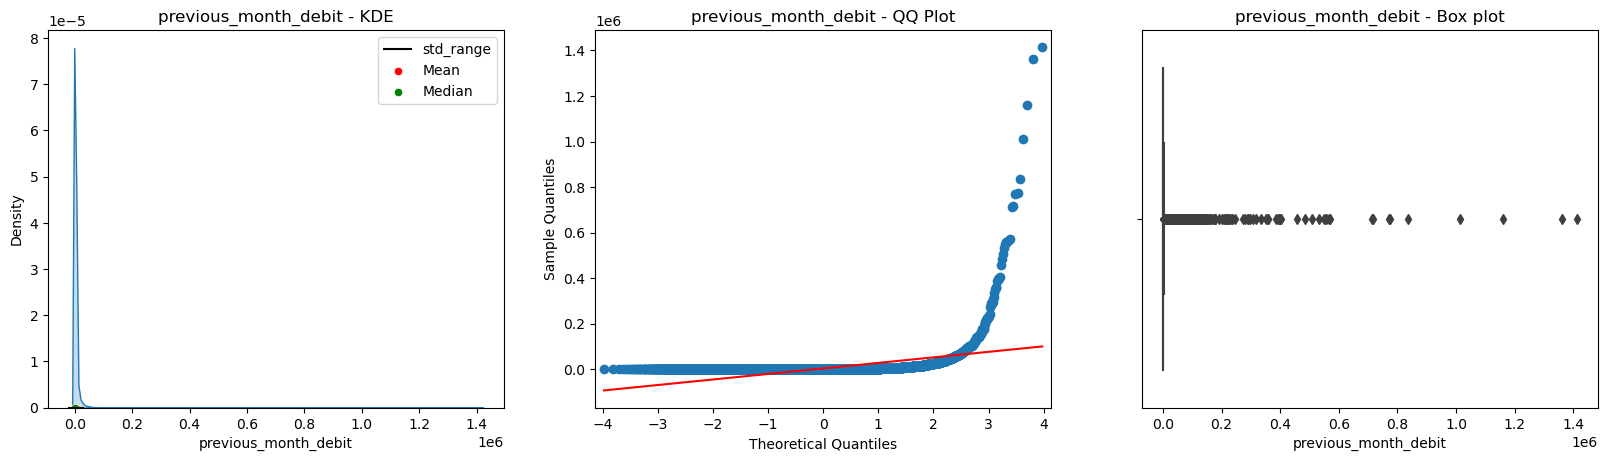

previous_month_balance Skewness: 1.12
previous_month_balance Kurtosis: 0.05
previous_month_balance mean: 4973.33, median: 3465.23
previous_month_balance standard deviation: 3882.62, one_std_range: (1090.71, 8855.95)
previous_month_balance variance: 15074721.39
previous_month_balance Min and Max: (-4796.02, 13525.12)


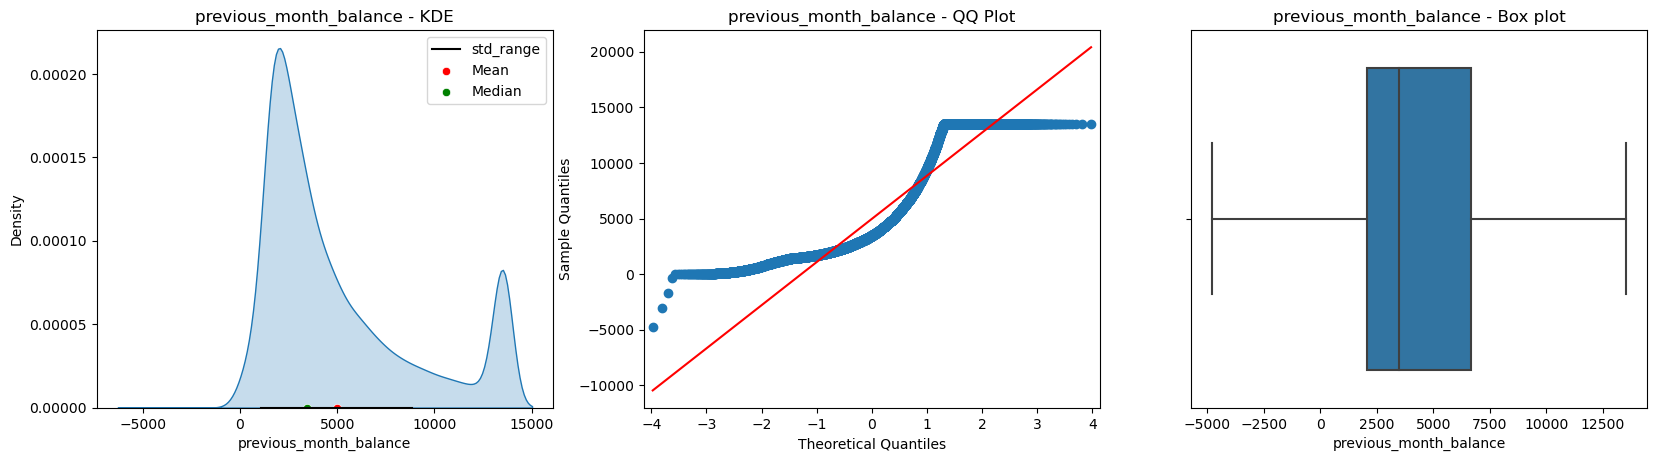

In [24]:
# Univariate analysis for previous month group after handling outliers:
for i in previous_month:
    univariate_analysis_numeric(churn_data_eda_no_outliers, i)

* **Previous month group** (after outliers):
  * After handling the outliers the plots look much better but, still have some extreme values
  * **Skewness** (1.1,1.18,1.24,1.12) are more than 0.5 indicating that the data is **Right (postively) skewed**
  * **Kurtosis** (0.03,-0.34,-0.11,0.05) are very close to 0 but some are **platykurtic**(<0) and some are **leptokurtic**(>0) which means data has both thinner tail/shorter distribution (**less extreme values**) and fatter tail/longer distribution (**more extreme values**). But, since all the distributions are also very close to zero, it means the data has **some good level of symmetry**
  * Again for all the distributions Mean is higher than the Median indicating presence of **some outliers/extreme values**
* **Things to investigate**:
    * Are there any common traits / relations between consumers who are performing higher transactions like credits and debits?
    * Are those customers performing higher transactions every month?

#### Previous Quarters group:

average_monthly_balance_prevQ Skewness: 96.65
average_monthly_balance_prevQ Kurtosis: 12423.45
average_monthly_balance_prevQ mean: 7496.78, median: 3542.86
average_monthly_balance_prevQ standard deviation: 41726.22, one_std_range: (-34229.44, 49223.0)
average_monthly_balance_prevQ variance: 1741077333.37
average_monthly_balance_prevQ Min and Max: (1428.69, 5700289.57)


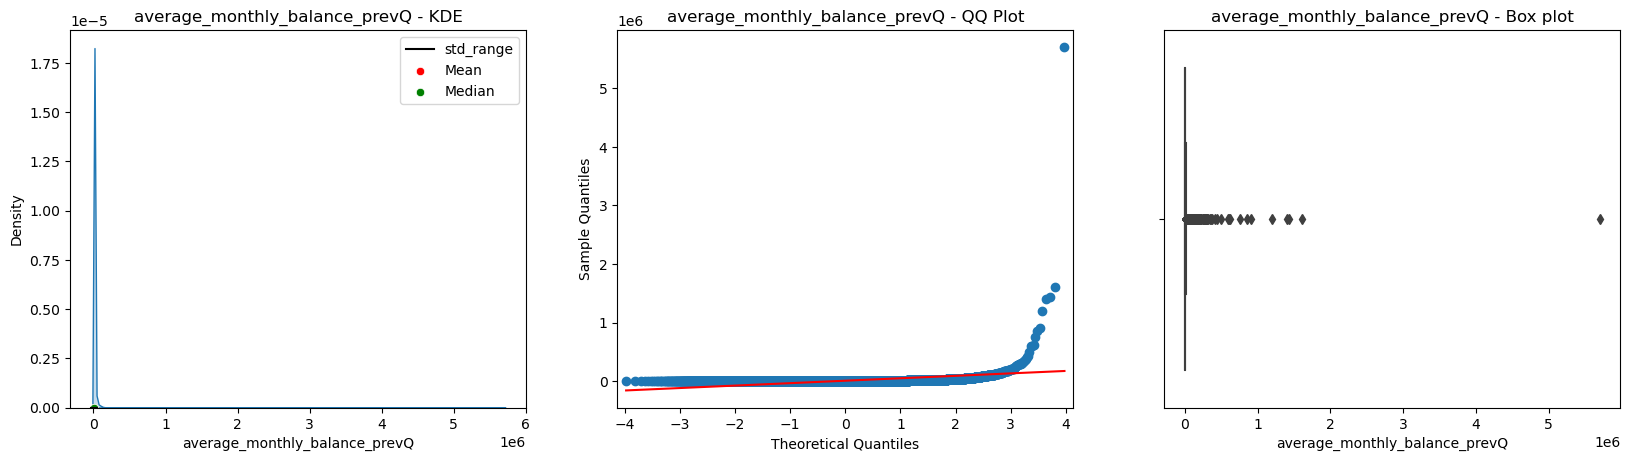

average_monthly_balance_prevQ2 Skewness: 88.89
average_monthly_balance_prevQ2 Kurtosis: 9361.91
average_monthly_balance_prevQ2 mean: 7124.21, median: 3359.6
average_monthly_balance_prevQ2 standard deviation: 44575.81, one_std_range: (-37451.6, 51700.02)
average_monthly_balance_prevQ2 variance: 1987002805.07
average_monthly_balance_prevQ2 Min and Max: (-16506.1, 5010170.1)


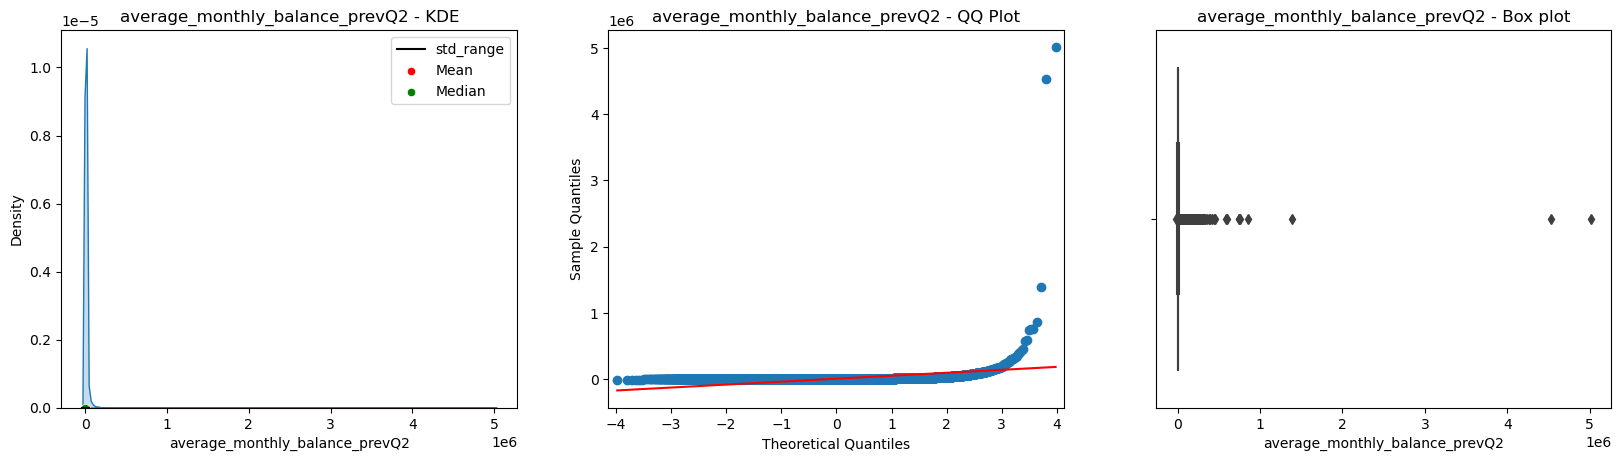

In [25]:
# Univariate analysis for previous quarters group before handling outliers:
for i in previous_quarters:
    univariate_analysis_numeric(churn_data_eda, i)

* **Previous quarters group** (before outliers):
  * Both the variables under the previous quarters group have very high skewness and kurtosis values indicating the presence of a lot of Outliers/Extreme values
  * Outliers need to be handled for proper analysis of these variables

In [26]:
# Handling outliers for all the columns in the previous quarters group:
for col in previous_quarters:
    # Function call to handle outliers and update the data frame accordingly:
    churn_data_eda_no_outliers = outlier_handling(churn_data_eda, col, method = 'IQR', replace = True)

Replacing outliers using IQR
Replacing outliers using IQR


average_monthly_balance_prevQ Skewness: 96.65
average_monthly_balance_prevQ Kurtosis: 12423.45
average_monthly_balance_prevQ mean: 7496.78, median: 3542.86
average_monthly_balance_prevQ standard deviation: 41726.22, one_std_range: (-34229.44, 49223.0)
average_monthly_balance_prevQ variance: 1741077333.37
average_monthly_balance_prevQ Min and Max: (1428.69, 5700289.57)


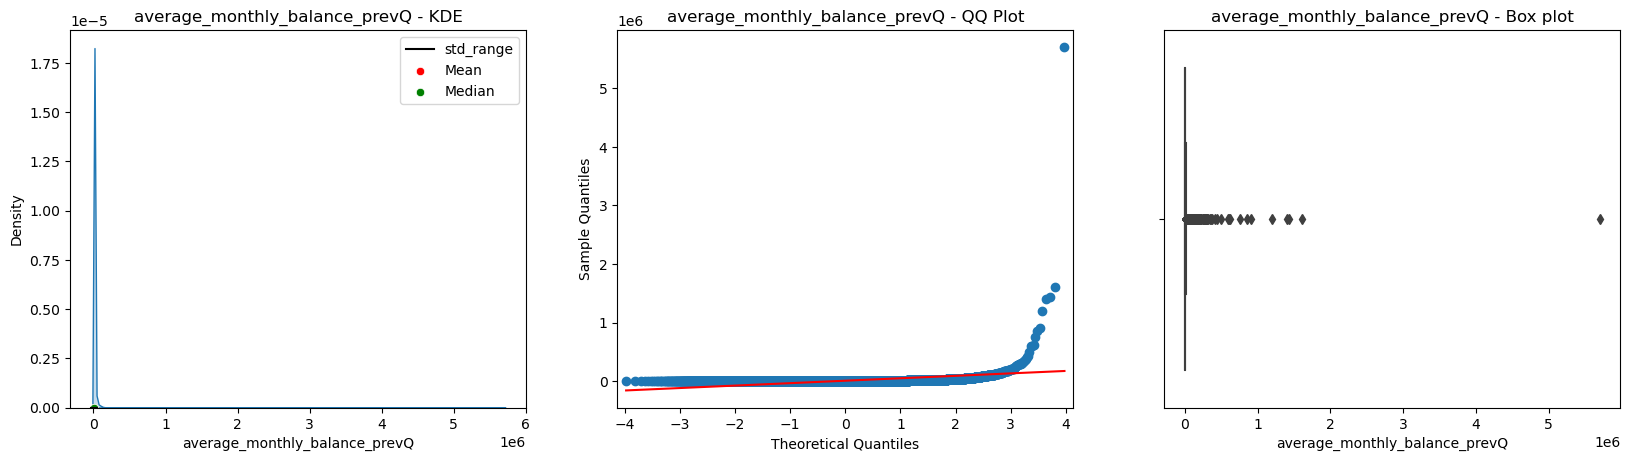

average_monthly_balance_prevQ2 Skewness: 1.09
average_monthly_balance_prevQ2 Kurtosis: 0.06
average_monthly_balance_prevQ2 mean: 4772.04, median: 3359.6
average_monthly_balance_prevQ2 standard deviation: 3957.74, one_std_range: (814.3, 8729.78)
average_monthly_balance_prevQ2 variance: 15663689.94
average_monthly_balance_prevQ2 Min and Max: (-5195.67, 13546.14)


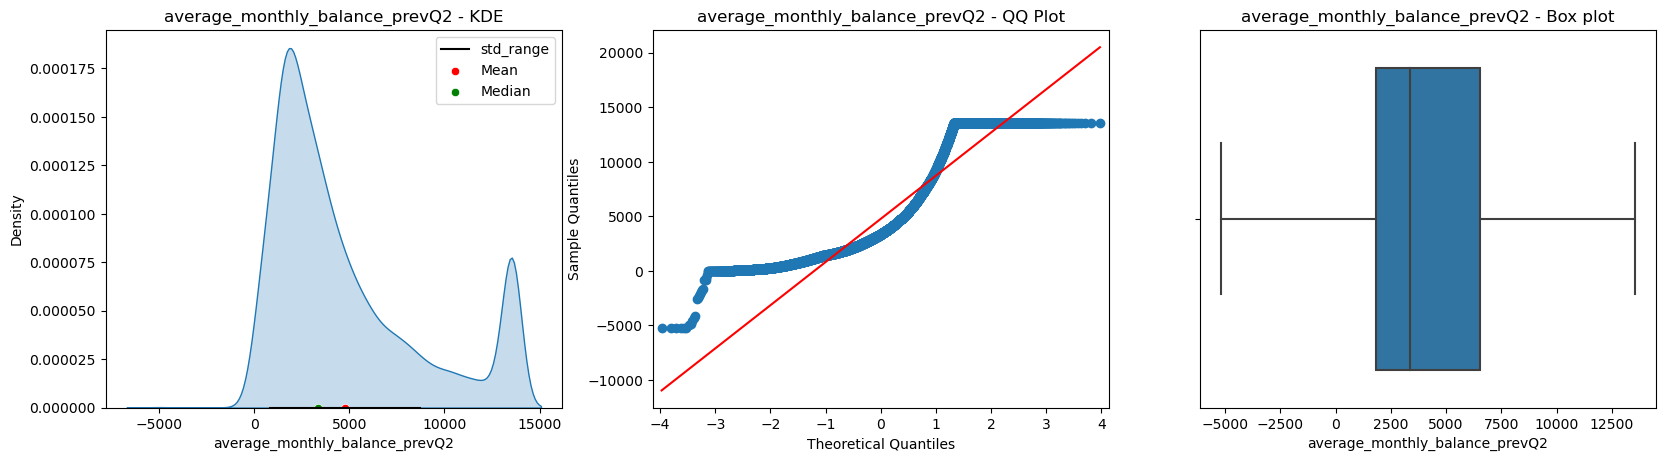

In [27]:
# Univariate analysis for previous quarters group after handling outliers:
for i in previous_quarters:
    univariate_analysis_numeric(churn_data_eda_no_outliers, i)

* **Previous quarter group** (after outliers):
  * After handling the outliers the plots look much better but, still have some extreme values
  * **Skewness** (1.16,1.09) are more than 0.5 indicating that the data is **Right (postively) skewed**
  * **Kurtosis** (0.08,0.06) are very close to 0 but some are **platykurtic**(<0) and some are **leptokurtic**(>0) which means data has both thinner tail/shorter distribution (**less extreme values**) and  fatter tail/longer distribution (**more extreme values**). But, since all the distributions skewness and kurtosis values are also very close to zero, it means the data has **some good level of symmetry**
  * Again for all the distributions Mean is higher than the Median indicating presence of **some outliers/extreme values**
* **Things to investigate**:
    * Are there any common traits / relations between consumers who are performing higher transactions like credits and debits?
    * Are those customers performing higher transactions every month?

#### Transactions Group:

days_since_last_transaction Skewness: 1.64
days_since_last_transaction Kurtosis: 1.87
days_since_last_transaction mean: 70.0, median: 30.0
days_since_last_transaction standard deviation: 86.34, one_std_range: (-16.34, 156.34)
days_since_last_transaction variance: 7454.79
days_since_last_transaction Min and Max: (0.0, 365.0)


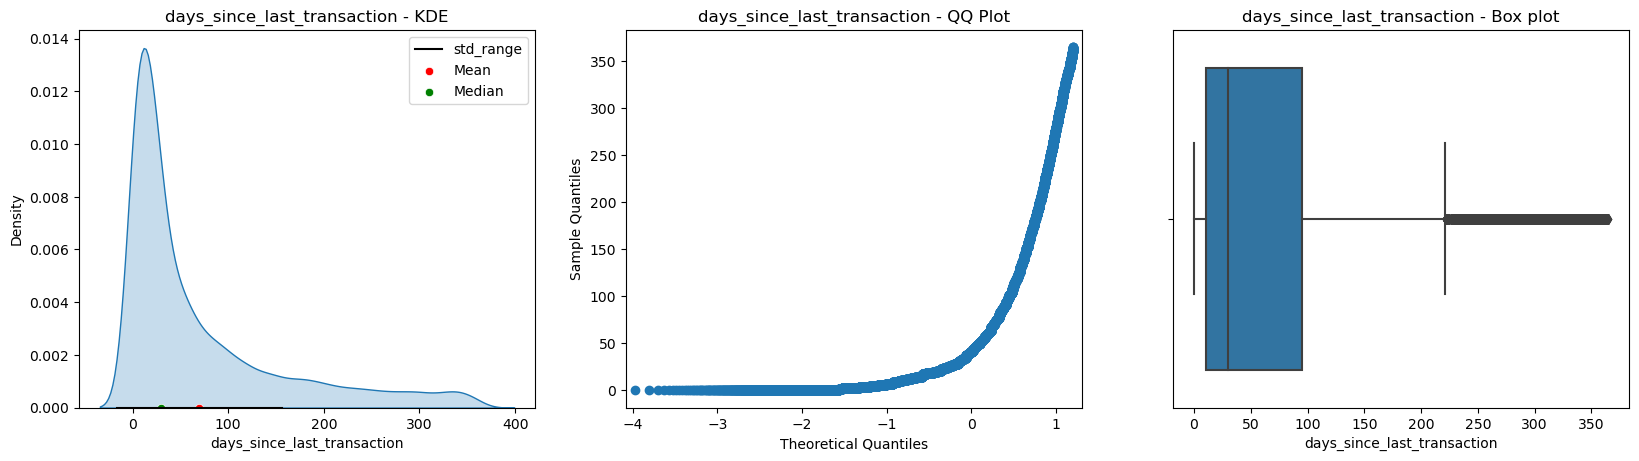

In [28]:
# Univariate analysis for Transactions group before handling outliers:
for i in transaction:
    univariate_analysis_numeric(churn_data_eda, i)

* **Transaction group** (before outliers):
  * Both the variables under the previous quarters group have very high skewness and kurtosis values indicating the presence of a lot of Outliers/Extreme values
  * Outliers need to be handled for proper analysis of these variables

In [29]:
# Handling outliers for all the columns in the previous quarters group:
for col in transaction:
    # Function call to handle outliers and update the data frame accordingly:
    churn_data_eda_no_outliers = outlier_handling(churn_data_eda, col, method = 'IQR', replace = True)

Replacing outliers using IQR


days_since_last_transaction Skewness: 1.18
days_since_last_transaction Kurtosis: 0.05
days_since_last_transaction mean: 63.95, median: 30.0
days_since_last_transaction standard deviation: 70.9, one_std_range: (-6.95, 134.85)
days_since_last_transaction variance: 5027.48
days_since_last_transaction Min and Max: (0.0, 221.0)


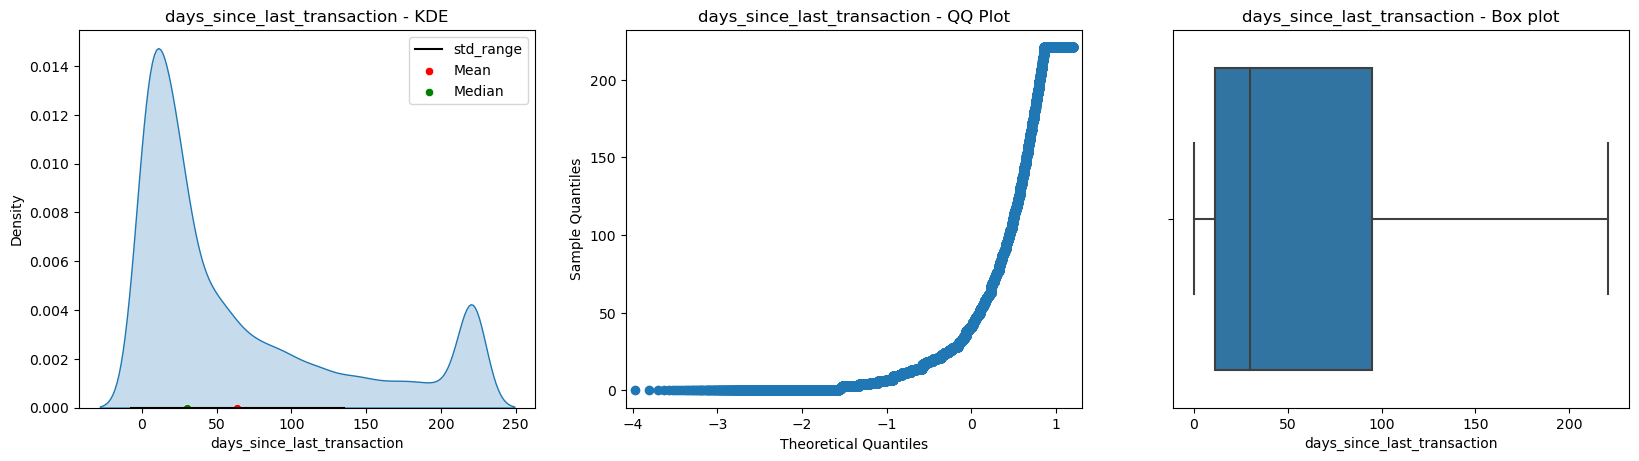

In [30]:
# Univariate analysis for Transactions group after handling outliers:
for i in transaction:
    univariate_analysis_numeric(churn_data_eda_no_outliers, i)

**Transaction group** (after outliers):
  * After handling the outliers the plots look much better but, still have some extreme values
  * **Skewness** (1.18) is more than 0.5 indicating that the data is **Right (postively) skewed**
  * **Kurtosis** (0.05) is  more than 0 but close to 0 **leptokurtic**(>0) which means the data has fatter tail/longer distribution (**more extreme values**). But, since the skewness and kurtosis values are also very close to zero, it means the data has **some level of symmetry**
  * Again the distribution Mean is higher than the Median indicating presence of **some outliers/extreme values**
* **Things to investigate**:
    * Did all the customers whose last transaction was 6 months ago churn?

### Exploring Categorical variables:

In [31]:
churn_data_eda

customer_id  vintage  age  gender  dependents     occupation    city  \
0                1     3135   66    Male         0.0  self_employed   187.0   
1                2      310   35    Male         0.0  self_employed     NaN   
2                4     2356   31    Male         0.0       salaried   146.0   
3                5      478   90     NaN         NaN  self_employed  1020.0   
4                6     2531   42    Male         2.0  self_employed  1494.0   
...            ...      ...  ...     ...         ...            ...     ...   
28377        30297     1845   10  Female         0.0        student  1020.0   
28378        30298     4919   34  Female         0.0  self_employed  1046.0   
28379        30299      297   47    Male         0.0       salaried  1096.0   
28380        30300     2585   50    Male         3.0  self_employed  1219.0   
28381        30301     2349   18    Male         0.0        student  1232.0   

      customer_nw_category branch_code  days_since_last_transaction  ...  \
0                        2         755                        224.0  ...   
1                        2        3214                         60.0  ...   
2                        2          41                          NaN  ...   
3                        2         582                        147.0  ...   
4                        3         388                         58.0  ...   
...                    ...         ...                          ...  ...   
28377                    2        1207                         70.0  ...   
28378                    2         223                         14.0  ...   
28379                    2         588                          0.0  ...   
28380                    3         274                          NaN  ...   
28381                    2         474                         59.0  ...   

       previous_month_end_balance  average_monthly_balance_prevQ  \
0                         1458.71                        1458.71   
1                         8704.66                        7799.26   
2                         5815.29                        4910.17   
3                         2291.91                        2084.54   
4                         1401.72                        1643.31   
...                           ...                            ...   
28377                     1076.43                        2282.19   
28378                     4069.21                        3668.83   
28379                    61017.55                       53444.81   
28380                     1625.55                        1683.20   
28381                     2821.34                        3213.44   

       average_monthly_balance_prevQ2  current_month_credit  \
0                             1449.07                  0.20   
1                            12419.41                  0.56   
2                             2815.94                  0.61   
3                             1006.54                  0.47   
4                             1871.12                  0.33   
...                               ...                   ...   
28377                         2787.70                  0.30   
28378                         3865.55                  1.71   
28379                        21925.81               4666.84   
28380                         1857.42                  0.20   
28381                         4447.45                  0.11   

       previous_month_credit  current_month_debit  previous_month_debit  \
0                       0.20                 0.20                  0.20   
1                       0.56              5486.27                100.56   
2                       0.61              6046.73                259.23   
3                       0.47                 0.47               2143.33   
4                     714.61               588.62               1538.06   
...                      ...                  ...                   ...   
28377                   0.30                 0

In [32]:
# Percentage of each category in the column ignoring null values:
print(churn_data_eda['gender'].value_counts(normalize=True))
print('----------------')
# Percentage of each category in the column considering null values:
print(churn_data_eda['gender'].value_counts()/churn_data_eda['gender'].shape[0])

Male      0.594034
Female    0.405966
Name: gender, dtype: float64
----------------
Male      0.583046
Female    0.398457
Name: gender, dtype: float64


In [33]:
# List of categorical columns and their data types:
print(churn_data_eda.select_dtypes(exclude=['int64','Int64','float64']).dtypes)

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object


**Grouping categorical variables**:
  * **customer_details_categorical** = ['gender','occupation','customer_nw_category']
  * **account_details_categorical** = ['city','branch_code']
  * **churn** = ['churn']

In [34]:
# Creating customer details group:
customer_details_categorical = ['gender','occupation','customer_nw_category']
# Creating account details group:
account_details_categorical = ['city','branch_code']
# Creating churn group:
churn_categorical = ['churn']

In [35]:
# Function to perform univariate analysis for the categorical variables:
def univariate_analysis_categorical(df, col_name, target_cat='all'):
    
    # Taking a copy of the data:
    df_churn_rate = df.copy()
    
    if target_cat == 'churn':
        # Filtering data frame only for the customers who churn:
        df = df.loc[df['churn'] == 1]
    elif target_cat == 'non-churn':
        # Filtering data frame only for the customers who do not churn:
        df = df.loc[df['churn'] == 0]
        
    
    # Getting unique no.of categories:
    category_unique = df[col_name].nunique()
    # Filtering only top 10 categories to display visually:
    if category_unique > 5:
        # calculating the percentages for each category within each variable:
        category_percentages = df[col_name].value_counts(normalize=True)[:10]
        category_frequencies = df[col_name].value_counts()[:10]
        
        # Calculating the churn rate:
        churn_category = pd.DataFrame(df_churn_rate.loc[df_churn_rate['churn'] == 1][col_name].value_counts()[:10]).reset_index()
        category_all = pd.DataFrame(df_churn_rate[col_name].value_counts().reset_index())

        churn_rate_df = pd.merge(churn_category, category_all, how='left', left_on = 'index', right_on = 'index')
        churn_rate_df['churn_rate'] = churn_rate_df[col_name + '_x'] / churn_rate_df[col_name + '_y']
    else:
        # calculating the percentages for each category within each variable:
        category_percentages = df[col_name].value_counts(normalize=True)
        category_frequencies = df[col_name].value_counts()
        
        # Calculating the churn rate:
        churn_category = pd.DataFrame(df_churn_rate.loc[df_churn_rate['churn'] == 1][col_name].value_counts()).reset_index()
        category_all = pd.DataFrame(df_churn_rate[col_name].value_counts().reset_index())

        churn_rate_df = pd.merge(churn_category, category_all, how='left', left_on = 'index', right_on = 'index')
        churn_rate_df['churn_rate'] = churn_rate_df[col_name + '_x'] / churn_rate_df[col_name + '_y']
    
    # Plotting the bar graph for the variable to visually represent each categories and their frequencies:
    fig, axes = plt.subplots(1,3,figsize=(20,7), dpi=100)
    
    axy = sns.barplot(ax=axes[0], x=category_frequencies.index, y=category_frequencies.values, order=category_frequencies.index)
    for p in axy.patches:
        axy.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)
        
    axes[0].set_xlabel('{}'.format(col_name), fontsize=20)
    axes[0].set_ylabel('Frequency', fontsize=20)
    axes[0].set_title('{} frequency - {} customers'.format(col_name, target_cat), fontsize=15)
    
    
    # Plotting the bar graph for the variable to visually represent each categories and their frequencies:
    axy = sns.barplot(ax=axes[1],x=category_percentages.index, y=category_percentages.values, order=category_percentages.index)
    for p in axy.patches:
        axy.annotate('{:1.2f}'.format(p.get_height()*100), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)
        
    axes[1].set_xlabel('{}'.format(col_name), fontsize=20)
    axes[1].set_ylabel('Fraction/Percentages', fontsize=20)
    axes[1].set_title('{} percentages - {} customers'.format(col_name, target_cat), fontsize=15)
    
    # Plotting the bar graph for the variable to visually represent churn rate for each categorie:
    axy = sns.barplot(ax=axes[2],x=churn_rate_df['index'].values, y=churn_rate_df['churn_rate'].values, order=churn_rate_df['index'].values)
    for p in axy.patches:
        axy.annotate('{:1.2f}'.format(p.get_height()*100), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)
        
    axes[2].set_xlabel('{}'.format(col_name), fontsize=20)
    axes[2].set_ylabel('Churn rate', fontsize=20)
    axes[2].set_title('{} churn rate of each category'.format(col_name), fontsize=15)
    
    plt.show()
    

#### Customer details categorical group:

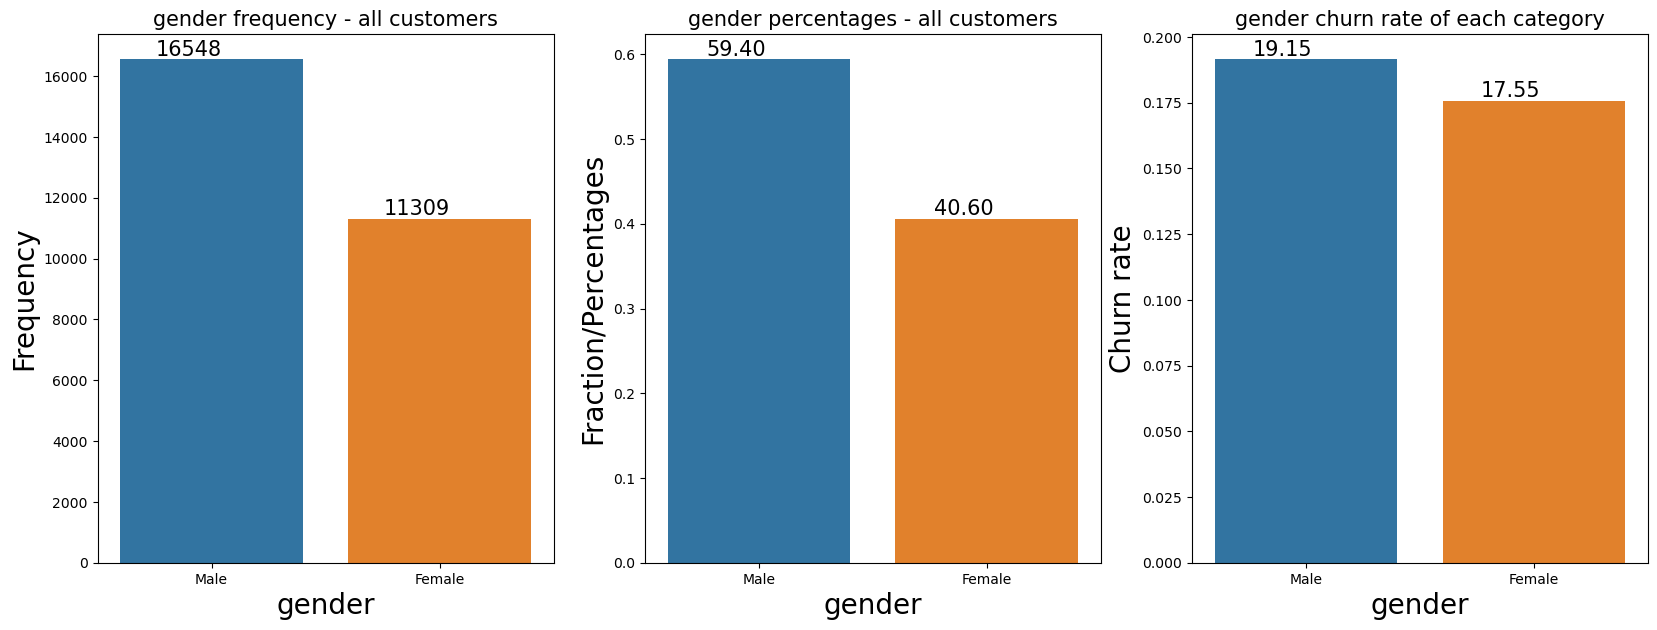

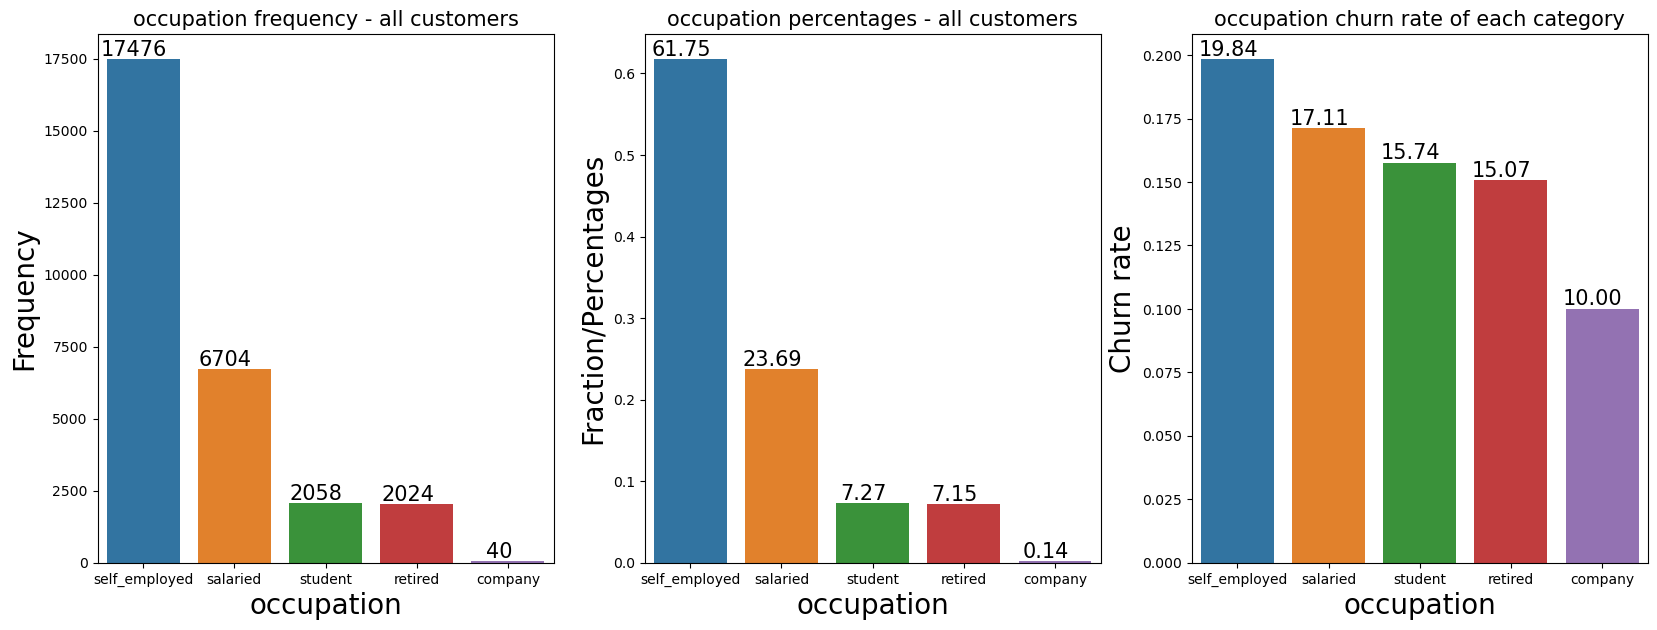

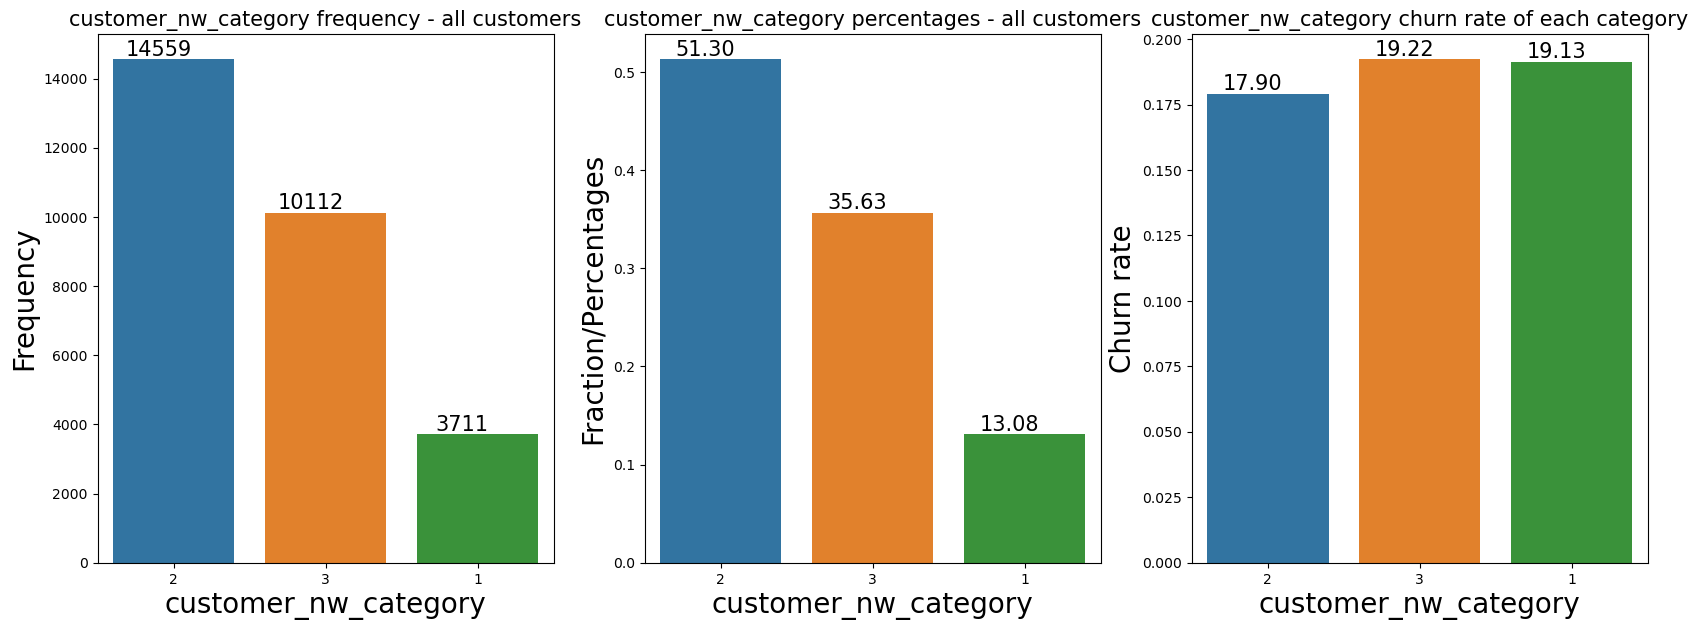

In [36]:
# Univariate analysis for customer details group:
for i in customer_details_categorical:
    univariate_analysis_categorical(churn_data_eda, i, 'all')

* **Customer details categorical:**
  * **gender:** 
    * Around 60% of the all the accounts belong to Male and 40% belong to female
    * Considering only churning customers, around 61% of them are male and 38% are female
    * 19% of all male customers churn whereas only 17% of female customers churn
  * **occupation:**
    * 62% of all the accounts belong to the customers whose occupation is self-employed and second highest are salaried customers accounting upto 24%
    * Not surprisingly, highest number of customers who churn are self-employed
    * customers who are self-employed have the highest churn rate of 19%, followed by salaried customers with 17% churn rate
  * **customer_nw_category:**
    * This is the income category where 1 is high income and 3 is low income
    * Half of all accounts with bank belong to 2nd net worth category (Medium income)
    * Less than 15% of the accounts belong to 1st net worth category (High income)
    * Majority of the churning customers belong to either 1st or 2nd net worth category
    * Customers with high income net worth and low income net worth have highest churn rates of 19% compared to medium income customers whose churn rate is only 17%


#### Account details categorical group:

In [37]:
test = pd.DataFrame(churn_data_eda.loc[churn_data_eda['churn'] == 1]['occupation'].value_counts().reset_index())
display(test[test['index'] == 'self_employed'])
test2 = pd.DataFrame(churn_data_eda['occupation'].value_counts().reset_index())
display(test2[test2['index'] == 'self_employed'])

index  occupation
0  self_employed        3467

index  occupation
0  self_employed       17476

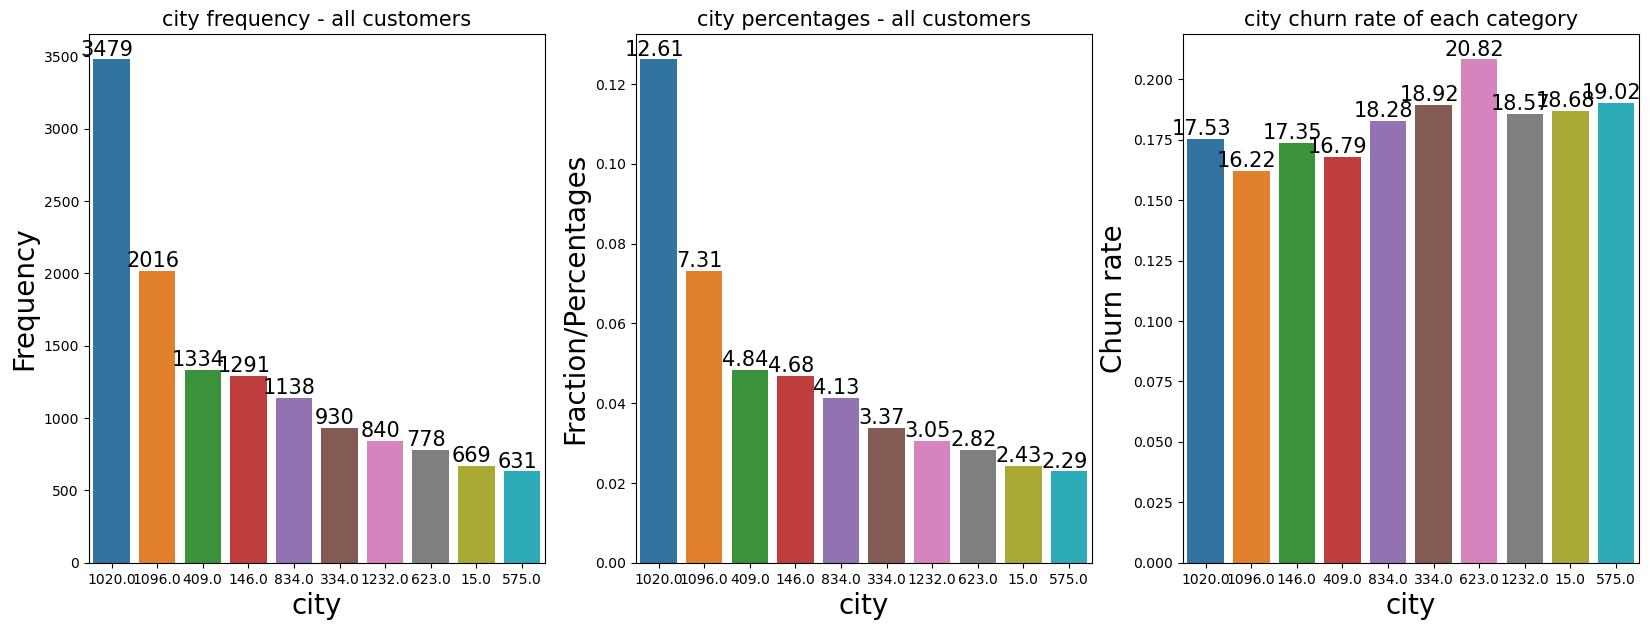

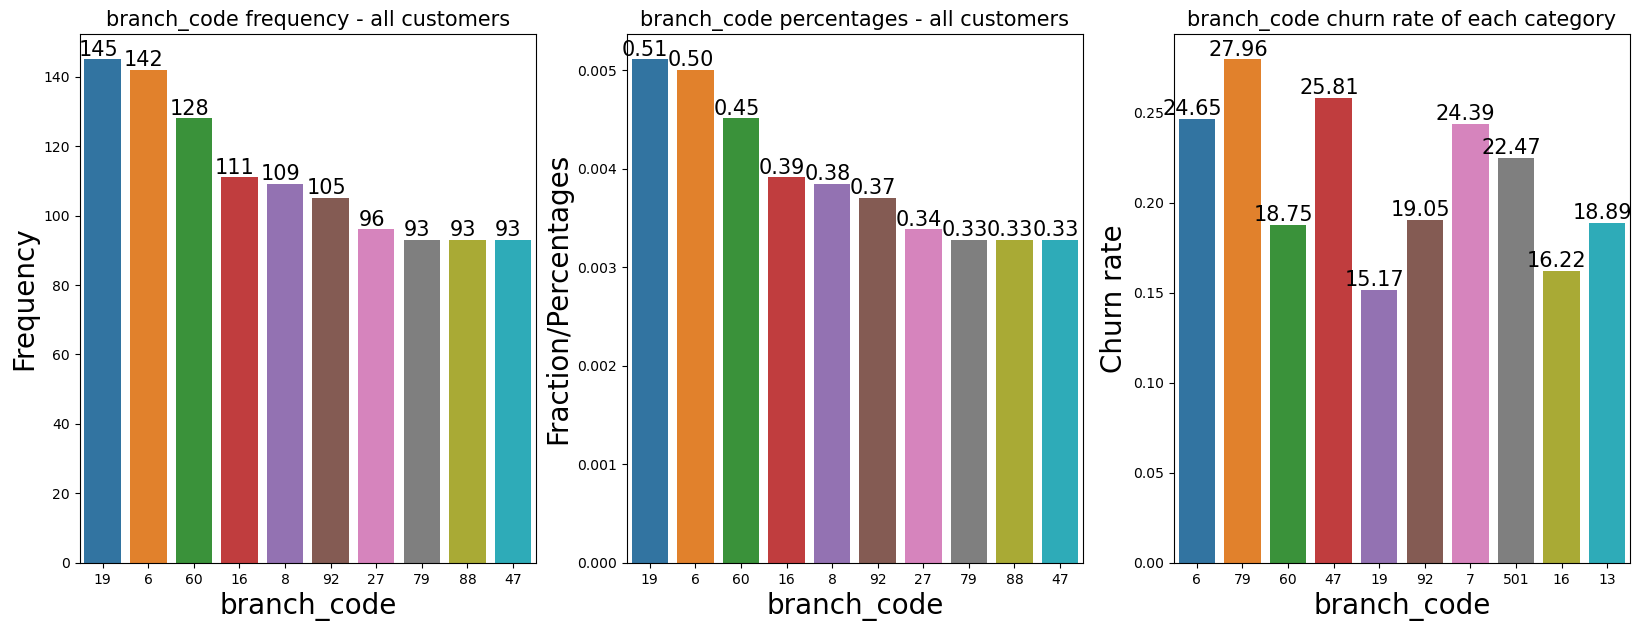

In [38]:
# Univariate analysis of Account details categorical group:
for i in account_details_categorical:
    univariate_analysis_categorical(churn_data_eda, i, 'all')

* **Account details categorical:**
  * **city** and **branch_code:** 
    * Both the variables have significantly high number of categories where some cities and branchcodes are more popular than others
  * **Things to investigate:**
    * Popular cities and branch codes might explain the skewness and outliers of credit and debit variables as people in these cities might be responsible for these higher transactions
    * Also, cities with fewer accounts may link to customers in those cities churning

#### Churn categorical group:

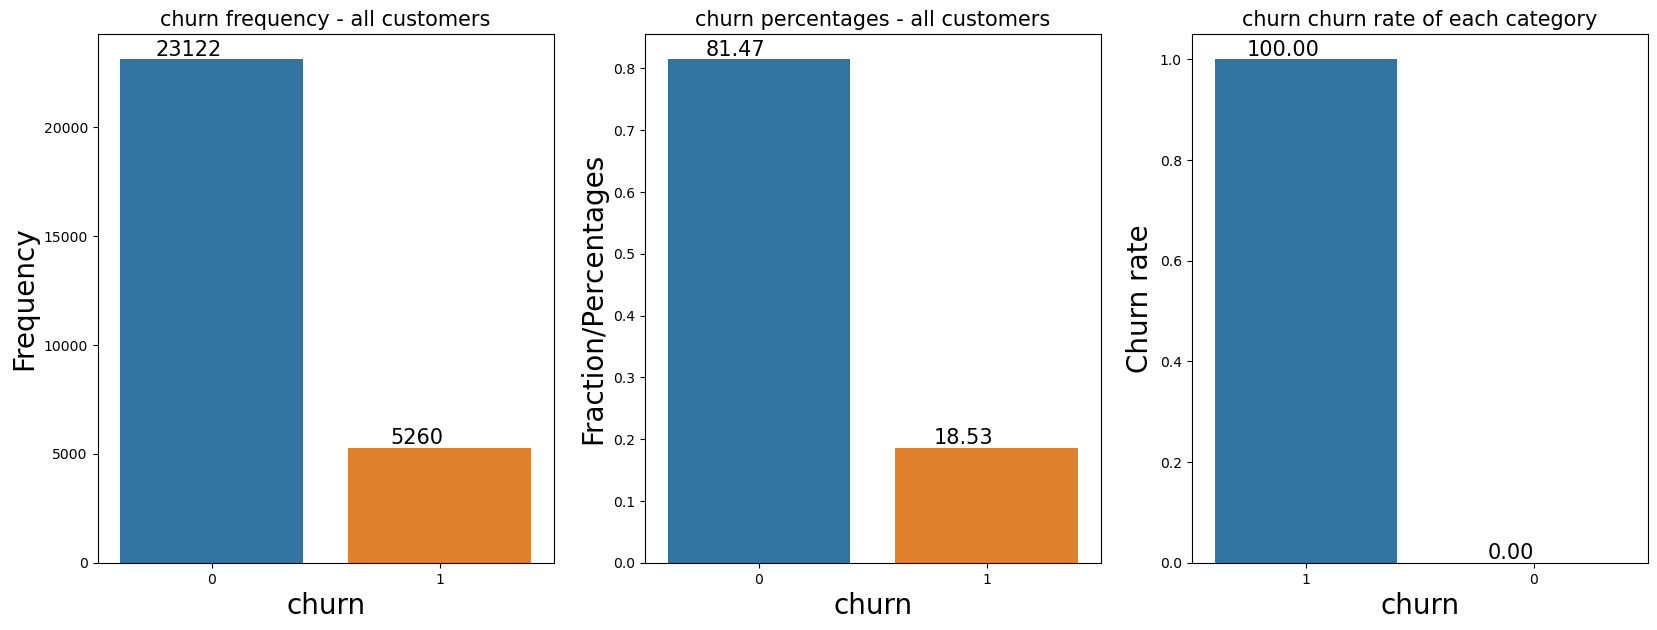

In [39]:
# Univariate analysis of churn categorical group:
for i in churn_categorical:
    univariate_analysis_categorical(churn_data_eda, i, 'all')

* **churn categorical:**
  * **churn:** The target class is highly imbalance looking from the above plot. Here, we can see that class 0 (not-churning) classes are account upto 82% of the data. This will most likely result in the bias from the prediction model and have model will have low recall score.

### Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2. Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.


### Bivariate Analysis: Numerical - Numerical variables:

In [40]:
# Visual method to check correlation - Heat map
# Visual method to check how 2 continious variables vary and interact with each other - scatterplots, KDE plot for 2 variables

In [41]:
# Considering only the numerical data:
numerical_data = churn_data_eda.select_dtypes(include = ['int64','Int64','float64'])
display(numerical_data)
print(numerical_data.dtypes)

customer_id  vintage  age  dependents  days_since_last_transaction  \
0                1     3135   66         0.0                        224.0   
1                2      310   35         0.0                         60.0   
2                4     2356   31         0.0                          NaN   
3                5      478   90         NaN                        147.0   
4                6     2531   42         2.0                         58.0   
...            ...      ...  ...         ...                          ...   
28377        30297     1845   10         0.0                         70.0   
28378        30298     4919   34         0.0                         14.0   
28379        30299      297   47         0.0                          0.0   
28380        30300     2585   50         3.0                          NaN   
28381        30301     2349   18         0.0                         59.0   

       current_balance  previous_month_end_balance  \
0              1458.71                     1458.71   
1              5390.37                     8704.66   
2              3913.16                     5815.29   
3              2291.91                     2291.91   
4               927.72                     1401.72   
...                ...                         ...   
28377          1076.43                     1076.43   
28378          3844.10                     4069.21   
28379         65511.97                    61017.55   
28380          1625.55                     1625.55   
28381          2107.05                     2821.34   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                            1458.71                         1449.07   
1                            7799.26                        12419.41   
2                            4910.17                         2815.94   
3                            2084.54                         1006.54   
4                            1643.31                         1871.12   
...                              ...                             ...   
28377                        2282.19                         2787.70   
28378                        3668.83                         3865.55   
28379                       53444.81                        21925.81   
28380                        1683.20                         1857.42   
28381                        3213.44                         4447.45   

       current_month_credit  previous_month_credit  current_month_debit  \
0                      0.20                   0.20                 0.20   
1                      0.56                   0.56              5486.27   
2                      0.61                   0.61              6046.73   
3                      0.47                   0.47                 0.47   
4                      0.33                 714.61               588.62   
...                     ...                    ...                  ...   
28377                  0.30                   0.30                 0.30   
28378                  1.71                   2.29               901.00   
28379               4666.84                3883.06               168.23   
28380                  0.20                   0.20                 0.20   
28381                  0.11                   7.44               714.40   

       previous_month_debit  current_month_balance  previous_month_balance  
0                      0.20                1458.71                 1458.71  
1                    100.56                6496.78                 8787.61  
2                    259.23                5006.28                 5070.14  
3                   2143.33                2291.91                 1669.79  
4                   1538.06                1157.15                 1677.16  
...                     ...                    ...                     ...  
28377                  0.30                1076.43                 1076.43  
28378               1014.07                3738.54 

customer_id                         int64
vintage                             int64
age                                 int64
dependents                        float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object


#### Correlation Matrix:

In [42]:
# Correlation matrix:
correlation_matrix = numerical_data.dropna().corr()
correlation_matrix

customer_id   vintage       age  dependents  \
customer_id                        1.000000 -0.002164  0.001397   -0.009737   
vintage                           -0.002164  1.000000  0.245057    0.033567   
age                                0.001397  0.245057  1.000000   -0.003809   
dependents                        -0.009737  0.033567 -0.003809    1.000000   
days_since_last_transaction        0.005543 -0.062125 -0.011035   -0.079834   
current_balance                    0.014989  0.016143  0.058925   -0.004554   
previous_month_end_balance         0.012414  0.020513  0.062775   -0.000826   
average_monthly_balance_prevQ      0.011372  0.018705  0.070903    0.000121   
average_monthly_balance_prevQ2     0.008060  0.034368  0.081361    0.002584   
current_month_credit               0.004223  0.001439  0.023921    0.002188   
previous_month_credit             -0.004819  0.026375  0.027678    0.022772   
current_month_debit                0.004870  0.004915  0.025366    0.006784   
previous_month_debit              -0.005906  0.024634  0.027717    0.029073   
current_month_balance              0.012085  0.014882  0.063120   -0.001859   
previous_month_balance             0.011025  0.017698  0.067712    0.000241   

                                days_since_last_transaction  current_balance  \
customer_id                                        0.005543         0.014989   
vintage                                           -0.062125         0.016143   
age                                               -0.011035         0.058925   
dependents                                        -0.079834        -0.004554   
days_since_last_transaction                        1.000000        -0.035241   
current_balance                                   -0.035241         1.000000   
previous_month_end_balance                        -0.024140         0.809257   
average_monthly_balance_prevQ                     -0.021114         0.857204   
average_monthly_balance_prevQ2                    -0.010328         0.584156   
current_month_credit                              -0.031829         0.053329   
previous_month_credit                             -0.070149         0.101495   
current_month_debit                               -0.037642         0.075149   
previous_month_debit                              -0.070172         0.151771   
current_month_balance                             -0.030689         0.940234   
previous_month_balance                            -0.019122         0.812295   

                                previous_month_end_balance  \
customer_id                                       0.012414   
vintage                                           0.020513   
age                                               0.062775   
dependents                                       -0.000826   
days_since_last_transaction                      -0.024140   
current_balance                                   0.809257   
previous_month_end_balance                        1.000000   
average_monthly_balance_prevQ                     0.908053   
average_monthly_balance_prevQ2                    0.661439   
current_month_credit                              0.051080   
previous_month_credit                             0.195149   
current_month_debit                               0.100379   
previous_month_debit                              0.192376   
current_month_balance                             0.910206   
previous_month_balance                            0.912269   

                                average_monthly_balance_prevQ  \
customer_id                                          0.011372   
vintage                                              0.018705   
age                                                  0.070903   
dependents                                           0.000121   
days_since_last_transaction                         -0.021114   
current_balance                                      0.857204   
previous_month_end_balance            

#### Heat Map:

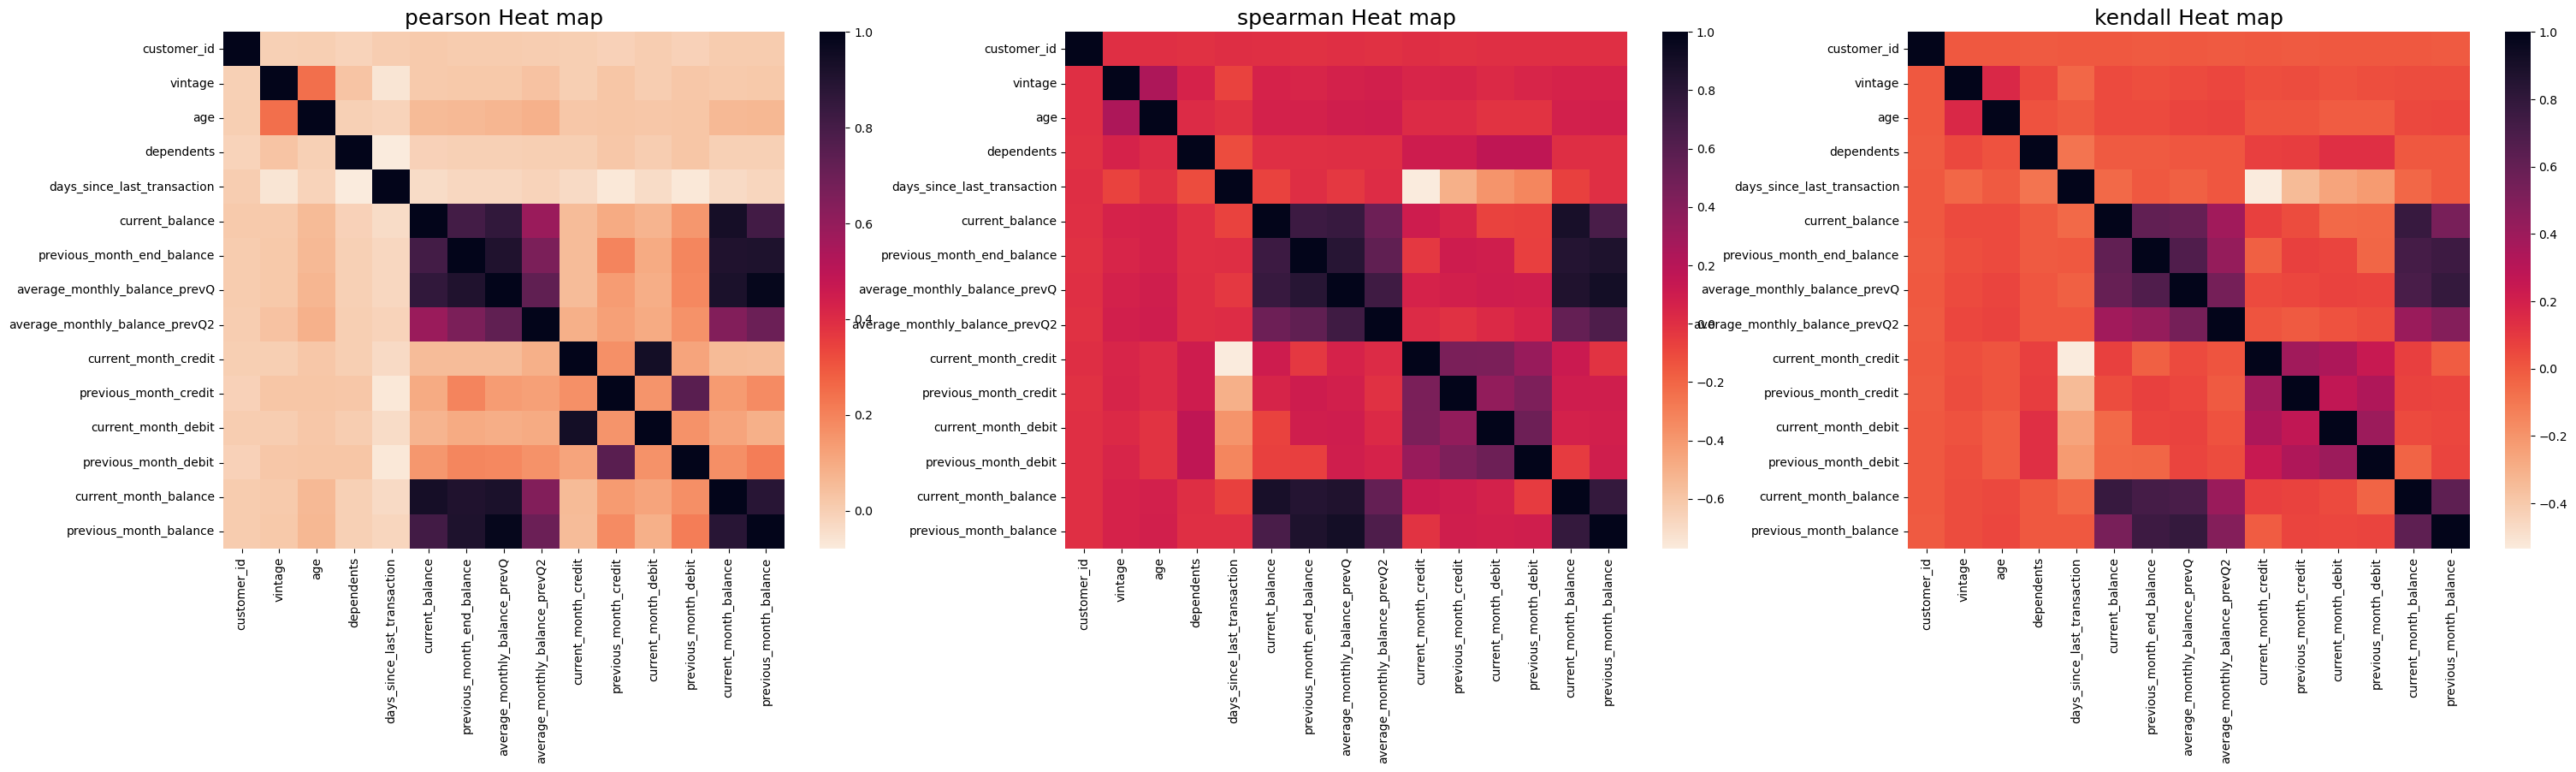

In [43]:
# List of correlation methods:
correlation_methods = ['pearson','spearman','kendall']

# Heat map of correlation matrix using all 3 types of correlation methods:
plt.figure(figsize=(36,8), dpi=100)

for j,i in enumerate(correlation_methods):    
    plt.subplot(1, len(correlation_methods), j+1)
    
    # Correlation matrix using all three correlation methods:
    correlation_matrix = numerical_data.dropna().corr(method = i)
    sns.heatmap(correlation_matrix, cmap = sns.cm.rocket_r)
    
    plt.title("{} Heat map".format(i), fontsize=18)

**Inferences:**
1. Transaction variables like credit and debit have a strong correlation among themselves
2. Balance variables also have strong correlation among themselves
3. But, there is no strong correlation between the transaction and balance variables

#### Scatterplot:

In [44]:
# Creating Transactions group:
transactions_group = []
for i in numerical_data.columns:
    if 'credit' in i or 'debit' in i:
        transactions_group.append(i)
print(transactions_group)

# Creating Balance group:
balances_group = []
for i in numerical_data.columns:
    if 'balance' in i and 'Q' not in i:
        balances_group.append(i)
print(balances_group)

quarters_group = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
print(quarters_group)

['current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit']
['current_balance', 'previous_month_end_balance', 'current_month_balance', 'previous_month_balance']
['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']


In [45]:
# # Scatter pair plot for transaction variables before handling outliers:
# plt.figure(dpi=140)
# sns_plot = sns.pairplot(numerical_data[transactions_group])

# # Saving the pair plot:
# sns_plot.savefig("pairplot_transactions.png")
# # Clean parirplot figure from sns:
# plt.clf()
# # Show pairplot as image:
# Image(filename='pairplot_transactions.png') 

<Figure size 840x560 with 0 Axes>

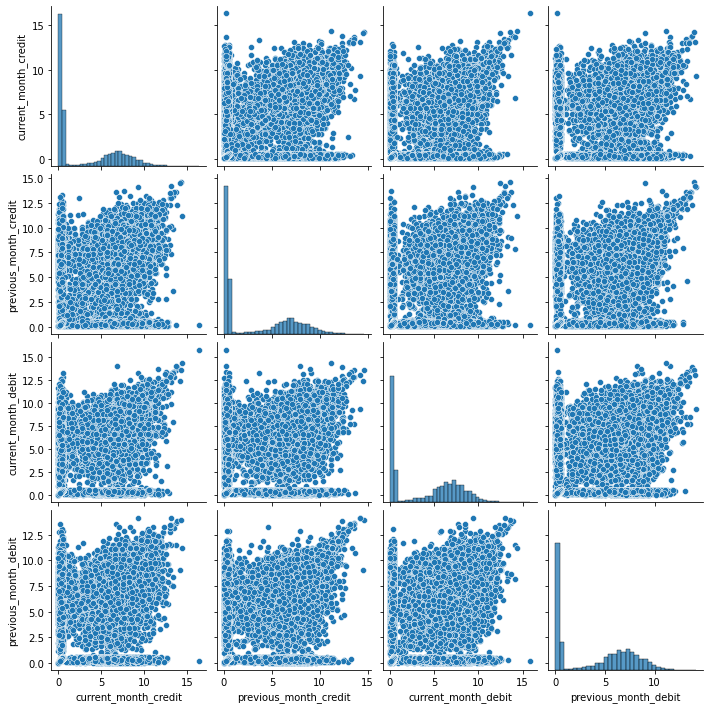

In [46]:
# Removing outliers in the transaction data to better visualise pairplot:
for col in transactions_group:
    min = 1
    if numerical_data[col].min() < 0:
        min = abs(numerical_data[col].min()) + 1
    
    numerical_data[col] = [min+i for i in numerical_data[col]]
    numerical_data[col] = numerical_data[col].apply(lambda x: np.log(x))

    
# Scatter plot of transaction variables after handling outliers:
plt.figure(dpi=140)
sns.pairplot(numerical_data[transactions_group])

**Inference**
1. This validates high correlation between transaction variables
2. This high correlation can be used for feature engineering during the later stages

In [47]:
# # Scatter pair plot for balance variables:
# plt.figure(dpi=140)
# sns_plot2 = sns.pairplot(numerical_data[balances_group])

# # Saving the pair plot:
# sns_plot2.savefig("pairplot_balances.png")
# # Clean parirplot figure from sns:
# plt.clf()
# # Show pairplot as image:
# Image(filename='pairplot_balances.png') 

<Figure size 840x560 with 0 Axes>

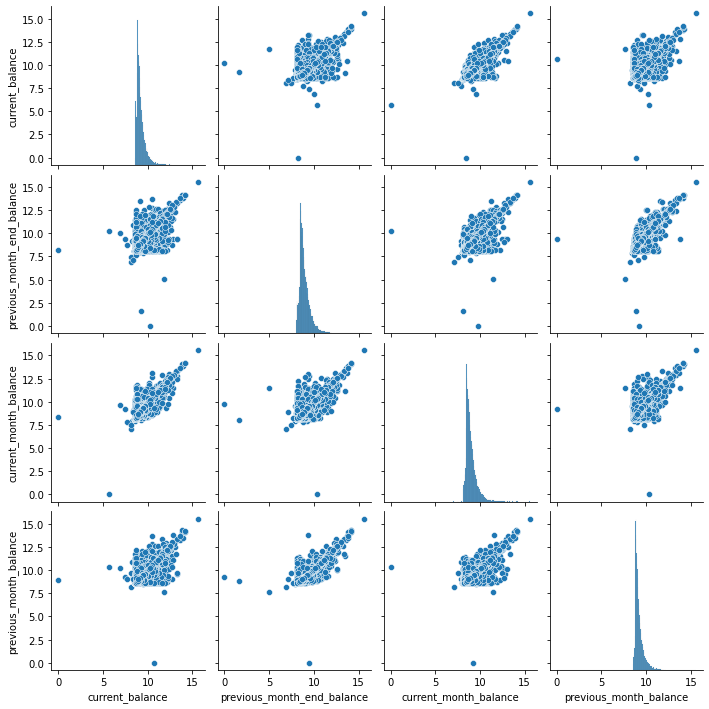

In [48]:
# Removing outliers in the balance data to better visualise pairplot:
for col in balances_group:
    min = 1
    if numerical_data[col].min() < 0:
        min = abs(numerical_data[col].min()) + 1
    
    numerical_data[col] = [min+i for i in numerical_data[col]]
    numerical_data[col] = numerical_data[col].apply(lambda x: np.log(x))

    
# Scatter pair plot for balance variables after handling outliers:
plt.figure(dpi=140)
sns.pairplot(numerical_data[balances_group])

**Inference:**
1. This validates high correlation between balance variables
2. This high correlation can be used for feature engineering in the later stages

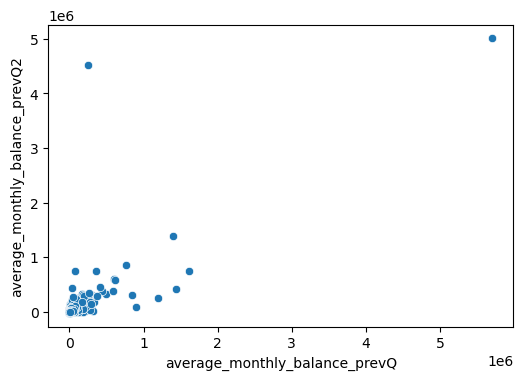

In [49]:
# Scatter plot to visualise patters among previous quarters variables before handling outliers:
plt.figure(dpi=100)
sns.scatterplot(x=numerical_data['average_monthly_balance_prevQ'], y=numerical_data['average_monthly_balance_prevQ2'])

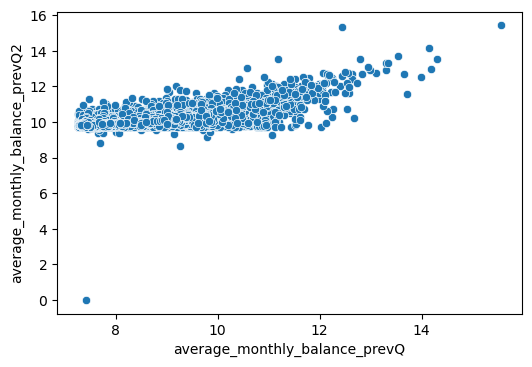

In [50]:
# Removing outliers in the quarters data to better visualise scatter plot:
for col in quarters_group:
    min = 1
    if numerical_data[col].min() < 0:
        min = abs(numerical_data[col].min()) + 1
    
    numerical_data[col] = [min+i for i in numerical_data[col]]
    numerical_data[col] = numerical_data[col].apply(lambda x: np.log(x))

# Scatter plot to visualise patters among previous quarters variables after handling outliers:
plt.figure(dpi=100)
sns.scatterplot(x=numerical_data['average_monthly_balance_prevQ'], y=numerical_data['average_monthly_balance_prevQ2'])

**Inferences:**
1. This validates high correlation between the two previous quarters
2. This high correlation can be used for feature engineering in the later stages

### Bivariate Analysis: Numerical - Categorical variables:

List of Hypothesis and investigation to perform under this combination:
1. Are vintage customers less likely to churn?
2. Are customers with higher average balances less likely to churn?
3. Are customers with dropping monthly balances highly likely to churn?

**Note:** 2-sampled Z-Test and 2-Sampled T-Test are used to compare two independent groups to determine if there is statistical evidence that the associated population means of the two groups are significantly different

In [51]:
# Function to perform Bivariate analysis for numerical-categorical data:
def Bivariate_analysis_num_cat(data, num, cat, target_class):
    # Creating columns of data filtered by the category:
    num_cat1 = data.loc[data[cat] == target_class][num]
    num_cat2 = data.loc[~(data[cat] == target_class)][num]
    
    # Calculating Means of both the independent variables:
    m1, m2 = num_cat1.mean(), num_cat2.mean()
    
    # Calculating P-values of 2-Sampled Z-Test and 2-Sampled T-test:
    _, z_p_value = ztest(num_cat1, num_cat2)
    _,t_p_value = ttest_ind(a=num_cat1, b=num_cat2, equal_var=True)
    
    table = pd.pivot_table(data=data, values=num, columns=cat, aggfunc='mean')
    
    # Printing P-values of both 2-sampled Z-Tests and T-Tests:
    print('P-value of 2-sampled Z-Test: ',round(z_p_value, 2))
    if z_p_value > 0.05:
        print('we fail to reject the Null hypothesis')
    else:
        print('We can safely reject the Null hypothesis')
    
    print('\nP-value of 2-sampled T-Test: ',round(t_p_value,2))
    if t_p_value > 0.05:
        print('We fail to reject the Null hypothesis')
    else:
        print('We can safely reject the Null hypothesis')
    
    # Printing category wise means of the numerical variables:
    print('\n')
    print(table)
    
    # Bar plot of num-cat variables:
    plt.figure(figsize=(15,6), dpi=140)
    
    plt.subplot(1,2,1)
    axy = sns.barplot(x=list(data[cat].unique()), y=[m2,m1])
    for p in axy.patches:
        axy.annotate('{:1.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=15)
    plt.xlabel('{} - category'.format(cat))
    plt.ylabel('{} - numerical'.format(num))
    plt.title('Bar plot - Num-Cat')
    
    # Box plot of num-cat variables:
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=num, data=data)
    plt.xlabel('{} - category'.format(cat))
    plt.ylabel('{} - numerical'.format(num))
    plt.title('Box plot - Num-Cat')
    
    plt.show()

Q1. Are vintage customers less likely to churn?

* H0: Vintage customers are more likely to churn
* H1: Vintage customers are less likely to churn

P-value of 2-sampled Z-Test:  0.0
We can safely reject the Null hypothesis

P-value of 2-sampled T-Test:  0.0
We can safely reject the Null hypothesis


churn             0            1
vintage  2413.97418  2146.138023


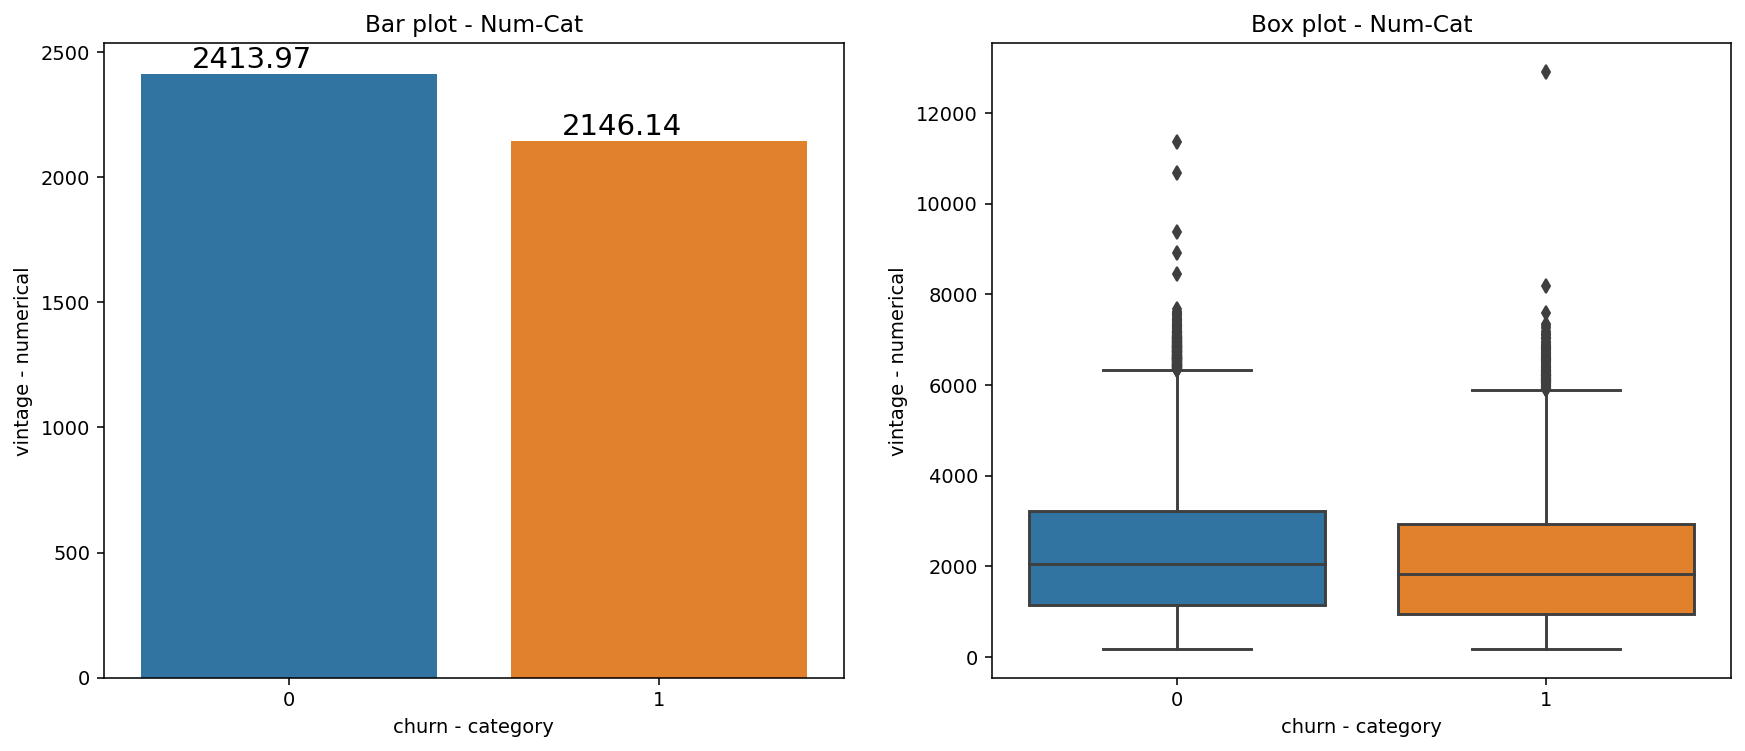

In [52]:
Bivariate_analysis_num_cat(churn_data_eda, 'vintage', 'churn', 1)

**Inference**
1. Vintage customers churn less and the results are statistically significantly as observed from the P-value (0.0) which is less than 0.05
2. We can safely reject the null hypothesis that the vintage customers are more likely to churn

Q2. Are customers with high average monthly balance in the previous quarters are more likely to churn?

* H0: Customers with high average monthly balance in the previous quarters are not likely to churn
* H1: Customers with high average monthly balance in the previous quarters are more likely to churn

P-value of 2-sampled Z-Test:  0.04
We can safely reject the Null hypothesis

P-value of 2-sampled T-Test:  0.04
We can safely reject the Null hypothesis


churn                                    0            1
average_monthly_balance_prevQ  7258.754771  8543.094684


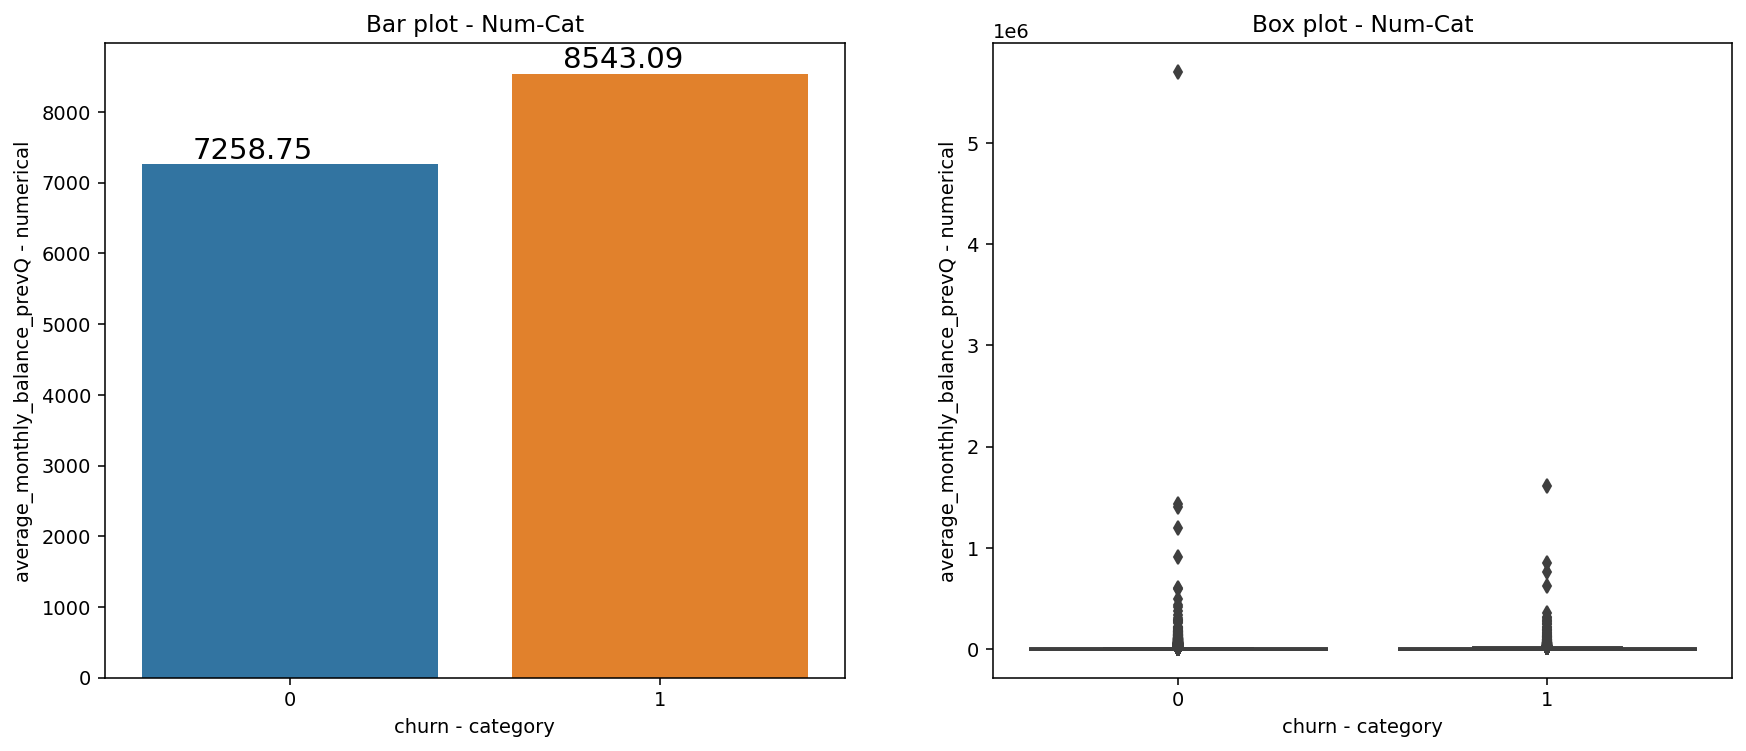

P-value of 2-sampled Z-Test:  0.0
We can safely reject the Null hypothesis

P-value of 2-sampled T-Test:  0.0
We can safely reject the Null hypothesis


churn                                     0            1
average_monthly_balance_prevQ2  6733.519801  8841.608291


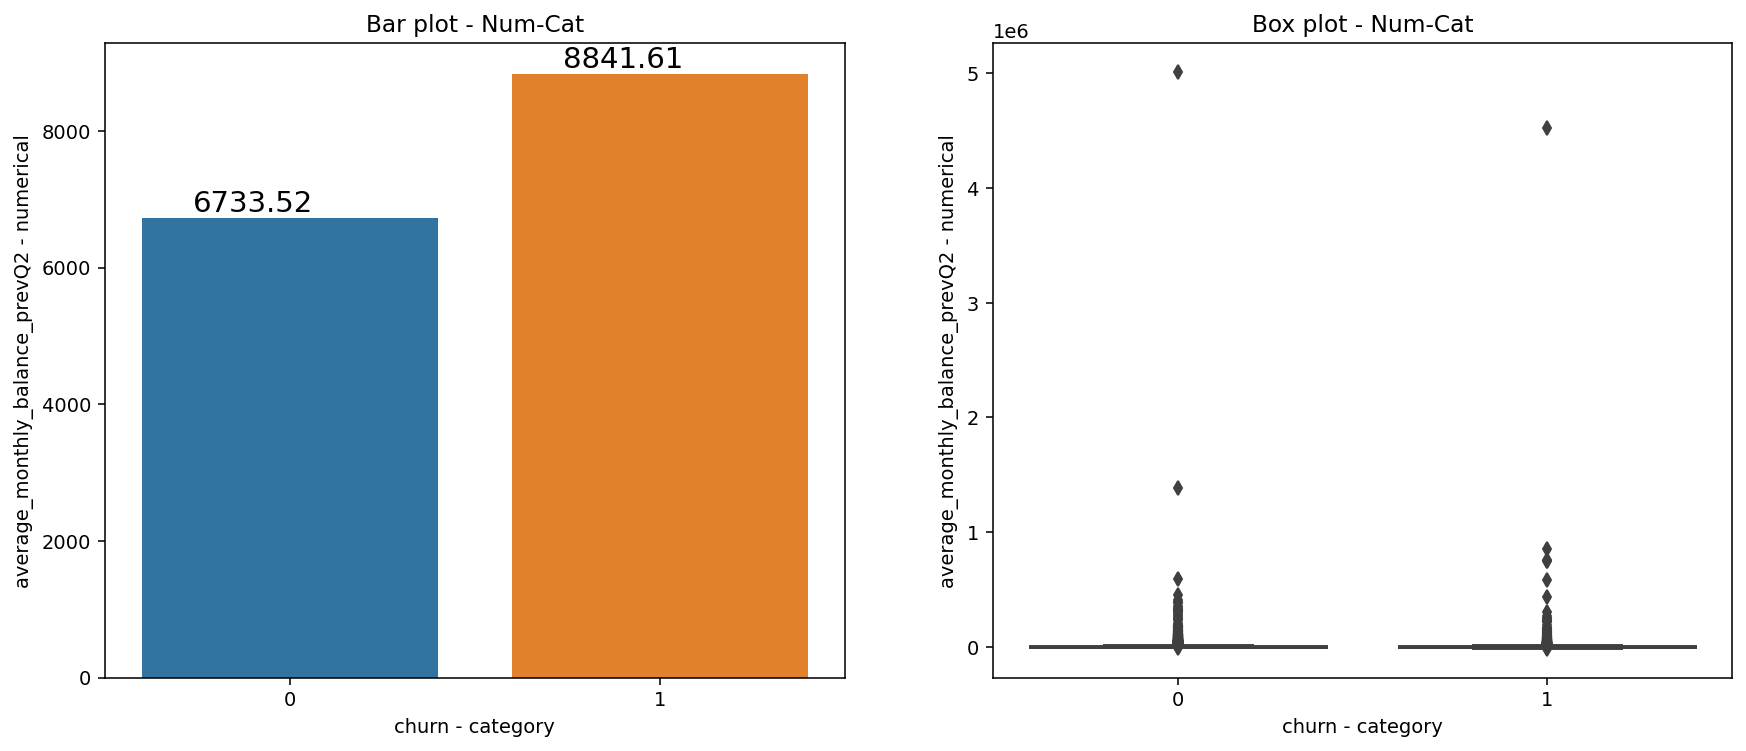

In [53]:
Bivariate_analysis_num_cat(churn_data_eda, 'average_monthly_balance_prevQ', 'churn', 1)
Bivariate_analysis_num_cat(churn_data_eda, 'average_monthly_balance_prevQ2', 'churn', 1)

**Inferences**
1. Customers with high average monthly balance in the previous quarters are more likely to churn and the results are statistically different as observed from the P-values (0.04,0.0) which are less than 0.05
2. Hence, we can safely reject the null hypothesis that the customers with high average quarterly balances are not/less likely to churn

Q3. Are customers with low monthly balances are more likely to churn?

* H0: Customers with low monthly balances are not/less likely to churn
* H1: Customers with low monthly balances are more likely to churn

P-value of 2-sampled Z-Test:  0.28
we fail to reject the Null hypothesis

P-value of 2-sampled T-Test:  0.28
We fail to reject the Null hypothesis


churn                            0            1
current_month_balance  7579.267826  6887.874426


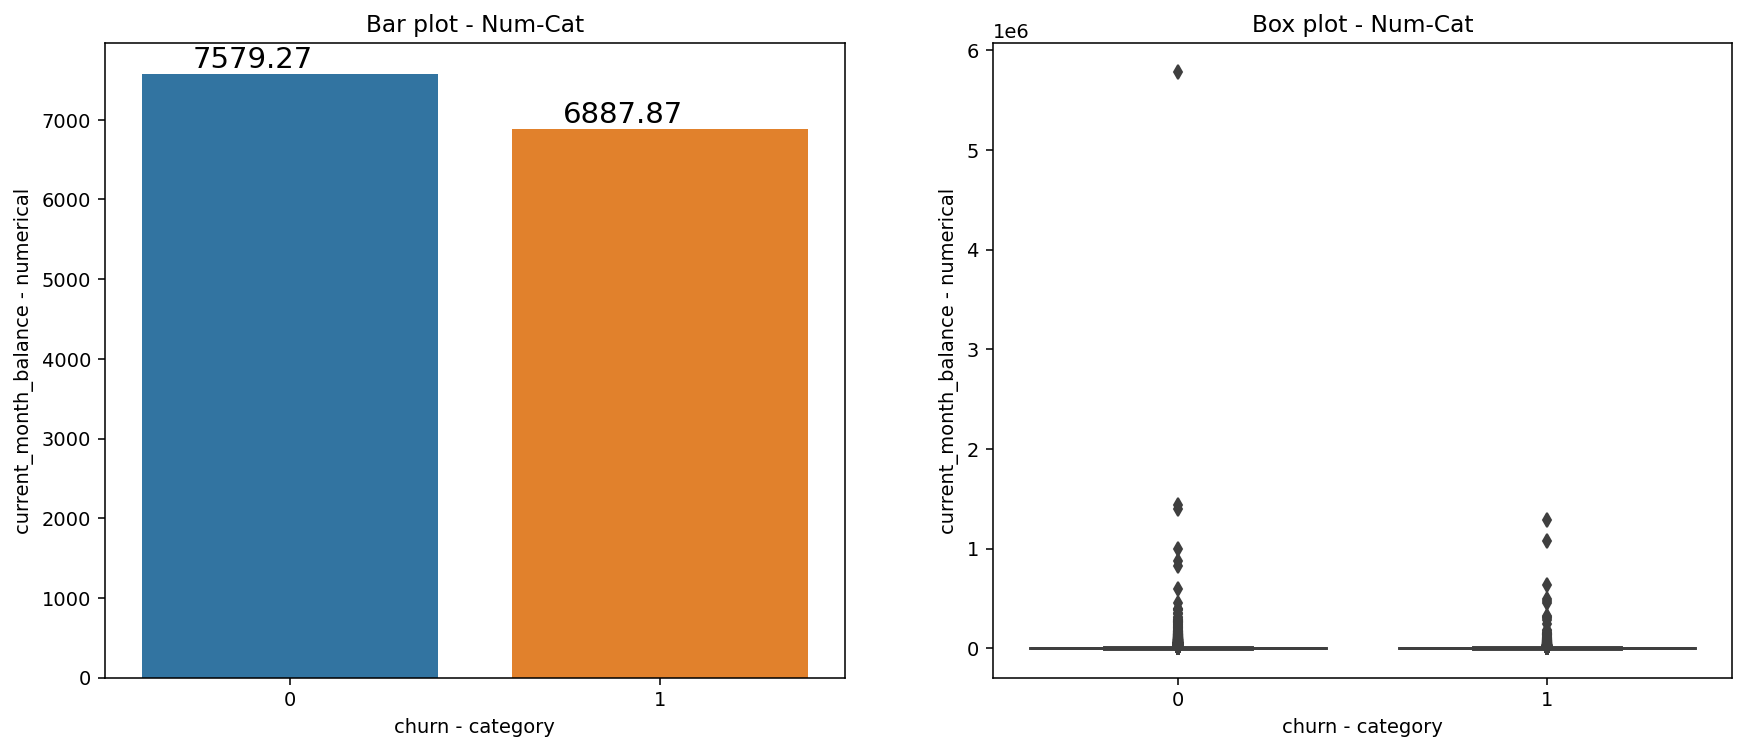

P-value of 2-sampled Z-Test:  0.01
We can safely reject the Null hypothesis

P-value of 2-sampled T-Test:  0.01
We can safely reject the Null hypothesis


churn                             0            1
previous_month_balance  7199.844836  8793.403987


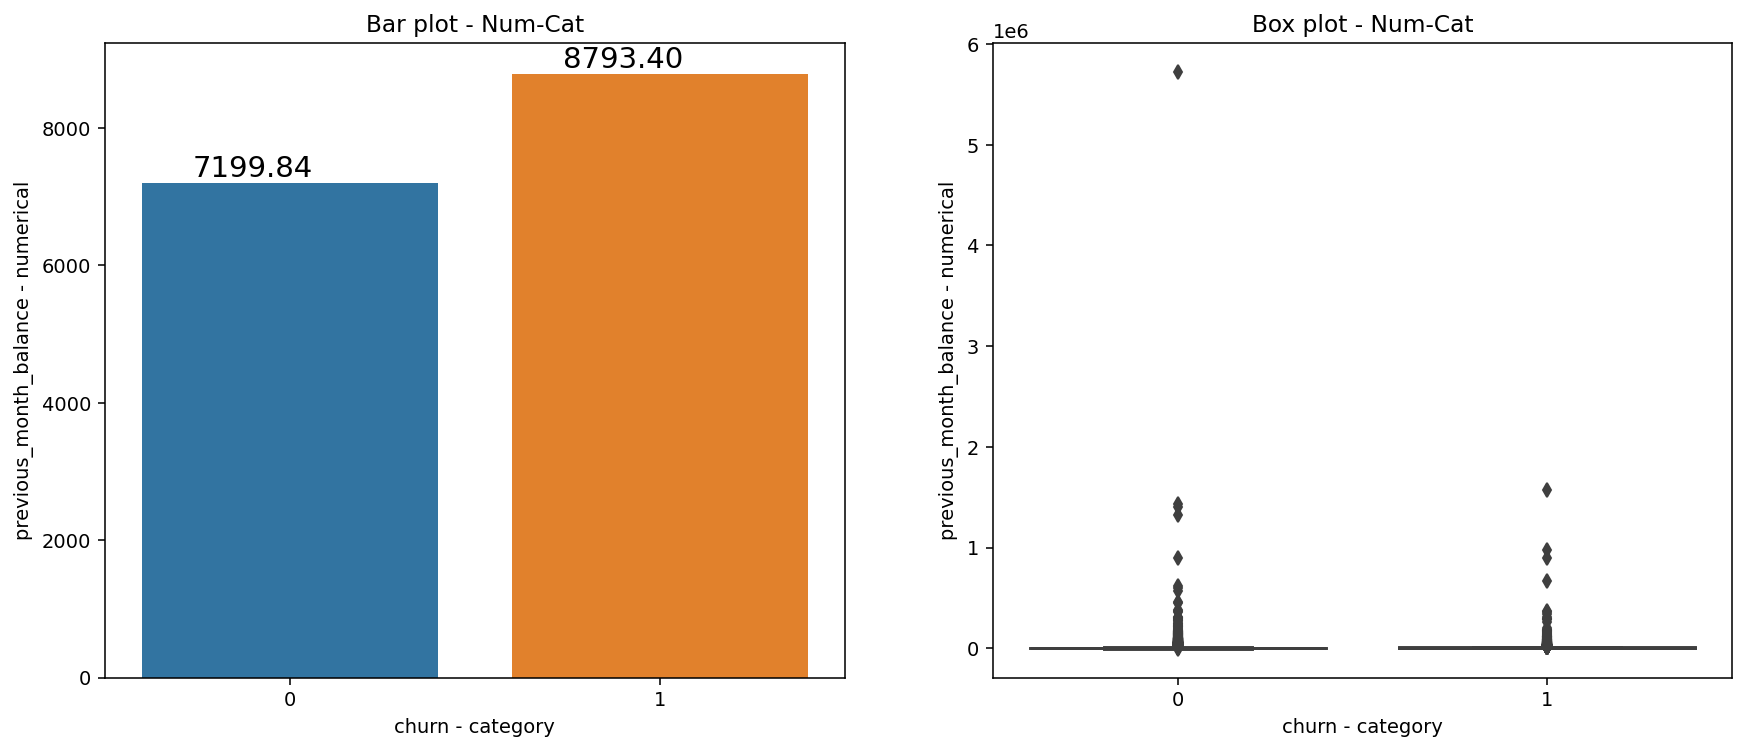

In [54]:
Bivariate_analysis_num_cat(churn_data_eda,'current_month_balance', 'churn', 1)
Bivariate_analysis_num_cat(churn_data_eda, 'previous_month_balance', 'churn', 1)

**Inference**
1. Customers who are churning have low current month balance but the results are not statistically significant as the P-value (0.28) is more than 0.05
2. Customers who are churning have high previous month balance and the results are statistically significant as the P-value (0.01) is less than 0.05
3. Hence we fail to reject null hypothesis

Q4. Are customers with dropping monthly balances from previous months are highly likely to churn?
  * H0: Customers with dropping monthly balances are not/less likely to churn
  * H1: Customers with dropping monthly balances are more likely to churn

P-value of 2-sampled Z-Test:  0.0
We can safely reject the Null hypothesis

P-value of 2-sampled T-Test:  0.0
We can safely reject the Null hypothesis


churn                 0            1
diff_balance  379.42299 -1905.529561


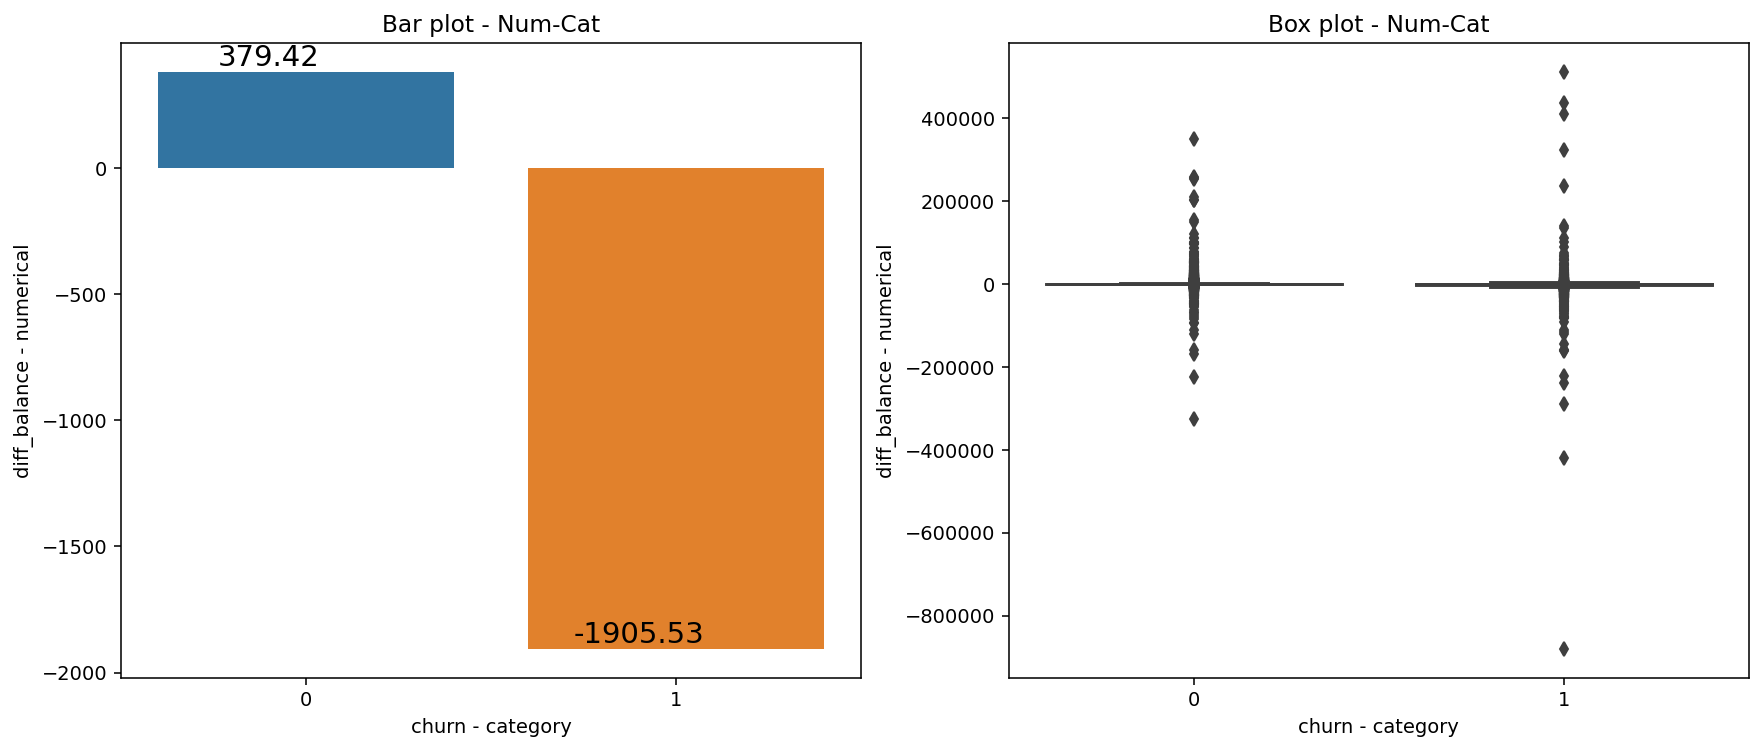

In [55]:
# Extracting difference in balances from current month to the previous month:
dropping_balance = churn_data_eda[['churn','current_month_balance', 'previous_month_balance']]
dropping_balance['diff_balance'] = dropping_balance['current_month_balance'] - dropping_balance['previous_month_balance']

# Bivariate analysis of the churn to the dropping monthly balances:
Bivariate_analysis_num_cat(dropping_balance, 'diff_balance', 'churn', 1)

**Inferences** 
1. The P-value (0) is less than 0.05 and is statistically significant, hence we can reject the null hypothesis
2. we accept that the customers who have significant drop in the monthly balances are more likely to churn

### Bivariate Analysis: Categorical - Categorical variables:

##### List of Hypotheses to check under this cat-cat bivariate analysis
1. Are females less likely to churn than males?
2. Are young customers more likely to churn?
3. Are customers in the lower income bracket are more likely to churn
4. Are customers with dependents less likely to churn?
5. Customers with average family size less than 4 are more likely to churn?
6. Customers whose last transaction was more than 6 months ago are more likely to churn?
7. Do cities and branch codes with very few accounts more likely to churn?

In [56]:
# Chi-Squared test: Measures the difference between the expected and observed and based on P-value tells us if the difference is significant or not
# We check if the difference between the ratios of the categories interms of churning and not churning is significant or not
# For example, the ratio of young customers who churn and not churn is different from the ratio of very old customers who churn and not churn. 
# So, the difference in ratios among both of them is significant or not is determined based on the p-value of chi-squared test

In [57]:
# Function to perform Bivariate analysis of categorical - categorical variables:
def Bivariate_analysis_cat_cat(df, cat, target):
    
    # Taking copy of the data with required categorical and target variables:
    df1 = df[[cat,target]]
    
    # Creating the cross tab table:
    cross_tab_table = pd.crosstab(df1[cat], df1[target])
    
    # Performing chi-squared hypothesis test:
    chi, p_val, dof, excepted = chi2_contingency(cross_tab_table)
    
    # Checking the significance based on the p-value:
    if p_val < 0.05:
        significance = True
    else:
        significance = False
    
    # Plotting the countplot and displaying the P-value and if the difference is significant or not based on the P-value:
    plt.figure(figsize=(10,6))
    sns.countplot(df1, x=cat, hue=target)
    plt.title('P-value: {}\n Difference significant? = {}\n'.format(round(p_val,8), significance))
    
    # Calculating the percentages cross tab table:
    cross_tab_percentages_table = pd.crosstab(df1[cat], df1[target], normalize='index')
    
    # Plotting the percentage stacked barplot:
    plt.figure(figsize=(10,6), dpi=100)
    cross_tab_percentages_table.plot(kind='bar', stacked=True, title=str(cross_tab_percentages_table), figsize=(10,6))

Q1. Are females less likely to churn than males?

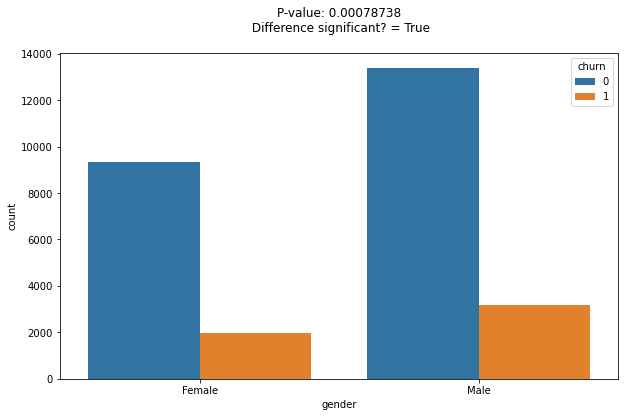

<Figure size 1000x600 with 0 Axes>

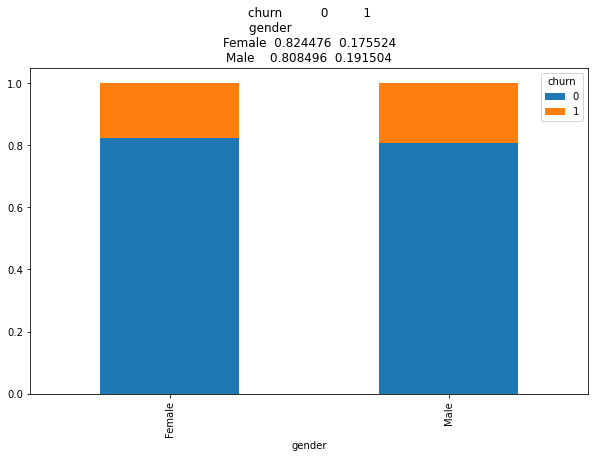

In [58]:
# Dataframe containing only gender and churn categories for bivariate categorical - categorical analysis:
gender_df_cat_cat = churn_data_eda[['gender','churn']]

# Function call to perform bivariate analysis on 2 categorical variables:
Bivariate_analysis_cat_cat(gender_df_cat_cat, 'gender', 'churn')

**Inference:** 
 * From the percentage stacked plot title we can see that females are less likely to churn than males
 * The difference between churning of males and females is significant as observed from the P-value (0.0007) which is less than 0.05

Q2. Are young customers more likely to churn?

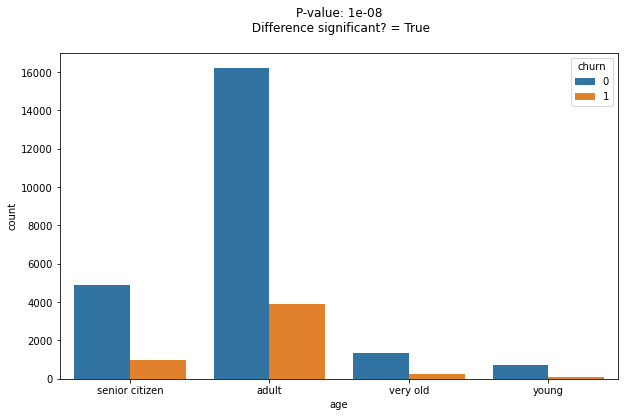

<Figure size 1000x600 with 0 Axes>

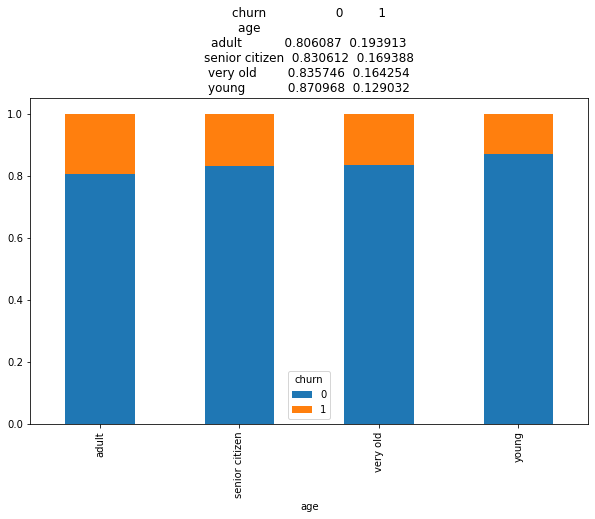

In [59]:
# Creating a dataframe containing only Age (categorical) and churn variables for bivariate cat-cat analysis:
age_df_cat_cat = churn_data_eda[['age','churn']]

# Function to convert age from numercial to categorical:
def age_categorical(x):
    if x >= 80:
        return 'very old'
    elif x >=60 and x<80:
        return 'senior citizen'
    elif x >= 18 and x<60:
        return 'adult'
    else:
        return 'young'

# Coverting Age from numerical to categorical:
age_df_cat_cat['age'] = age_df_cat_cat['age'].apply(lambda x: age_categorical(x))

# Function call to perform bivariate analysis on age and churn independent variables:
Bivariate_analysis_cat_cat(age_df_cat_cat, 'age', 'churn')

**Inference:**
 * customers whose age group is between 18 and 59 (adults) have churn more than any other age groups
 * The difference in churning between different age groups is statistically significant as observed from the P-value (0.00000008) which is less than 0.05

Q.3 Customers from low income bracket are more likely to churn

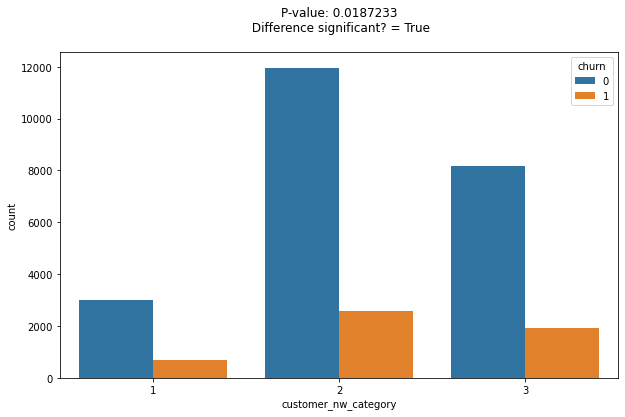

<Figure size 1000x600 with 0 Axes>

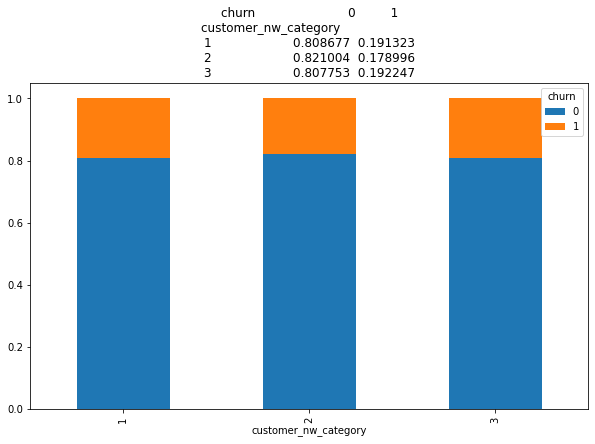

In [60]:
Bivariate_analysis_cat_cat(churn_data_eda, 'customer_nw_category', 'churn')

**Inference:**
 * customers with in both low income and high income categories churn more than the customers in medium income category
 * The difference in churning between different income categories is statistically significant as observed from the P-value (0.018) which is less than 0.05

Q.4,5 Are customers with dependents less likely to churn? 

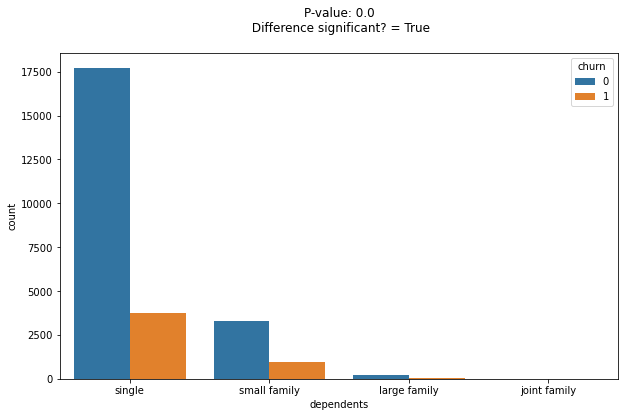

<Figure size 1000x600 with 0 Axes>

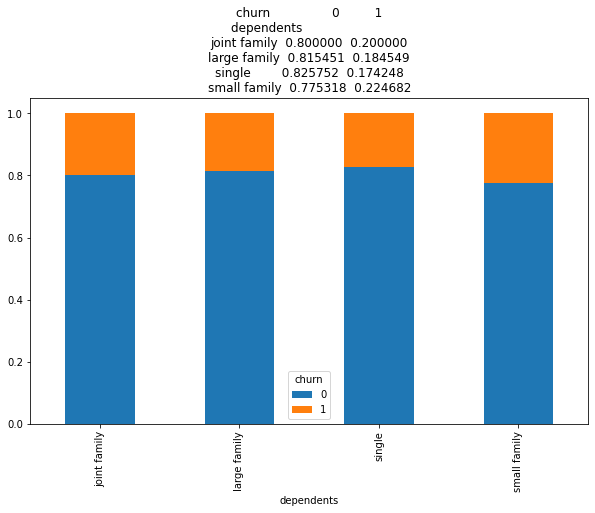

In [61]:
dependents_df_cat_cat = churn_data_eda[['dependents','churn']]
dependents_df_cat_cat = dependents_df_cat_cat.dropna()

def dependents_categorical(x):
    if x == 0:
        return 'single'
    elif x>=1 and x<=3:
        return 'small family'
    elif x>3 and x<=9:
        return 'large family'
    else:
        return 'joint family'

dependents_df_cat_cat['dependents'] = dependents_df_cat_cat['dependents'].apply(lambda x: dependents_categorical(x))

Bivariate_analysis_cat_cat(dependents_df_cat_cat, 'dependents', 'churn')

**Inference:**
 * customers without any dependents (single) are less likely to churn
 * The difference in churning between different sizes of families is statistically significant as observed from the P-value (0.0) which is less than 0.05

Q.6 Do customers whose last transaction was more than 6 months ago have high churn rate?

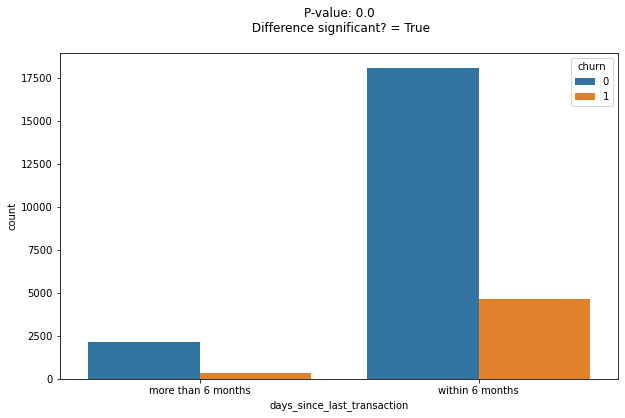

<Figure size 1000x600 with 0 Axes>

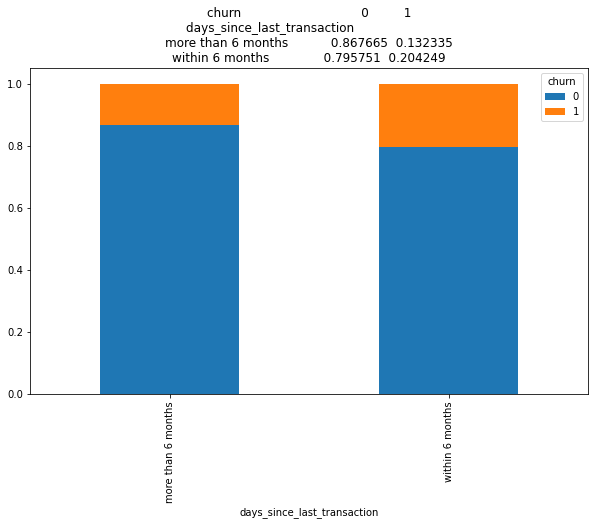

In [62]:
last_transaction_cat_cat = churn_data_eda[['days_since_last_transaction','churn']]
last_transaction_cat_cat = last_transaction_cat_cat.dropna()

last_transaction_cat_cat['days_since_last_transaction'] = last_transaction_cat_cat['days_since_last_transaction'].apply(lambda x: 'more than 6 months' if int(x/30) > 6 else 'within 6 months')

Bivariate_analysis_cat_cat(last_transaction_cat_cat, 'days_since_last_transaction', 'churn')

**Inference:**
 * customers whose last transaction was within 6 months churned more compared to the customers who made their last transaction more than 6 months ago
 * The difference in churning between different periods for the last transaction is statistically significant as observed from the P-value (0.0) which is less than 0.05

Q7. Cities with very few accounts (<1%) may lead to churning

In [63]:
# Getting the list of city codes which have less than 1% (280) of accounts:
less_popular_city_codes = churn_data_eda['city'].value_counts()
less_popular_city_codes = less_popular_city_codes[less_popular_city_codes < 280].index
print(f'Total of {len(less_popular_city_codes)} cities have less than 1% of the accounts')

# Dropping missing values:
cities_popularity = churn_data_eda[['city','churn']].dropna()

# Creating a new categorical column marking each city code as low/high accounts:
cities_popularity.loc[cities_popularity['city'].isin(less_popular_city_codes), 'city_low_high'] = 'Low accounts'
cities_popularity.loc[~(cities_popularity['city'].isin(less_popular_city_codes)), 'city_low_high'] = 'High accounts'
cities_popularity

Total of 1588 cities have less than 1% of the accounts


city churn  city_low_high
0       187.0     0   Low accounts
2       146.0     0  High accounts
3      1020.0     1  High accounts
4      1494.0     1  High accounts
5      1096.0     0  High accounts
...       ...   ...            ...
28377  1020.0     0  High accounts
28378  1046.0     0   Low accounts
28379  1096.0     1  High accounts
28380  1219.0     0   Low accounts
28381  1232.0     1  High accounts

[27579 rows x 3 columns]

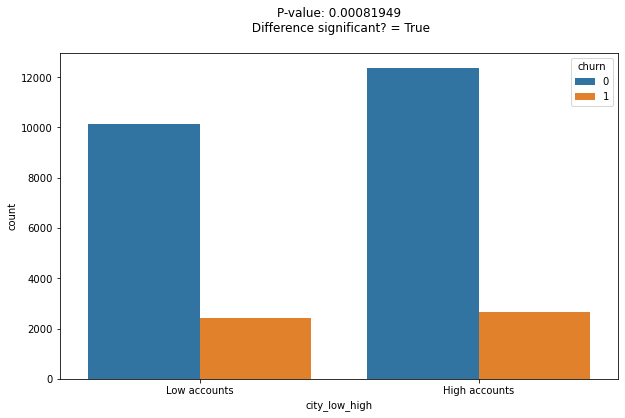

<Figure size 1000x600 with 0 Axes>

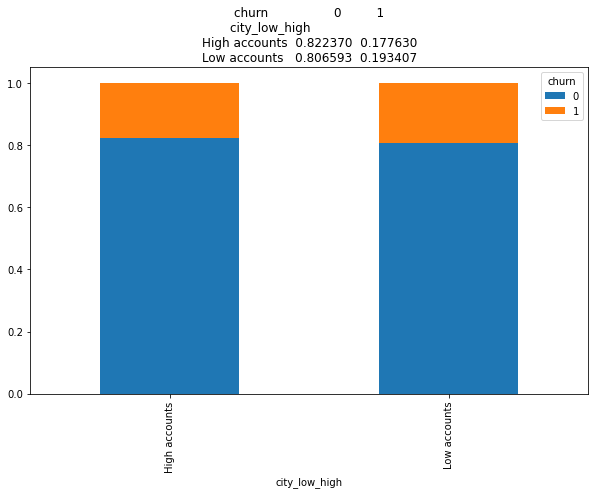

In [64]:
# Function call to perform bivariate analysis of 2 categorical variables:
Bivariate_analysis_cat_cat(cities_popularity, 'city_low_high', 'churn')

**Inference:**
 * customers who have accounts in the cities containing low accounts churn more compared to the customers who have accounts in the popular cities (cities with high no.of accounts)
 * The difference in churning between customer accounts belonging to less popular cities and high popular cities is statistically significant as observed from the P-value (0.00081) which is less than 0.05

Q7. Branch codes having very few accounts (<0.5% of the total) may lead to churning?

In [65]:
# Getting the list of branch codes which have less than 0.5% (141) of all the accounts:
temp_val = int((0.5/100) * churn_data_eda['branch_code'].shape[0])
less_popular_branch_codes  = churn_data_eda['branch_code'].value_counts()
less_popular_branch_codes = less_popular_branch_codes[less_popular_branch_codes < temp_val].index

# Taking a copy of the data by dropping missing values:
branch_codes_df_cat_cat = churn_data_eda[['branch_code','churn']].dropna()

# Creating a new categorical column that indicates low/high accounts:
branch_codes_df_cat_cat.loc[branch_codes_df_cat_cat['branch_code'].isin(less_popular_branch_codes), 'branch_code_low_high'] = 'Low accounts'
branch_codes_df_cat_cat.loc[~(branch_codes_df_cat_cat['branch_code'].isin(less_popular_branch_codes)), 'branch_code_low_high'] = 'High accounts'

branch_codes_df_cat_cat

branch_code churn branch_code_low_high
0             755     0         Low accounts
1            3214     0         Low accounts
2              41     0         Low accounts
3             582     1         Low accounts
4             388     1         Low accounts
...           ...   ...                  ...
28377        1207     0         Low accounts
28378         223     0         Low accounts
28379         588     1         Low accounts
28380         274     0         Low accounts
28381         474     1         Low accounts

[28382 rows x 3 columns]

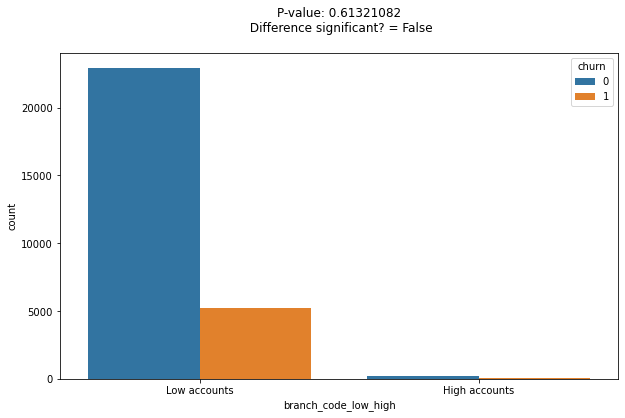

<Figure size 1000x600 with 0 Axes>

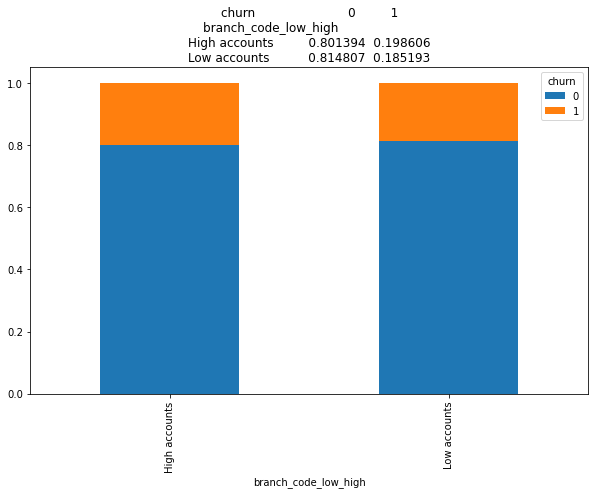

In [66]:
# Function call to perform Bivariate analysis of 2 categorical variables:
Bivariate_analysis_cat_cat(branch_codes_df_cat_cat, 'branch_code_low_high', 'churn')

**Inference:**
 * The difference in churning between customer accounts belonging to less popular branch codes and high popular branch codes is **Not statistically** significant as observed from the P-value (0.613) which is more than 0.05

### Missing values analysis:
* **Hypotheses**:
  * Do missing values in Gender churn more?
  * Do missing values in dependents churn more?
  * Do missing values in occupation churn more?

Q1. Do missing values in Gender churn more?

In [67]:
# Taking a copy of the data:
gender_missing_df = churn_data_eda[['gender','churn']]

# Creating a new categorical column which tells if the gender column value is missing or not:
gender_missing_df.loc[gender_missing_df['gender'].isna(), 'missing_gender'] = 'Missing value'
gender_missing_df.loc[~(gender_missing_df['gender'].isna()), 'missing_gender'] = 'Not-missing value'

gender_missing_df

gender churn     missing_gender
0        Male     0  Not-missing value
1        Male     0  Not-missing value
2        Male     0  Not-missing value
3         NaN     1      Missing value
4        Male     1  Not-missing value
...       ...   ...                ...
28377  Female     0  Not-missing value
28378  Female     0  Not-missing value
28379    Male     1  Not-missing value
28380    Male     0  Not-missing value
28381    Male     1  Not-missing value

[28382 rows x 3 columns]

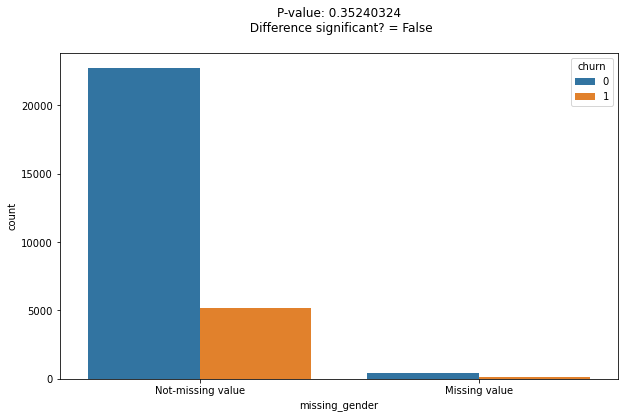

<Figure size 1000x600 with 0 Axes>

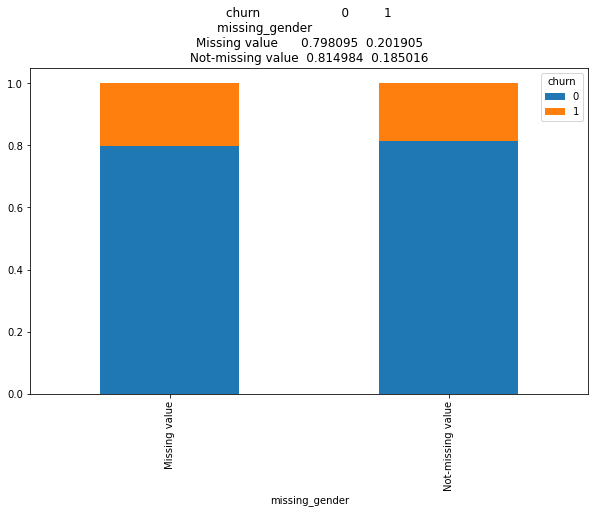

In [68]:
# Function call to perform bivariate on 2 categorical variables:
Bivariate_analysis_cat_cat(gender_missing_df, 'missing_gender', 'churn')

**Inference:**
* Missing values in gender does not have any significant different behaviour with respect to churning
* The difference is **Not statistically significant** as observed from the P-value (0.352) which is more than 0.05

Q2. Do missing values in Dependents churn more?

In [69]:
# Taking a copy of the data:
dependents_missing_df = churn_data_eda[['dependents','churn']]

# Creating a new categorical column which indicates missing values:
dependents_missing_df.loc[dependents_missing_df['dependents'].isna(), 'missing_dependents'] = 'Missing_value'
dependents_missing_df.loc[~(dependents_missing_df['dependents'].isna()), 'missing_dependents'] = 'Not-missing_value'

dependents_missing_df

dependents churn missing_dependents
0             0.0     0  Not-missing_value
1             0.0     0  Not-missing_value
2             0.0     0  Not-missing_value
3             NaN     1      Missing_value
4             2.0     1  Not-missing_value
...           ...   ...                ...
28377         0.0     0  Not-missing_value
28378         0.0     0  Not-missing_value
28379         0.0     1  Not-missing_value
28380         3.0     0  Not-missing_value
28381         0.0     1  Not-missing_value

[28382 rows x 3 columns]

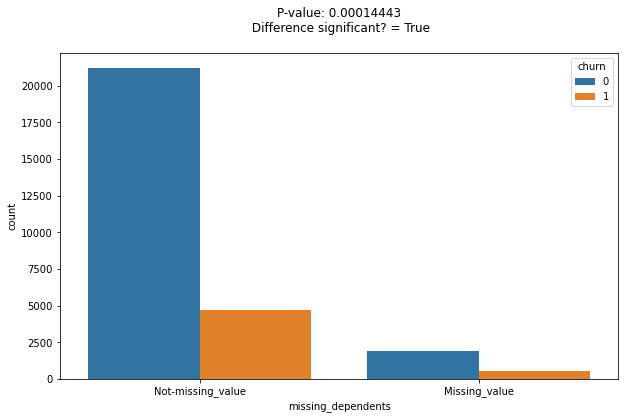

<Figure size 1000x600 with 0 Axes>

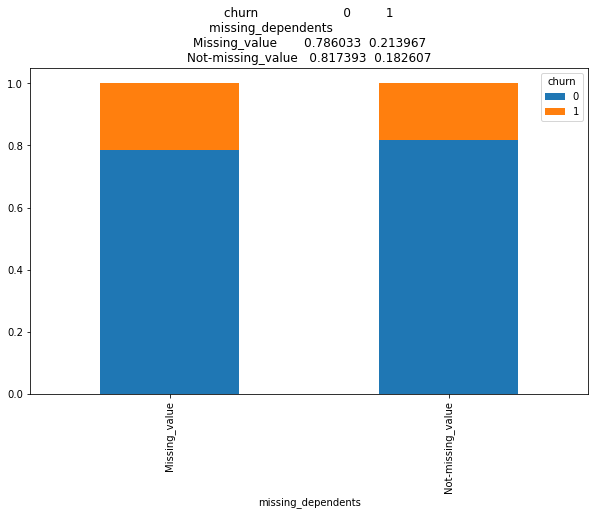

In [70]:
Bivariate_analysis_cat_cat(dependents_missing_df,'missing_dependents','churn')

**Inference:**
 * Missing values in the dependents column have significantly different churn rates
 * The difference is **Statistically significant** as observed by the P-value(0.00014) which is less than 0.05

Q3. Do missing values in Occupation churn more?

In [71]:
# Taking a copy of the data:
occupation_df_cat_cat = churn_data_eda[['occupation','churn']]

# Creating a new categorical column which indicates missing values:
occupation_df_cat_cat.loc[occupation_df_cat_cat['occupation'].isna(), 'occupation_missing'] = 'Missing_value'
occupation_df_cat_cat.loc[~(occupation_df_cat_cat['occupation'].isna()), 'occupation_missing'] = 'Not-missing_value'

occupation_df_cat_cat

occupation churn occupation_missing
0      self_employed     0  Not-missing_value
1      self_employed     0  Not-missing_value
2           salaried     0  Not-missing_value
3      self_employed     1  Not-missing_value
4      self_employed     1  Not-missing_value
...              ...   ...                ...
28377        student     0  Not-missing_value
28378  self_employed     0  Not-missing_value
28379       salaried     1  Not-missing_value
28380  self_employed     0  Not-missing_value
28381        student     1  Not-missing_value

[28382 rows x 3 columns]

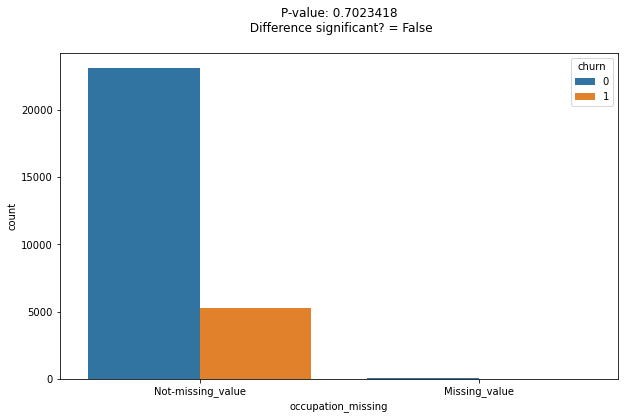

<Figure size 1000x600 with 0 Axes>

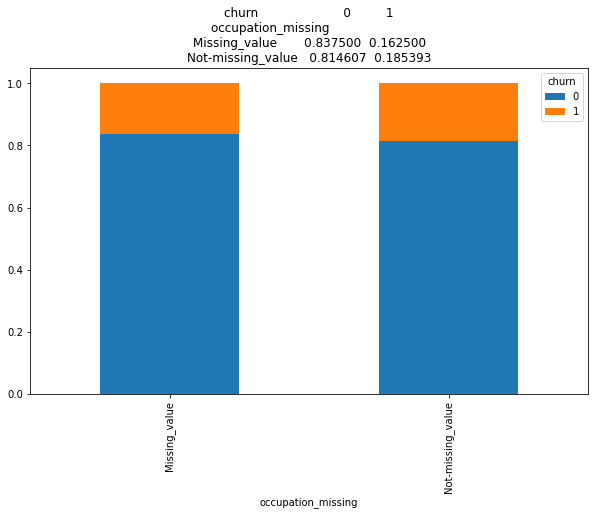

In [72]:
Bivariate_analysis_cat_cat(occupation_df_cat_cat, 'occupation_missing','churn')

**Inference:**
 * Missing values in Occupation field does not have any significant impact on the churn rate
 * The difference is **Not statistically significant** as observed from the P-value (0.702) which is more than 0.05

### Multivariate Analysis:

#### Pivot Table:
* Pivot tables allow us to analyse granular details about multiple features of the data (3-4 categorical variables)

In [73]:
# Converting the churn variable into integer as it is used in the pivot table:
churn_data_eda['churn'] = churn_data_eda['churn'].astype('int64')

##### # Analysis of relationship between gender, occupation and cutomer_networth_category with churn

In [74]:
# Count of people who churn:
display(churn_data_eda.pivot_table(index = ['gender','occupation'], columns = 'customer_nw_category', values = 'churn', aggfunc = 'sum'))

# Percentage of people who churn:
display(churn_data_eda.pivot_table(index=['gender','occupation'], columns='customer_nw_category', values='churn', aggfunc='mean')*100)

customer_nw_category    1    2    3
gender occupation                  
Female company          1    0    2
       retired         12   23   17
       salaried        51  128  124
       self_employed  211  761  512
       student         18   79   43
Male   company          0    0    0
       retired         32  120  101
       salaried        92  395  357
       self_employed  237  942  700
       student         28   95   61

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

**Inferences:**
  * Customers who churned the highest (942) are **Males** who are **self-employed** and belong to the customer net worth category **2**
  * Going by percentages, customers with highest churn rate are **Males** who are **self-employed** and belong to the customer net worth category **1**
  * In all cases of the customer net worth category, **self-employed males** have the highest churn rate. 
  * Further investigation needs to be done if the **self-employed male** customers are actually churning more 

##### # Analysis of relationship between Gender, Occupation and Age with respect to Churn

In [75]:
# Splitting the age variable into categories:
Age = pd.cut(churn_data_eda['age'], [0,25,50,100])

# Count of customers who churn:
display(churn_data_eda.pivot_table(index=['gender', Age], columns='occupation', values='churn', aggfunc='sum'))

# Percentage of customers who churn:
display(churn_data_eda.pivot_table(index=['gender', Age], columns='occupation', values='churn', aggfunc='mean')*100)

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

occupation        company    retired   salaried  self_employed    student
gender age                                                               
Female (0, 25]        NaN        NaN  15.909091      21.774194  13.421053
       (25, 50]      50.0   0.000000  16.096866      19.163293  15.510204
       (50, 100]     50.0  13.541667  17.948718      17.370083   0.000000
Male   (0, 25]        0.0        NaN  20.987654      30.327869  16.545894
       (25, 50]       0.0  14.285714  17.349769      21.886121  21.076233
       (50, 100]      0.0  15.493827  17.165150      19.340538   0.000000

**Inferences:**
 * **Male self-employed** customers who are in the age group of **25-50** have the highest churning numbers (1107) among all the customers
 * Similiarly **Female self-employed** customers who are in the age group of **25-50** have the highest churning numbers (852) among the female customers
 * Proportions wise **Male** customers who are **self-employed and students** have the highest churn rate
 * Followed by **Male** customers who **salaried** and in the age group of **0-25** have high churn rate
 * **Self-employed male** customers are churning more than any other combination of categories

##### # Analysis of Gender, Occupation, Age and Current balance with respect to Churn status

In [76]:
# Splitting the Current balance variable into 3 quartiles (categories):
curr_balance = pd.qcut(churn_data_eda['current_balance'],3)

# Count of customers who are churning:
display(churn_data_eda.pivot_table(index=['gender', Age], columns=[curr_balance, 'occupation'], values='churn', aggfunc='sum'))

# Percentage of customers who are churning:
display(churn_data_eda.pivot_table(index=['gender', Age], columns=[curr_balance, 'occupation'], values='churn', aggfunc='mean')*100)

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 100]                     1      34       45           353       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 100]                     0     156      150           364       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 100]                    0       8       14           125       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 100]                    0      39       52           143       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 100]                      0      10       11           127       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 100]                      0      56       62           191       0

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

**Inferences:**
 * Customers who have low current balance (first quantile) are churning more
 * In first quantile of current balance for the self-employed profession as the age increases the churn rate decreases
 * Young Male self-employed customers are churning significantly more than young female self-employed customers in the first quantile of the current balance

#### Grouped Boxplot:
* Grouped box plot is used to analyse 2 categorical variables and 1 numerical variable using hue parameter we can seperate the categories (2 categorical and 1 numerical variables)


In [95]:
# Function to plot Grouped boxplot of 2 categorical and 1 numerical variables:
def grouped_box_plot(df, num_var, cat_var1, cat_var2):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=cat_var1, y=num_var, hue=cat_var2, orient='v')
    plt.title(f'Grouped Boxplot - {num_var.capitalize()}, {cat_var1.capitalize()}, {cat_var2.capitalize()}')
    plt.show()

##### # Analysis of Age and Occupation variables with respect to Churn

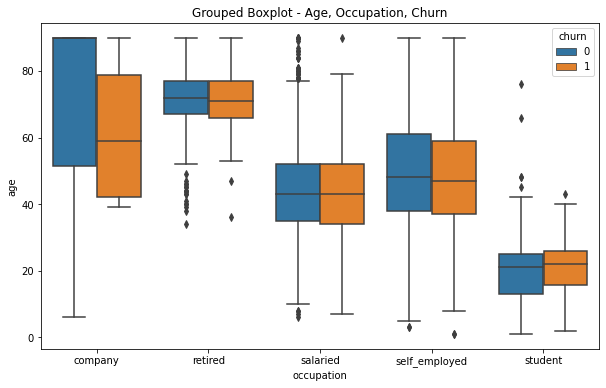

In [92]:
grouped_box_plot(churn_data_eda, 'age', 'occupation', 'churn')

**Inferences:**
* Self-employed customers who are churning are slightly younger than non-churning customers
* Customers in the retired profession have a lot of outliers which indicate that customers who retire early (young) are not churning
* Students who are churning are slightly older than the students who are not churning

##### # Analysing Vintage and Gender variables with respect to Churn

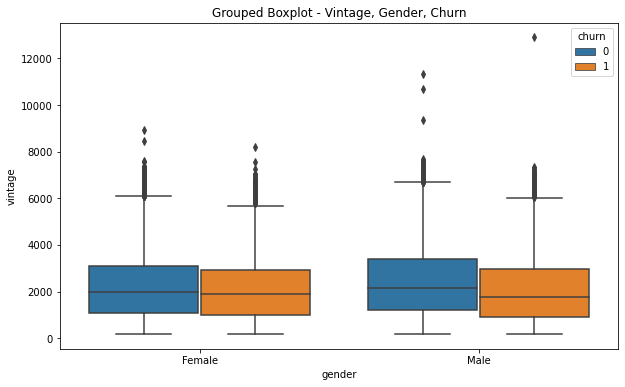

In [97]:
grouped_box_plot(churn_data_eda, 'vintage','gender','churn')

**Inferences:**
* Customers of both the genders who are not churning have been with the bank for a longer time
* There are no major differences in the vintage feature for genderwise churning and non-churning customers

#### Pair plot:
* Pairwise scatterplot can be used where hue is used to seperate categories (2 numerical and 1 categorical variables)
* 3-D Barplot and parallel coordinate plot 

##### # Analysis of current and previous month balances with respect to churn

In [103]:
# Create an empty dataframe for the balance variables:
balances_df = pd.DataFrame()

# Performing log transformation on the data to remove outliers:
for i in balances_group:
    balances_df[str('log_') + i] = np.log(churn_data_eda[i] + 6000)

# Grabbing the list of column names:
balance_log_cols = balances_df.columns

# Adding churn information to the data frame:
balances_df['churn'] = churn_data_eda['churn']

balances_df

log_current_balance  log_previous_month_end_balance  \
0                 8.917138                        8.917138   
1                 9.340524                        9.595920   
2                 9.201618                        9.377150   
3                 9.023036                        9.023036   
4                 8.843286                        8.909468   
...                    ...                             ...   
28377             8.864525                        8.864525   
28378             9.194628                        9.217238   
28379            11.177620                       11.112710   
28380             8.939260                        8.939260   
28381             9.000489                        9.084929   

       log_current_month_balance  log_previous_month_balance  churn  
0                       8.917138                    8.917138      0  
1                       9.433226                    9.601545      0  
2                       9.306221                    9.312007      0  
3                       9.023036                    8.945045      1  
4                       8.875867                    8.946005      1  
...                          ...                         ...    ...  
28377                   8.864525                    8.864525      0  
28378                   9.183846                    9.178883      0  
28379                  11.113619                   11.059806      1  
28380                   8.939260                    8.939260      0  
28381                   9.036299                    9.133522      1  

[28382 rows x 5 columns]

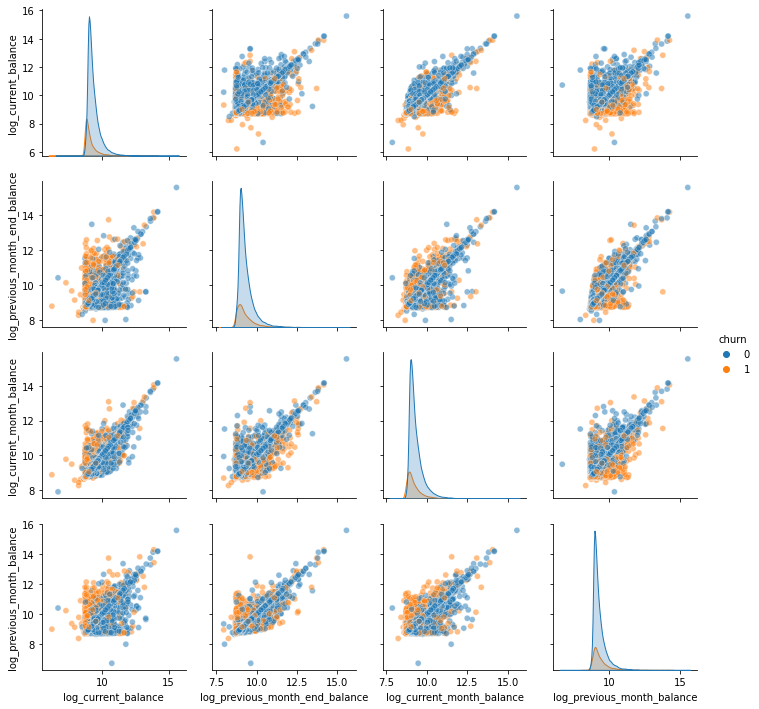

In [104]:
# Pair plot for multi-variate analysis:
sns.pairplot(data = balances_df, vars = balance_log_cols, hue='churn', plot_kws={'alpha':0.5})
plt.show()

**Inferences:**
* There is high correlation between current month and previous month balances which is expected
* The distribution of both churn and not churn is slightly different for both the cases

##### # Analysis of Credit and Debit transactions with respect to Churn

In [109]:
# Creating an empty dataframe for the transaction variables:
transactions_df = pd.DataFrame()

# Handling outliers for the transaction variables for pairplot:
for i in transactions_group:
    transactions_df[str('log_') + i] = np.log(churn_data_eda[i])
    
transaction_log_cols = transactions_df.columns

# Adding churn information to the transactions variables data:
transactions_df['churn'] = churn_data_eda['churn']

transactions_df

log_current_month_credit  log_previous_month_credit  \
0                     -1.609438                  -1.609438   
1                     -0.579818                  -0.579818   
2                     -0.494296                  -0.494296   
3                     -0.755023                  -0.755023   
4                     -1.108663                   6.571737   
...                         ...                        ...   
28377                 -1.203973                  -1.203973   
28378                  0.536493                   0.828552   
28379                  8.448237                   8.264379   
28380                 -1.609438                  -1.609438   
28381                 -2.207275                   2.006871   

       log_current_month_debit  log_previous_month_debit  churn  
0                    -1.609438                 -1.609438      0  
1                     8.610004                  4.610755      0  
2                     8.707273                  5.557716      0  
3                    -0.755023                  7.670116      1  
4                     6.377781                  7.338277      1  
...                        ...                       ...    ...  
28377                -1.203973                 -1.203973      0  
28378                 6.803505                  6.921727      0  
28379                 5.125332                  4.273884      1  
28380                -1.609438                 -1.609438      0  
28381                 6.571443                  6.997678      1  

[28382 rows x 5 columns]

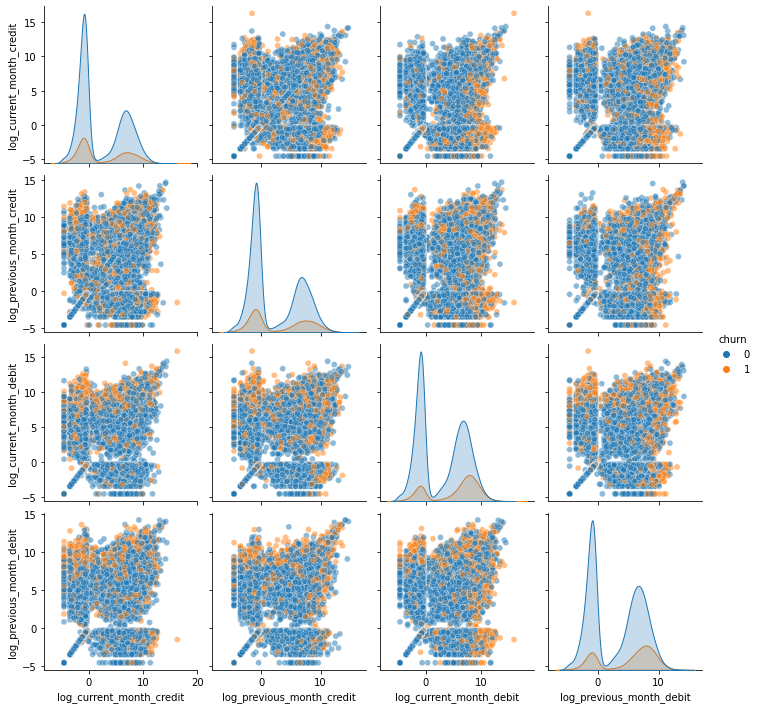

In [111]:
sns.pairplot(data=transactions_df, vars=transaction_log_cols, hue='churn', plot_kws={'alpha':0.5})
plt.show()

**Inferences:**
* There is significant difference in distribution of churning and non-churning customers for both credit and debit transactions
* Bimodel or double bell curve shows that there are two different types of customers with 2 brackets of credit and debit. These could be considered as seperate set of customers during modelling